# Covid-19 : Analysis and Prediction

-----------------------

#  Introduction

On 30 January 2020 the World Health Organization (WHO) declared that the SARS-CoV-2 outbreak constitutes a Public Health Emergency of International Concern (PHEIC). The COVID-19 crisis is putting high pressure on the research community to speed up science discovery, inform the public health response and help save lives, as demonstrated by the activation by the WHO of the R&D Blueprint to accelerate diagnostics, vaccines and therapeutics for this novel virus. A necessary complementary action to accelerate and amplify impact is to ensure that research findings and data relevant to this outbreak, are shared as rapidly, openly and effectively as possible.Therefore, the European Commission urges researchers of Horizon 2020 grants with research outputs that - in any way - may be used to advance the research on COVID-19, to provide immediate open access to their related publications, data and any other output possible, in line with the guidance offered in this document. These can be projects specifically researching on the corona virus, but also other research fields/disciplines with relevance to tackle the corona crisis. Similarly, the European Commission urges research infrastructures projects, developing and/or providing access services to relevant research tools and resources, to provide priority and customised access to their services for research on COVID-19.More particularly, the European Commission strongly encourages beneficiaries to follow the guidelines below, thereby exceeding the current Open Access requirements of Horizon 2020 and going beyond the legal obligations enshrined in the Horizon 2020 Grant Agreement (GA), in order to address the current public health emergency. The guidelines build on both the commitments made by the European Commission as a signatory of the Statement on Data Sharing in Public Health Emergency, and on the principles established in the GA. 

Importing all the Libraries that we need to do this project work

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Imported a dataset of Covid 19 where the data is stored upto 15th November, 2020

In [3]:
df = pd.read_csv('/content/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Shape of the dataset

In [4]:
df.shape

(85638, 8)

Information regarding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85638 entries, 0 to 85637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              85638 non-null  int64  
 1   ObservationDate  85638 non-null  object 
 2   Province/State   57341 non-null  object 
 3   Country/Region   85638 non-null  object 
 4   Last Update      85638 non-null  object 
 5   Confirmed        85638 non-null  float64
 6   Deaths           85638 non-null  float64
 7   Recovered        85638 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.2+ MB


We will convert the ObservationDate and Last Update to datetime since they are currently taken as object

The counts for 'Confirmed' , 'Deaths' and 'Recovered' will be converted into int datatype for the simplicity of the usage

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

Since the final count of the cases is present on 12th August, 2020 we are trying to create a separate dataframe for the same

In [7]:
from datetime import date
recent = df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
84896,84897,2020-08-12,NaN,Afghanistan,2020-08-13 04:29:15,37345,1354,26694
84897,84898,2020-08-12,NaN,Albania,2020-08-13 04:29:15,6817,208,3552
84898,84899,2020-08-12,NaN,Algeria,2020-08-13 04:29:15,36699,1333,25627
84899,84900,2020-08-12,NaN,Andorra,2020-08-13 04:29:15,977,53,855
84900,84901,2020-08-12,NaN,Angola,2020-08-13 04:29:15,1762,80,577
...,...,...,...,...,...,...,...,...
85633,85634,2020-08-12,Zaporizhia Oblast,Ukraine,2020-08-13 04:29:15,971,22,680
85634,85635,2020-08-12,Zeeland,Netherlands,2020-08-13 04:29:15,950,69,0
85635,85636,2020-08-12,Zhejiang,Mainland China,2020-08-13 04:29:15,1275,1,1268
85636,85637,2020-08-12,Zhytomyr Oblast,Ukraine,2020-08-13 04:29:15,2215,48,1574


Out of the 156291 records we are now left with only 758 and many of the records don't have the Province defined

These are the provinces that are basically a not part of China

**Whenever provinces are null, we replace them with the country name and group mainland China and China together in China**

In [8]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     168
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [9]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [10]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

We are performing the encoding of the country to CountryID and Province to ProvinceID

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
84896,84897,2020-08-12,Afghanistan,Afghanistan,2020-08-13 04:29:15,37345,1354,26694,3,0
84897,84898,2020-08-12,Albania,Albania,2020-08-13 04:29:15,6817,208,3552,10,1
84898,84899,2020-08-12,Algeria,Algeria,2020-08-13 04:29:15,36699,1333,25627,12,2
84899,84900,2020-08-12,Andorra,Andorra,2020-08-13 04:29:15,977,53,855,22,3
84900,84901,2020-08-12,Angola,Angola,2020-08-13 04:29:15,1762,80,577,23,4


## Presenting the Heatmap for all the 'Confirmed','Recovered' and 'Casualties' with respect to the ProvinceID and CountryID

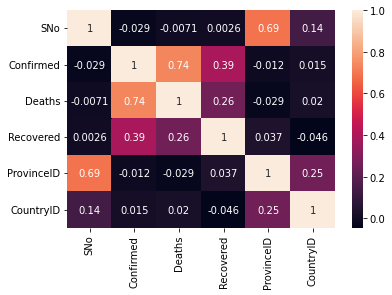

In [12]:
corr = df_update.corr()
sns.heatmap(corr, annot = True)

**********************

## A. Finding out How many countries were affected by Covid-19

In [13]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

Total of 226 countries are affected by this virus, where the epicentre of this virus is Hubei Province of Mainland China 

***********

## B. Percentage of confirmed cases per country through the Pie-chart

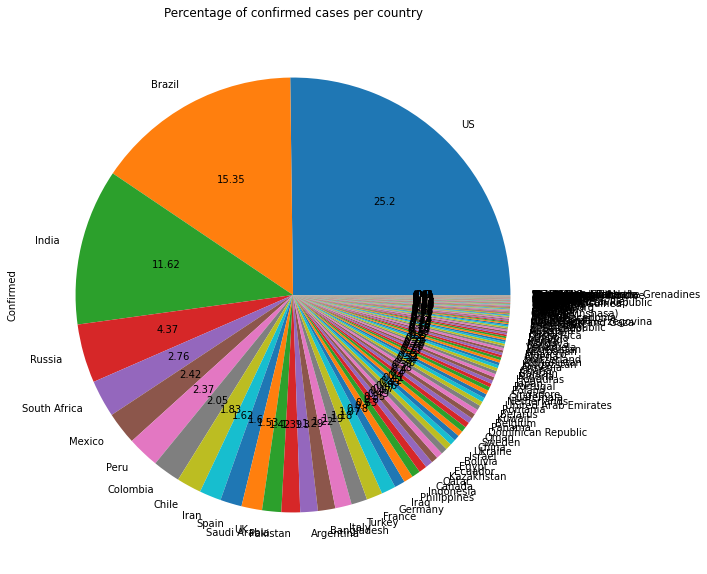

In [14]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

Approximately 21% of the total confirmed cases of the world is found at United States of America

After USA, there are India and Brazil;, the 2nd and 3rd most affected countries in the world where the percentage of confirmed cases reported with respect to the world is 16.27% and 10.78% respectively

****************

## C. Top 5 countries having most number of confirmed cases till 15th November, 2020

**The overall number of global coronavirus cases has surpassed the 43 million mark, while the deaths have increased to over1.16 million, according to the Johns Hopkins University.**

1. The United States tops 8.7 million coronavirus case. The United States on Tuesday surpassed 8,704,606 novel coronavirus cases, according to Johns Hopkins University. The pandemic has now claimed the lives of at least 225,735 people in the United States, which leads the world in the number of confirmed infections.

2. India is now the second worst-affected country by COVID-19.India's novel Coronavirus tally crossed the 7.9 million mark on Tuesday with detection of less than 40,000 new cases in the last 24 hours, the Indian Health Ministry said. The state of Maharashtra, Andhra Pradesh, Tamil Nadu, Karnataka and Uttar Pradesh were among the five worst-affected states in India.

3. Brazil with more than 5.4 million cases. Third, in the list of the worst affected countries, Brazil has more than 5.4 million confirmed cases, according to Johns Hopkins University. The country has so far reported 5,409,854 total cases and 157,397 deaths due to coronavirus.

4. Russia with more than 1.5 million cases. Russia reported more than 1,537,142 cases of coronavirus infections so far and 26,409 deaths. The country has the fourth-highest number of infections behind the United States, India and Brazil, but the number of new cases has seen a stellar rise every day in the past month.

5. France with 1.2 million coronavirus cases. France&#39;s novel coronavirus tally crossed the 1.2 million mark on Tuesday with the death toll rising to 35,052, according to John Hopkins University.

In [15]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,5197118,1753760,166026
1,Brazil,3164785,2506228,104201
2,India,2396637,1695982,47033
3,Russia,900745,708900,15231
4,South Africa,568919,432029,11010


**Representing the Top 5 most affected countries with gradient, where darker the colour is values of that particular area is the greatest**

In [16]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered,Deaths,Recovery Rate,Death Rate
0,US,5197118,1753760,166026,0.340000,0.030000
1,Brazil,3164785,2506228,104201,0.790000,0.030000
2,India,2396637,1695982,47033,0.710000,0.020000
3,Russia,900745,708900,15231,0.790000,0.020000
4,South Africa,568919,432029,11010,0.760000,0.020000


*************

## D. Plotting the Bar Graph representation where it's showing the Confirmed cases, Recovered cases and Death tolls in the Top 5 affected countries till 15th November, 2020

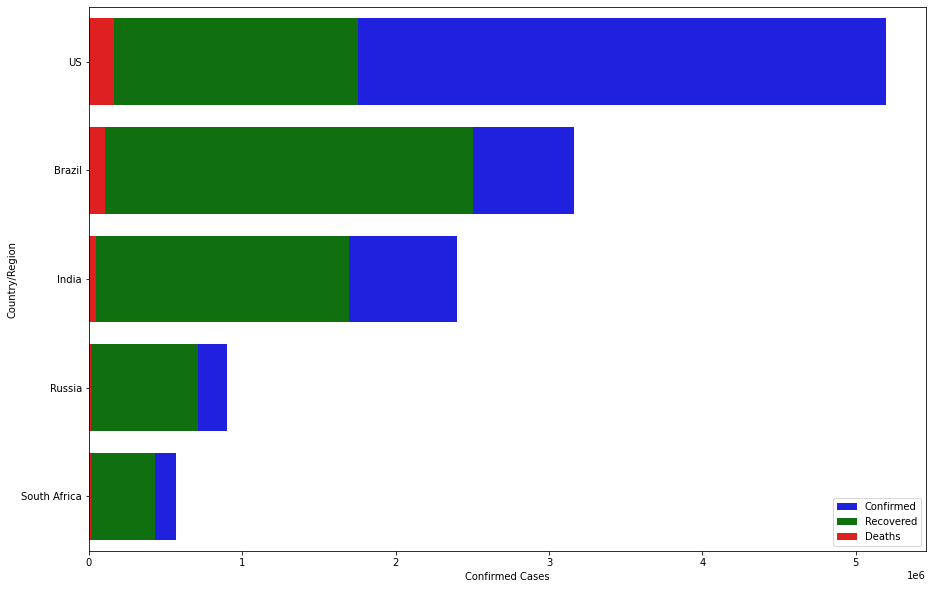

In [17]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

*************

## E. Recovered Cases v/s Death Cases in the Top 5 countries

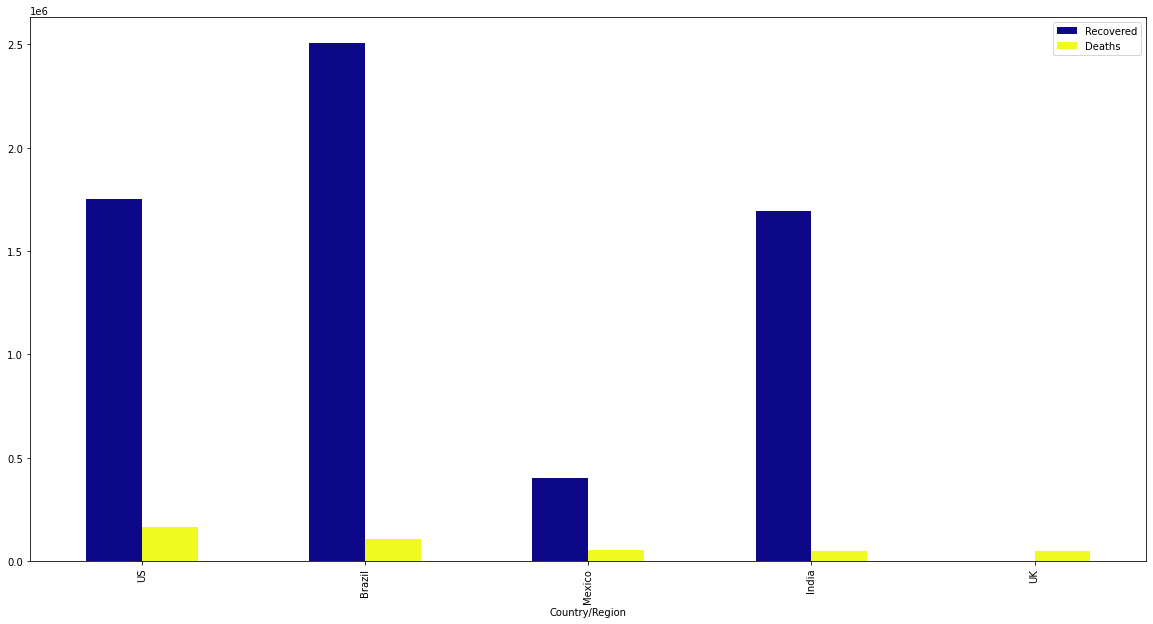

In [18]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

********************
******************

# Chapter 1 : China - The First Epicentre of the pandemic

- On December 29 th Wuhan City government starts to trace cases

- On January 4 th Shanghai lab detects coronavirus similar to SARS

- On January 6 th Wuhan doctor, 13 nurses infected after operating on infected patient

- On January 7 th Pathogen identified as novel coronavirus

- On January 13 th Incubation period identified as 14 days

- On January 17 th Baibuting neighbourhood in Wuhan holds Lunar New Year banquet

- On January 19 th Pulmonologist Nanshan Zhong announces human- to-human spread

- On January 20 th Annual Spring Festival travel rush begins in Hubei Province

- On January 23 rd Wuhan placed under quarantine

- On January 23 rd Announced new hospital to be built in 10 days

- On January 26 th Hundreds of medical staff, equipment and food sent to Wuhan

- On January 28 th Thousands more medical workers sent to Wuhan  (1/28-1/29)

- On February 1 st Member of Chinese Academy of Science leads team to support Wuhan

- On February 2 nd China Central Bank carried out a reverse repurchase of 1.2 trillion RMB ($170B)

- On February 3 rd First Wuhan field hospital opens; More hospitals built overnight

- On February 5 th Diagnostic criteria expanded

- On February 9 th Another 3,187 medical workers sent to Hubei Province

- On February 10 th 19 provinces partner with 16 cities in Hubei for assistance

- On February 12 th Hubei Province incorporates diagnostic change

- On February 14 th Wuhan asks recovered patients to donate plasma

- On February 19 th Another 1,299 medical workers sent to Wuhan as city disinfects sewage

- On February 24 th China bans trade, consumption of wild animals, and postpones annual parliamentary meeting

- On February 26 th Daily new cases outside China surpass those inside the country

- On February 29 th China-WHO joint investigation report on COVID-19 published

- On April 15 th China issued revised death and case count


### A. Since China is the first epicentre of this pandemic situation, we are checking for provinces within China to detect the spread out of the virus

In [19]:
china_cases=df_update.loc[df_update['Country/Region']=='China']

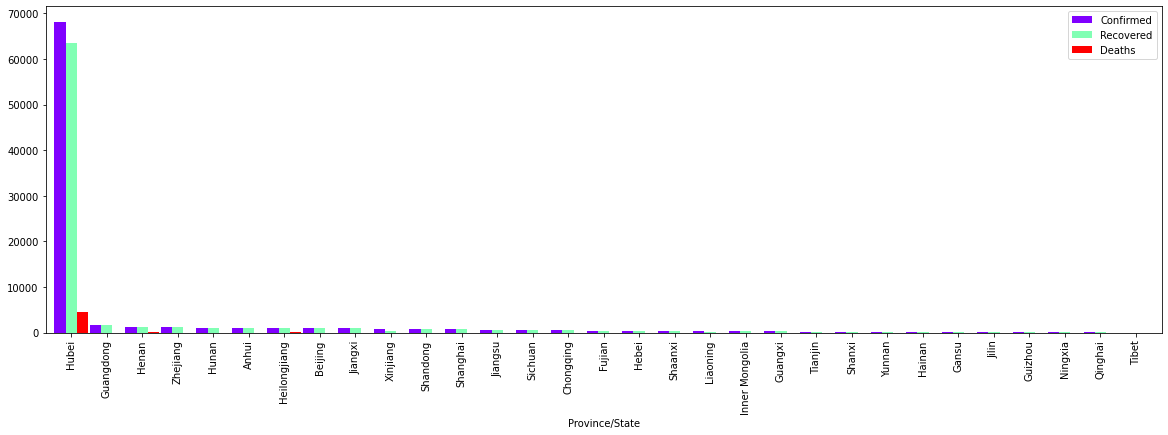

In [20]:
china_province_cases=china_cases[['Confirmed','Recovered','Deaths','Province/State']].groupby('Province/State').sum().sort_values('Confirmed',ascending=False)
china_province_cases.plot(kind='bar',width=0.95,colormap='rainbow',figsize=(20,6))
plt.show()

The above representation is showing that the most affected are or, Province in China is Hubei where the confirmed cases are reached to 70000 and approximately 90% of the cases of Total China's Confirmed Cases

### B. The per-day statistics of China where the line graph shows flattening of curve confirmed cases. However on 17th April there was a sudden rise in the Death and Confirmed cases

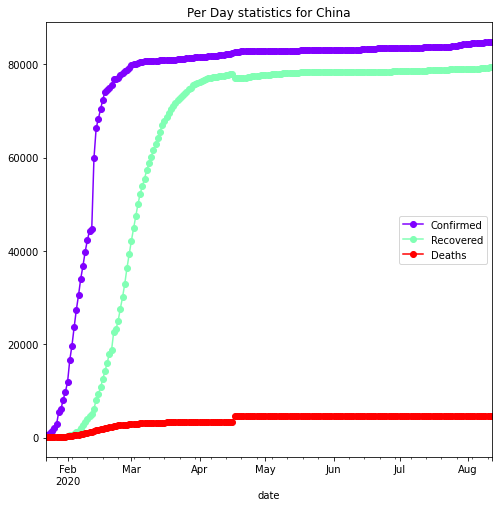

In [21]:
china_cases_complete=df.loc[df['Country/Region']=='China']
china_cases_complete['date'] = china_cases_complete['ObservationDate'].dt.date
china_cases_complete['date']=pd.to_datetime(china_cases_complete['date'])
china_cases_complete = china_cases_complete[china_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = china_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for China',colormap='rainbow',marker='o')
plt.show()

This graph shows how much stiff the growth rate is in the past months of February and March

In [22]:
num_plot_china=num_plot.reset_index()
num_plot_china['Death Case Increase']=0
num_plot_china['Confirmed Case Increase']=0
num_plot_china['Confirmed Case Increase'][0]=0
num_plot_china['Death Case Increase'][0]=0
for i in range(1,num_plot_china.shape[0]):
    num_plot_china['Confirmed Case Increase'][i]=-(num_plot_china.iloc[i-1][1]-num_plot_china.iloc[i][1])
    num_plot_china['Death Case Increase'][i]=-(num_plot_china.iloc[i-1][3]-num_plot_china.iloc[i][3])
num_plot_china.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
199,2020-08-08,84619,79168,4634,0,23
200,2020-08-09,84668,79232,4634,0,49
201,2020-08-10,84712,79284,4634,0,44
202,2020-08-11,84731,79342,4634,0,19
203,2020-08-12,84756,79398,4634,0,25


From the confirmed cases plot for China we can see that the number of new cases have been declining with a few constant number of cases everyday.17th April shows a sudden increase in the number of confirmed cases. China is again seeing some increase in the number of cases since 13th June

### Total no. of Confirmed cases in China till 15th November, 2020

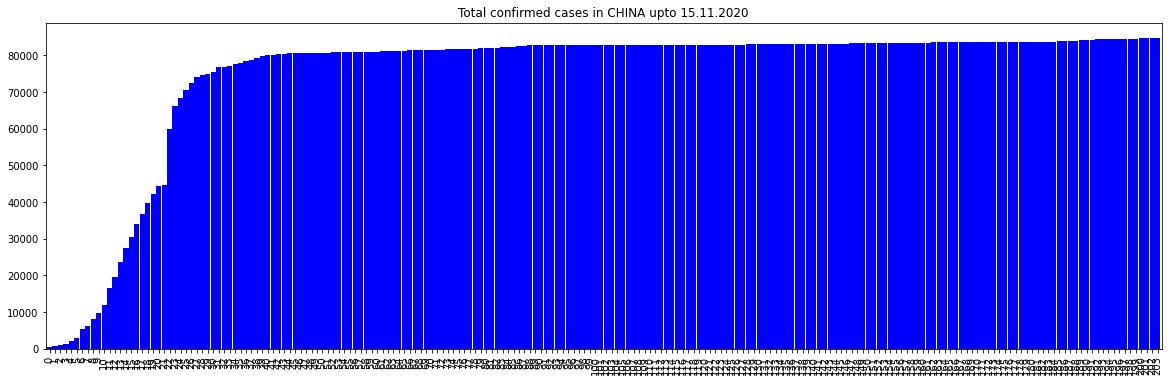

In [23]:
num_plot_china['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total confirmed cases in CHINA upto 15.11.2020',colormap='winter')
plt.show()

**Understanding from the graph : The Total no. of Confirmed cases in China graph shows that the graph is flattened after May, 2020, which shows that the increment in the cases is not exponentially in the recent times as the graph is Flattened**

### Total no. of Recovered cases in China till 15th November, 2020

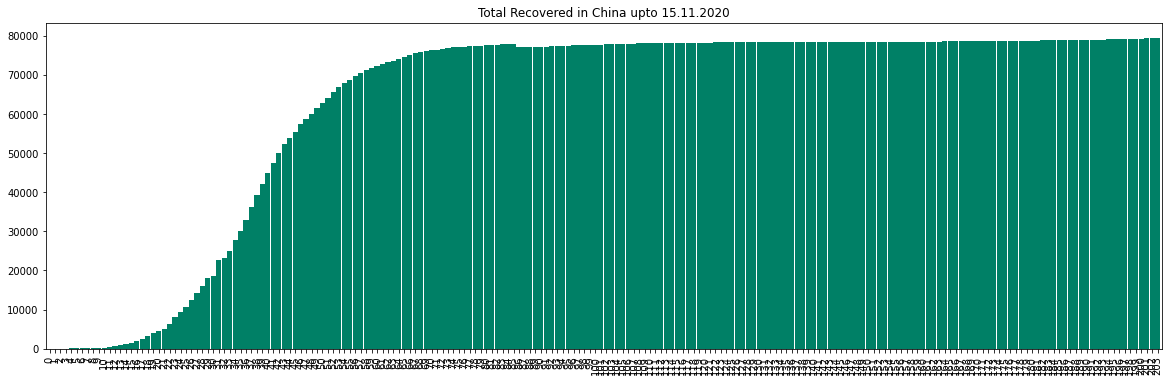

In [24]:
num_plot_china['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Recovered in China upto 15.11.2020',colormap='summer')
plt.show()

### Total no. of Casualties in China till 15th November, 2020

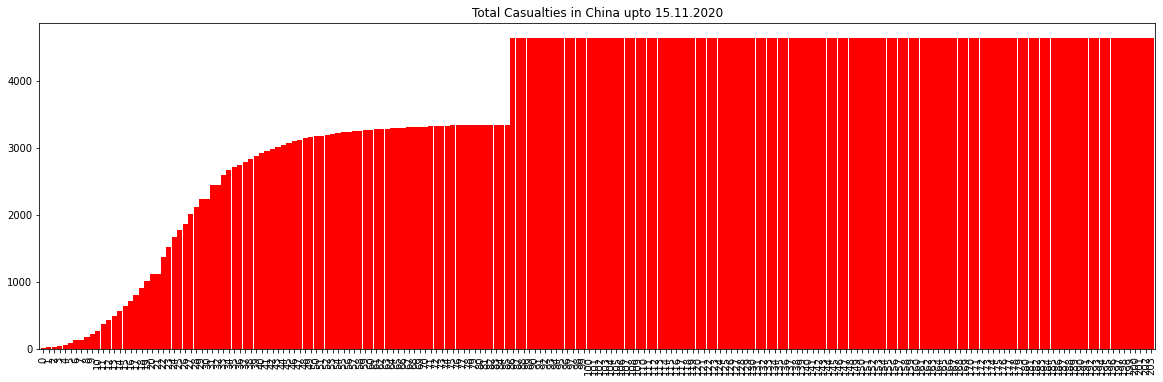

In [25]:
num_plot_china['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Casualties in China upto 15.11.2020',colormap='autumn')
plt.show()

### Confirmed cases increase in China till 15th November, 2020

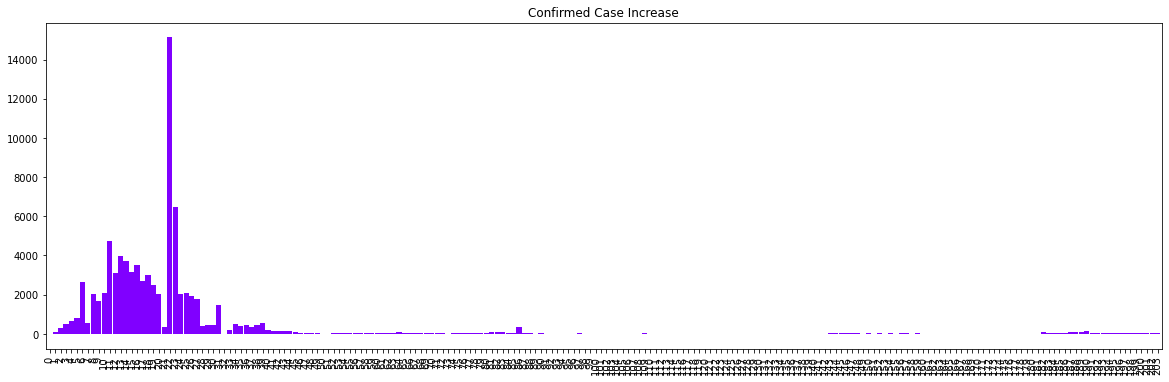

In [26]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='rainbow')
plt.show()

### Death case increase in China till 15th November, 2020

From the Death Increase plot for China we can see that deaths have reduced to a great level but on 17th April there were 1290 deaths reported in a single day. China reported this increase as some miscalculation on their end during the initial phase of COVID

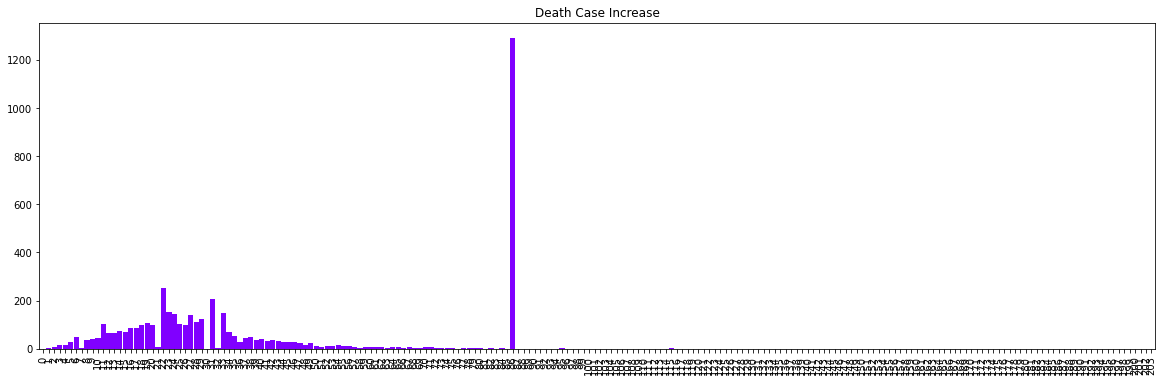

In [27]:
num_plot_china['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='rainbow')
plt.show()

--------------

## C. Per day Statistics for Hubei Province, China [The Major epicentre]

Wuhan was placed under a strict lockdown that lasted 76 days. Public transport was suspended. Soon afterwards, similar measures were implemented in every city in Hubei province. Across the country, 14 000 health checkpoints were established at public transport hubs. School re-openings after the winter vacation were delayed and population movements were severely curtailed. Dozens of cities implemented family outdoor restrictions, which typically meant that only one member of each household was permitted to leave the home every couple of days to collect necessary supplies. Within weeks, China had managed to test 9 million people for SARS-CoV-2 in Wuhan. It set up an effective national system of contact tracing.

We plot the per day statistics for Hubei since it has the highest rate of confirmed cases in China
If we compare the China and Hubei plots, they both are similar. Hence we can say that the China stats are influenced deeply by a single province

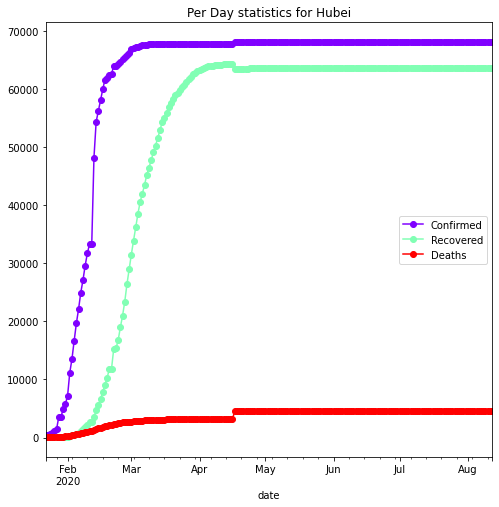

In [28]:
hubei_cases_complete=df.loc[df['Province/State']=='Hubei']
hubei_cases_complete['date'] = hubei_cases_complete['ObservationDate'].dt.date
hubei_cases_complete['date']=pd.to_datetime(hubei_cases_complete['date'])
hubei_cases_complete = hubei_cases_complete[hubei_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = hubei_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Hubei',colormap='rainbow',marker='o')
plt.show()

While talking about the China the main root of the epidemic is Hubei Province where the confirmed cases were increased from 10000 to 70000 in a gap of just 25 days in the month of February and March, 2020. The root of the epidemic is hereby **HUBEI province of China**

---------------

# Chapter 2 : World - Excluding China

The 2019 novel coronavirus (2019-nCoV), officially named as COVID-19 pandemic by the WHO, has spread to more than 180 countries including China. Confirmed novel coronavirus cases increased ten-fold in less than a month, from 100,000 in the first week of March to more than one million on 02 April, while more than 52,000 deaths have been reported across the world.

### Per Day Statistics for the World upto 15th November, 2020

Global cases are on an exponential increase and the recovery and death cases do show some divergence which is a good indication

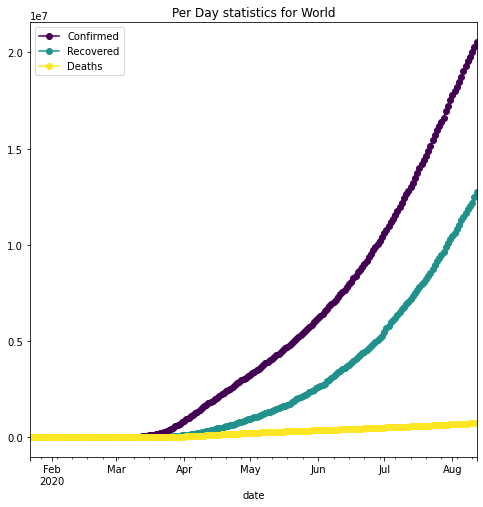

In [29]:
global_cases_complete=df.loc[~(df['Country/Region']=='China')]
global_cases_complete['date'] = global_cases_complete['ObservationDate'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

Here the perday statistics tells us the spreading is exponentially increasing day by day since the end of the March, 2020. Now after 5 months later the situation is worser than the previous days and still the cases are increasing exponentially without any kind of stoppings in the increment of the cases.

### Increment in the stats in the recent times (from 8th Aug, 2020 to 15th November, 2020)

In [30]:
num_plot_global=num_plot.reset_index()
num_plot_global['Death Case Increase']=0
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
num_plot_global['Death Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
    num_plot_global['Death Case Increase'][i]=-(num_plot_global.iloc[i-1][3]-num_plot_global.iloc[i][3])
num_plot_global.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
199,2020-08-08,19552887,11859941,722147,5457,259447
200,2020-08-09,19777015,12036593,726692,4545,224128
201,2020-08-10,20004912,12201236,731557,4865,227897
202,2020-08-11,20258858,12506131,737981,6424,253946
203,2020-08-12,20536091,12747417,744724,6743,277233


Here on 15th November 2020 the number of confirmed cases has raised to 54283840, which is huge in numbers and almost 57% of the total population of the world. In that confirmed cases the Death toll rises to 1312505 and still it is increasing day by day. 

**Global confirmed cases have been on an increasing trend and this has been largely contributed by Brazil and US at this moment as can be seen in the pie-chart. 29th July saw the highest increase in confirmed cases with 3.37L cases in a day.**

### Total Confirmed Cases in the World (Excluding China) upto 15th November, 2020

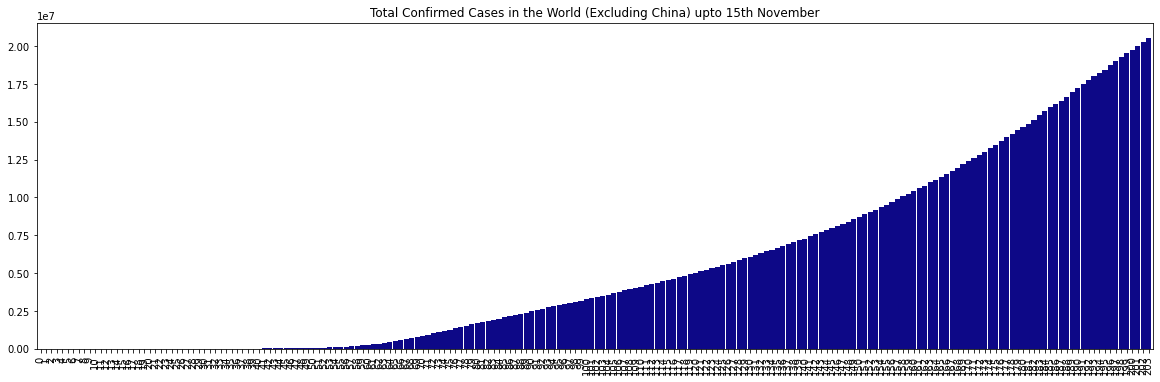

In [31]:
num_plot_global['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Confirmed Cases in the World (Excluding China) upto 15th November',colormap='plasma')
plt.show()

### Total Recovered Cases in the World (Excluding China) upto 15th November, 2020

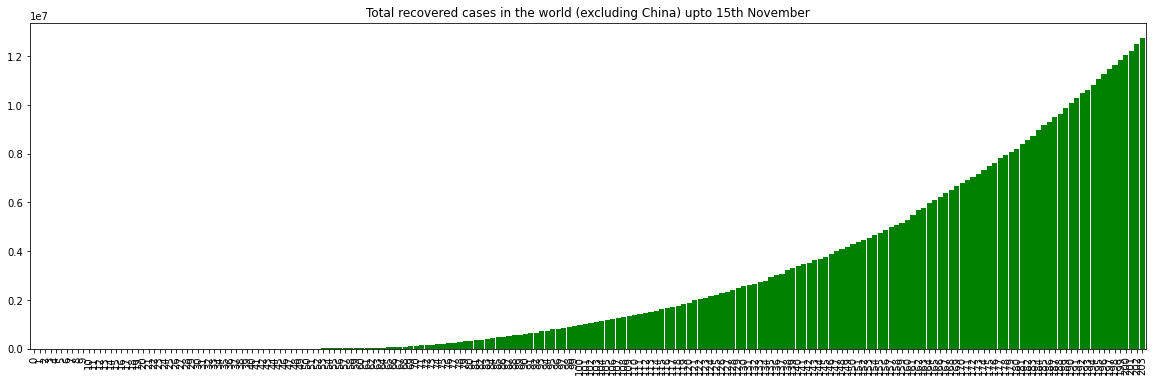

In [32]:
num_plot_global['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in the world (excluding China) upto 15th November',colormap='ocean')
plt.show()

### Total Death Cases in the World (Excluding China) upto 15th November, 2020

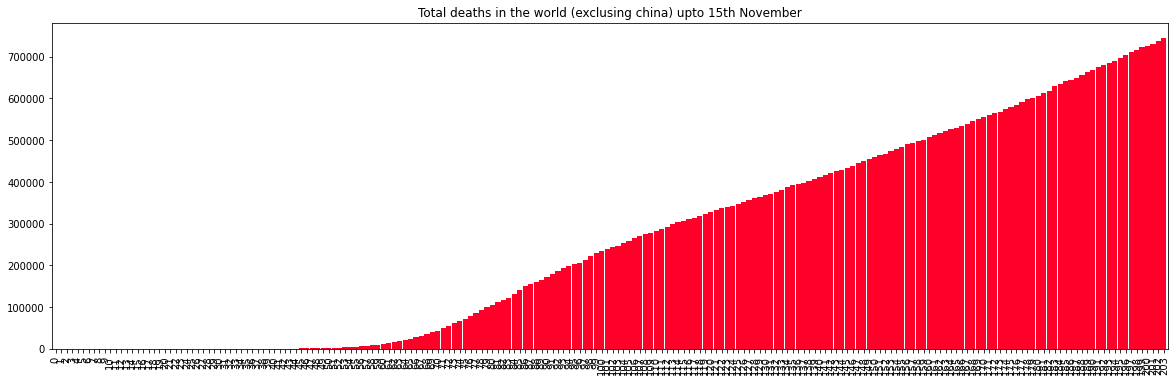

In [34]:
num_plot_global['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total deaths in the world (exclusing china) upto 15th November',colormap='gist_rainbow')
plt.show()

### Total Confirmed Cases Increase in the World (Excluding China) upto 15th November, 2020

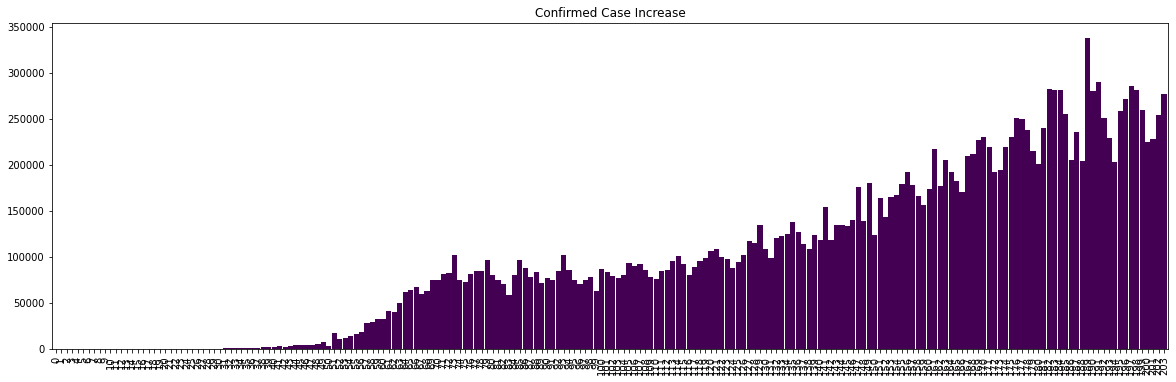

In [35]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.show()

### Death Cases Increase in the World (Excluding China) upto 15th November, 2020

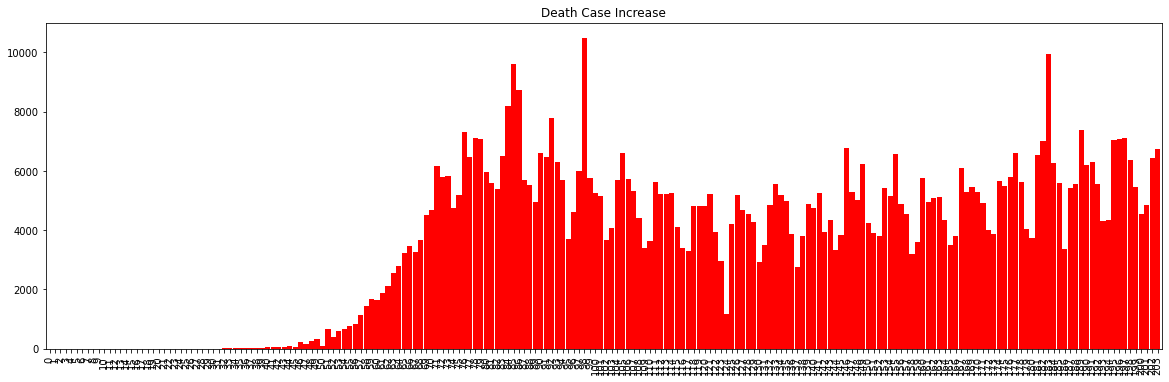

In [36]:
num_plot_global['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='autumn')
plt.show()


Death cases have also been on the rise globally as seen below. 29th April has seen a drastic increase in the number of deaths in a single day(10485).

************************

# Chapter 3 : Analysis of Major Countries

## A. ITALY - 2nd Epicentre

First outbreak: Italy was first affected with COVID 19 in 30 January, when two positive cases were reported in Chinese tourists. Italy COVID cases reached 59,138 on 23 March, marking the biggest coronavirus outbreak outside Asia. And Italy was announced as second most affected coronavirus country in the world with the cases increasing at a higher rate than any other country.
Total affected: If we see the graph of affected rate, we can understand the cases were approximately same upto August 25. After that it has been increasing and currently it has 1455022 positive cases by now(Till 24 november, 2020).
Death rate: The death rate was suddenly increased in the mid of March and it was approximately in a equal level till October 20. After that is has been increasing like the affected rate till now. The daily death cases were too high from last week of February to mid of April. 


**Italy was the second epicentre for COVID19,hence lets look at these numbers. The numbers are high and confirmed cases are increasing by the day. However the increase rate for confirmed cases has been constant and may soon be seeing a plateau phase. Recovery and deaths were both neck to neck with some divergence over the last few days.Italy has more than 1L confirmed cases on 30th March**


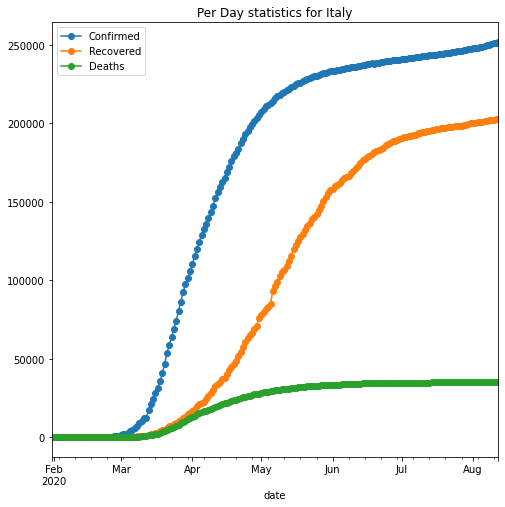

In [37]:
italy_cases_complete=df.loc[df['Country/Region']=='Italy']
italy_cases_complete['date'] = italy_cases_complete['ObservationDate'].dt.date
italy_cases_complete['date']=pd.to_datetime(italy_cases_complete['date'])
italy_cases_complete = italy_cases_complete[italy_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = italy_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Italy',marker='o')
plt.show()

In [38]:
num_plot_italy=num_plot.reset_index()
num_plot_italy['Death Case Increase']=0
num_plot_italy['Confirmed Case Increase']=0
num_plot_italy['Confirmed Case Increase'][0]=0
num_plot_italy['Death Case Increase'][0]=0
for i in range(1,num_plot_italy.shape[0]):
    num_plot_italy['Confirmed Case Increase'][i]=-(num_plot_italy.iloc[i-1][1]-num_plot_italy.iloc[i][1])
    num_plot_italy['Death Case Increase'][i]=-(num_plot_italy.iloc[i-1][3]-num_plot_italy.iloc[i][3])
num_plot_italy.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
190,2020-08-08,250103,201947,35203,13,347
191,2020-08-09,250566,202098,35205,2,463
192,2020-08-10,250825,202248,35209,4,259
193,2020-08-11,251237,202461,35215,6,412
194,2020-08-12,251713,202697,35225,10,476


For Italy the increase in confirmed cases have been in the range of 200-500 for the past few days.

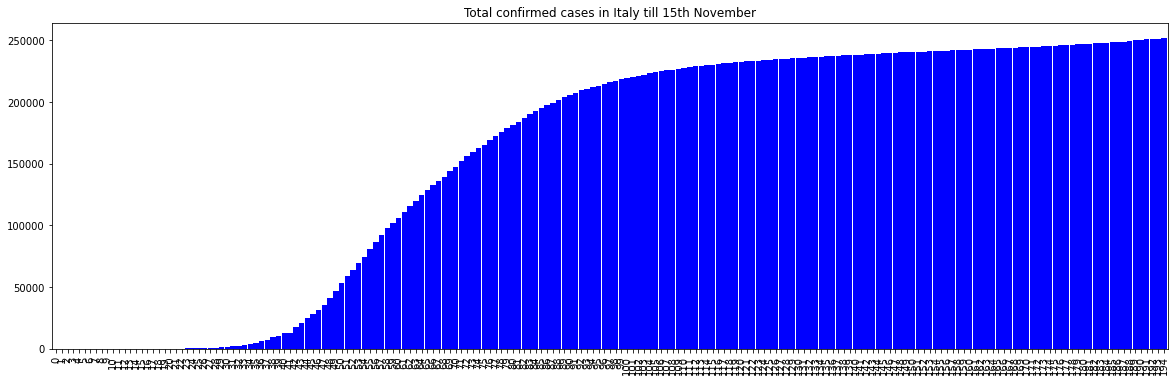

In [39]:
num_plot_italy['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total confirmed cases in Italy till 15th November',colormap = 'winter')
plt.show()

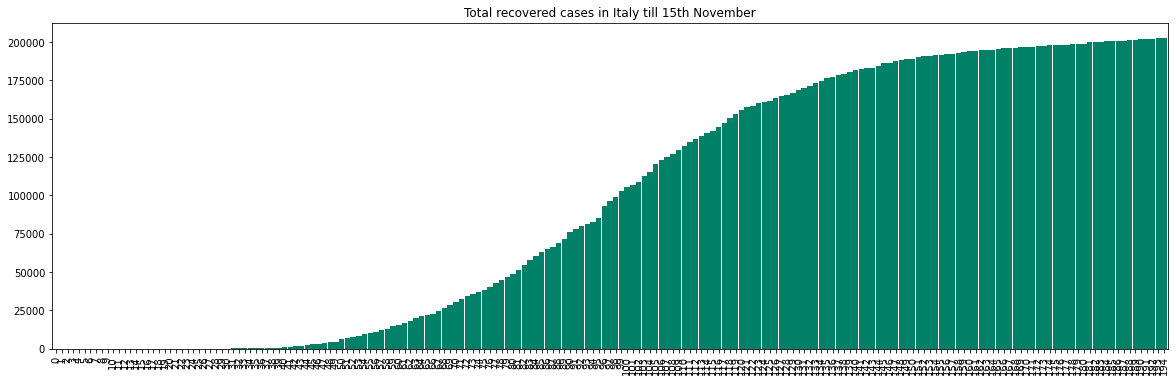

In [40]:
num_plot_italy['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in Italy till 15th November',colormap = 'summer')
plt.show()

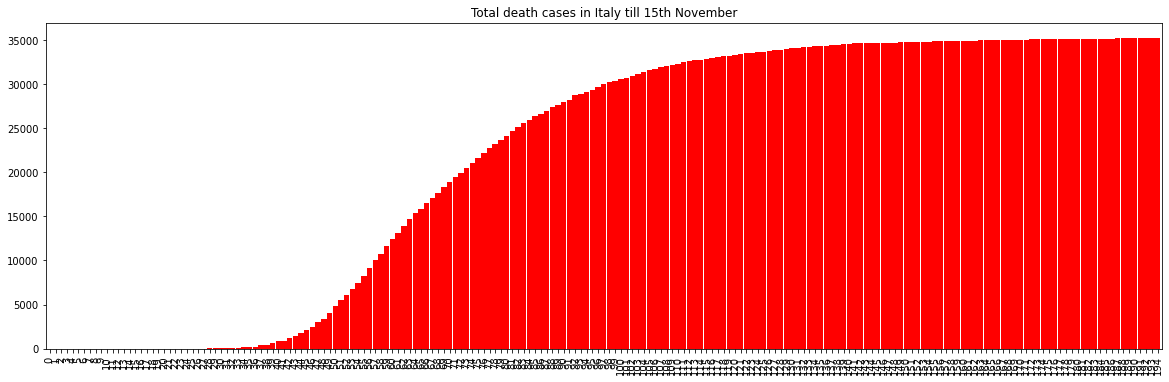

In [41]:
num_plot_italy['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total death cases in Italy till 15th November',colormap = 'autumn')
plt.show()

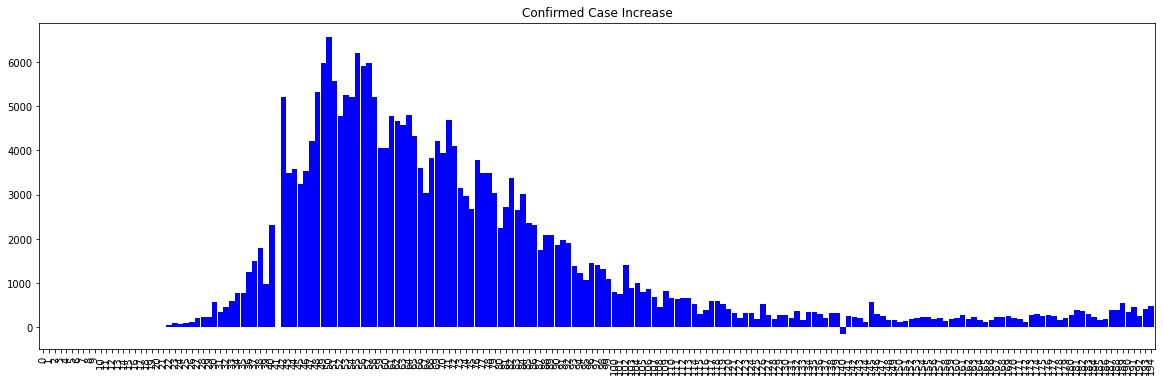

In [42]:
num_plot_italy['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap = 'winter')
plt.show()

**The highest number of deaths in Italy was seen on 27th March with 919 deaths reported**

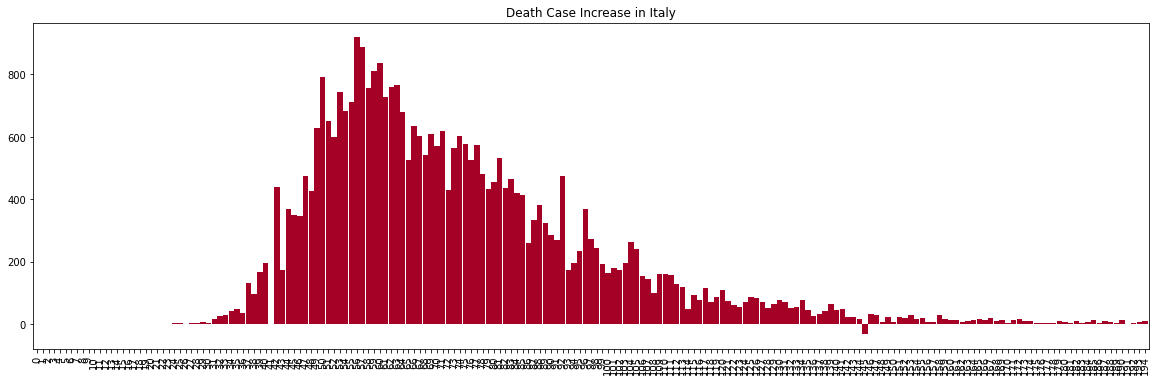

In [43]:
num_plot_italy['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase in Italy',colormap = 'RdYlBu')
plt.show()

*************************

## B. USA - 3rd Epicentre

First outbreak:  Covid was first identified in USA in December 2019. The World Health Organization declared the outbreak a Public Health Emergency of International Concern in January 2020 and a pandemic in March 2020. 

Total affected: Positive cases till November 25 is 12276834. Cases are respectively higher in October than last few months. Rate of confirmed cases is daily changing.

Death rate: Total number of death 255850. In November 21, number of death was 2036 in 25 it was 1052. Death rate is decreasing and it is less than the number of death in March to mid May.


*US was reaching flattening of curve stage, however last few days have again seen an increase in cases as can be seen below*

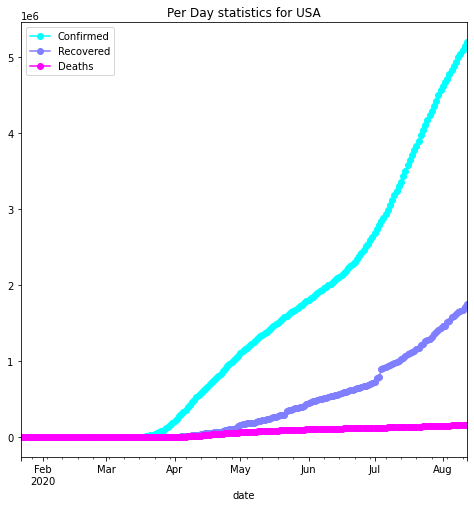

In [44]:
us_cases_complete=df.loc[df['Country/Region']=='US']
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date']=pd.to_datetime(us_cases_complete['date'])
us_cases_complete = us_cases_complete[us_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = us_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for USA',colormap='cool',marker='o')
plt.show()

In [45]:
num_plot_us=num_plot.reset_index()
num_plot_us['Death Case Increase']=0
num_plot_us['Confirmed Case Increase']=0
num_plot_us['Confirmed Case Increase'][0]=0
num_plot_us['Death Case Increase'][0]=0
for i in range(1,num_plot_us.shape[0]):
    num_plot_us['Confirmed Case Increase'][i]=-(num_plot_us.iloc[i-1][1]-num_plot_us.iloc[i][1])
    num_plot_us['Death Case Increase'][i]=-(num_plot_us.iloc[i-1][3]-num_plot_us.iloc[i][3])
num_plot_us.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
199,2020-08-08,4997929,1643118,162423,1076,56174
200,2020-08-09,5044864,1656864,162938,515,46935
201,2020-08-10,5094400,1670755,163463,525,49536
202,2020-08-11,5141208,1714960,164527,1064,46808
203,2020-08-12,5197118,1753760,166026,1499,55910


**On 16th July the confirmed case increase reached a peak of 78k in a day. Every 7 days we noticed a peak in the numbers previously however the peak nowadays occurs in 4-5 days.**

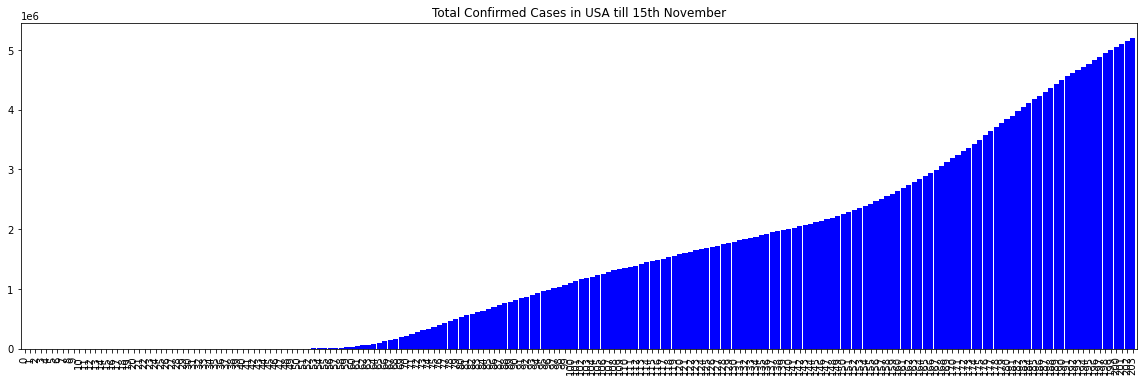

In [46]:
num_plot_us['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed Cases in USA till 15th November')
plt.show()

This graph shows a certain flatness in the mid of June, 2020, But after that it is in the upswing mode with a steep slope upwards 

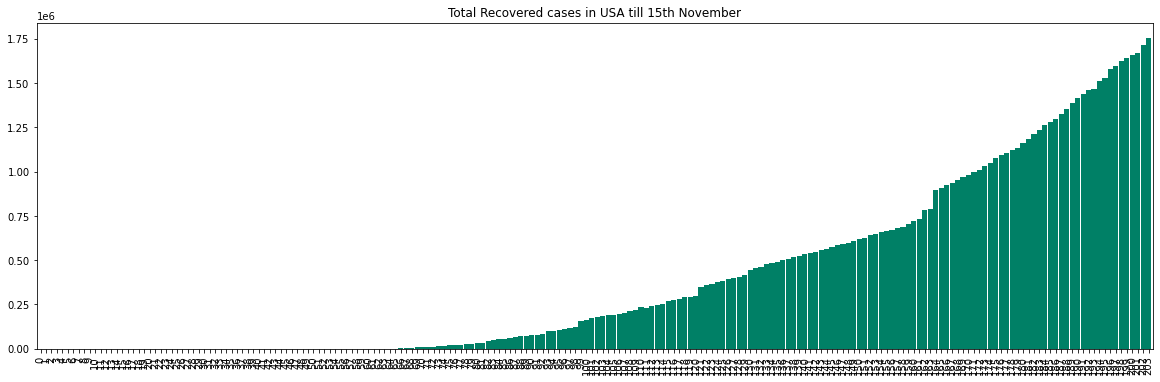

In [47]:
num_plot_us['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in USA till 15th November')
plt.show()

The Death toll in United States is not flatten any more rather it is increasing day by day in a exponential manner with a steep slope upwards. It does not have any kind of peak till now so that it can flatten after a particular peak.

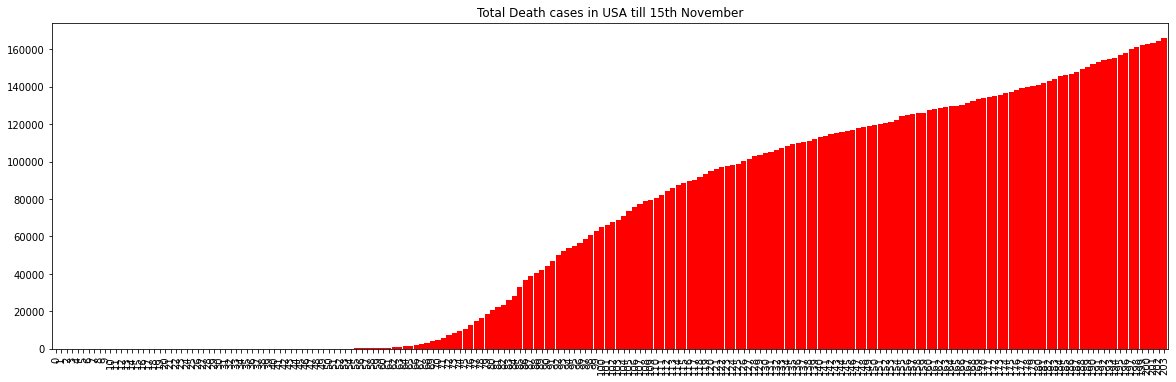

In [48]:
num_plot_us['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in USA till 15th November')
plt.show()

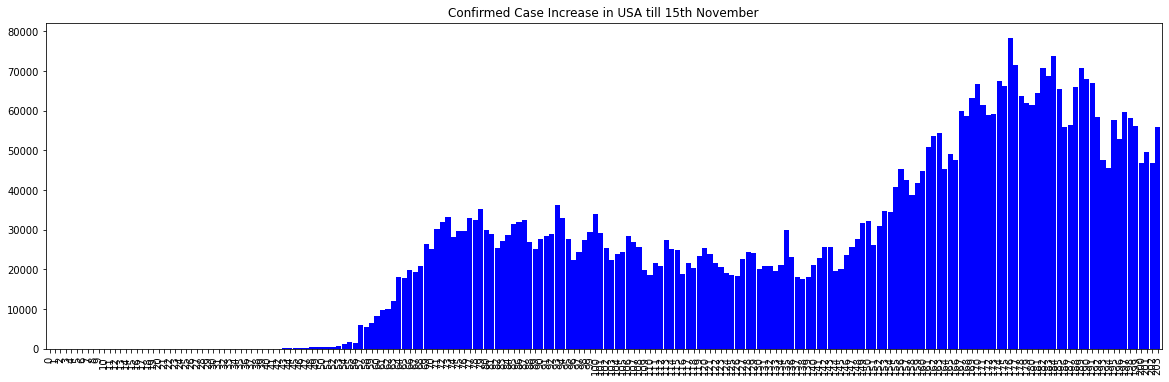

In [49]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed Case Increase in USA till 15th November')
plt.show()

**In the mid of June the confirmed cases are decreased and the incrementation is flattened by a certain moment. But unfortunately in the last week July the incrementation in the confirmed cases are increased suddenly with a steep slope. After a week of steep slope in the increment of the confirmed cases there is a decrement in the confirmed cases in a daily basis manner. As we can see in the graph, that after a week of high rise the peaks are coming lower and lower day by day. Which shows that the confirmed cases and decrementing day by day slowly. It's really a big sign of improvement for United States**

**Similar increase has been seen in the deaths reported by US with highest number of deaths(4591) recorded on 16th April**

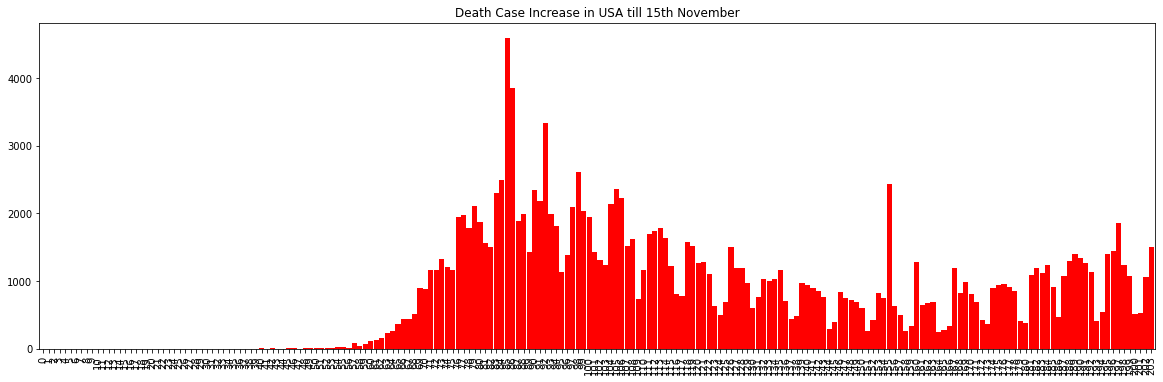

In [50]:
num_plot_us['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Death Case Increase in USA till 15th November')
plt.show()

**As the graph shows that on the particular day of 16th April 2020 USA reported a highest no. of death cases. After that the death cases are slowly coming down to a certain limit but suddenly in the recent times the Death cases are increasing day by day which is very much annoying for USA**

***************************

## C. South Korea - The Most successful country to fight against Covid - 19

First outbreak: First conferm case was founded in south koria on 20 January 2020. The number of confermed cases increased after 10 February.

Total affected: In present situation the total cases is 31735.Cases are increasing after February in a linear scale. Daily number of new cases was too high in February then it was reduced, after August 16 to September mid it was extremely high. 

Death rate: Number of death cases are increasing from February but daily death was in the top level in mid of March. Total number of death is 513 till November 25, and recovery number is 26825.


### Per Day Statistics for South Korea till 15th November, 2020

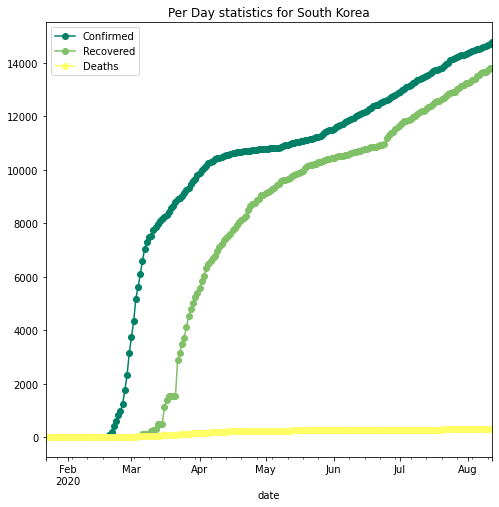

In [51]:
skorea_cases_complete=df.loc[df['Country/Region']=='South Korea']
skorea_cases_complete['date'] = skorea_cases_complete['ObservationDate'].dt.date
skorea_cases_complete['date']=pd.to_datetime(skorea_cases_complete['date'])
skorea_cases_complete = skorea_cases_complete[skorea_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = skorea_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for South Korea',colormap='summer',marker='o')
plt.show()

### No. of Informed cases in the recent times 

In [52]:
num_plot_skorea=num_plot.reset_index()
num_plot_skorea['Death Case Increase']=0
num_plot_skorea['Confirmed Case Increase']=0
num_plot_skorea['Confirmed Case Increase'][0]=0
num_plot_skorea['Death Case Increase'][0]=0
for i in range(1,num_plot_skorea.shape[0]):
    num_plot_skorea['Confirmed Case Increase'][i]=-(num_plot_skorea.iloc[i-1][1]-num_plot_skorea.iloc[i][1])
    num_plot_skorea['Death Case Increase'][i]=-(num_plot_skorea.iloc[i-1][3]-num_plot_skorea.iloc[i][3])
num_plot_skorea.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
199,2020-08-08,14598,13642,305,1,36
200,2020-08-09,14626,13658,305,0,28
201,2020-08-10,14660,13729,305,0,34
202,2020-08-11,14714,13786,305,0,54
203,2020-08-12,14770,13817,305,0,56


**In the recent times if we check out the no. of Confirmed case Increase, we can find that the cases are bearly minor as compared to the whole world. And the Death Case Increment is now down to 0 in the recent times. Which shows that SOUTH KOREA is able to fought against the virus with minimum casualties of 494 till 15th November, 2020** 

### Total no. of Confirmed cases in South Korea till 15th November, 2020

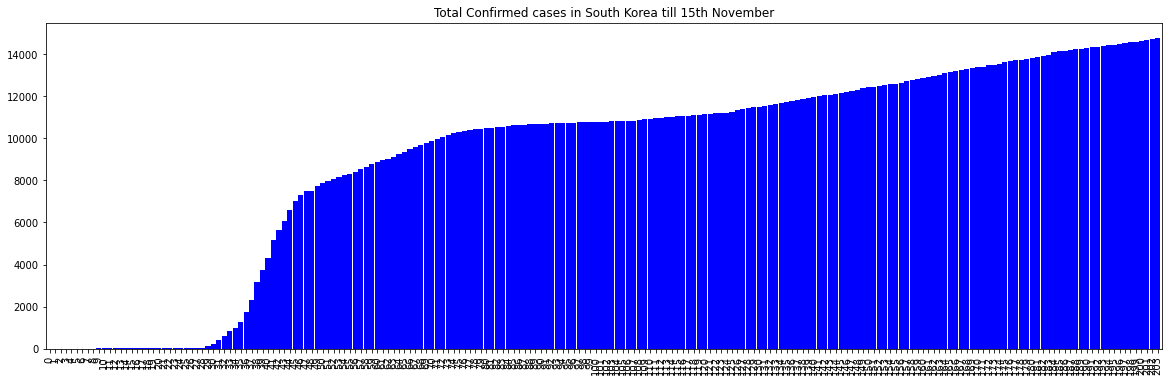

In [53]:
num_plot_skorea['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in South Korea till 15th November')
plt.show()

### Total no. of Recovered cases in South Korea till 15th November, 2020

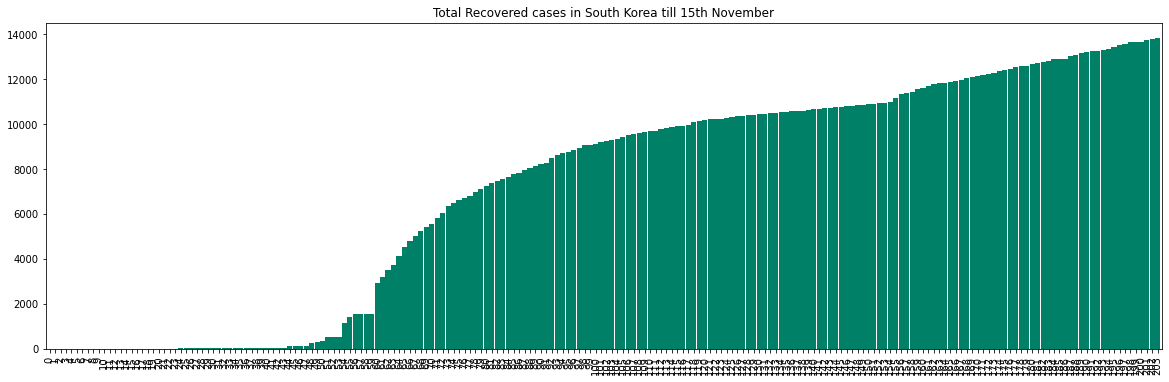

In [54]:
num_plot_skorea['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in South Korea till 15th November')
plt.show()

### Total no. Death Cases in South Korea till 15th November, 2020

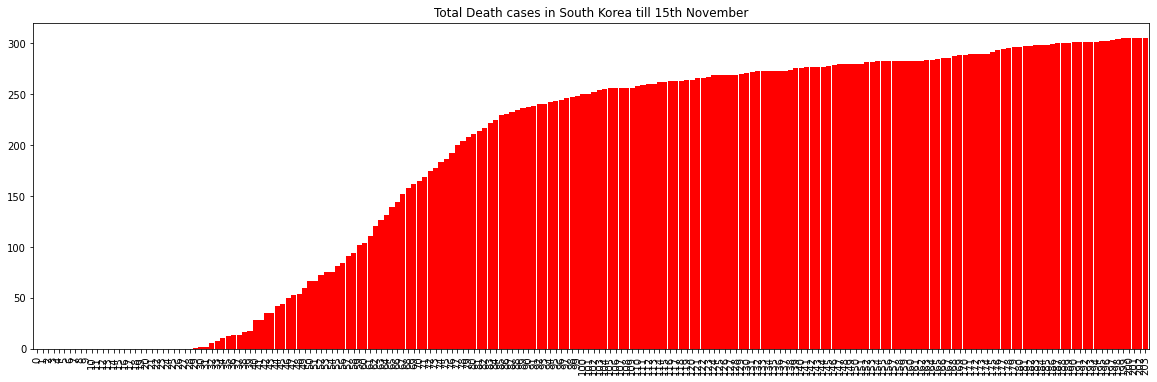

In [55]:
num_plot_skorea['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in South Korea till 15th November')
plt.show()

**From the above three graphs we can have a clear look that how the graph flattens and as a result the exponential growth has been stopped. Which clearly indicates that South Korea has fought against the virus quite brilliantly**

### Confirm case increment in South Korea till 15th November, 2020

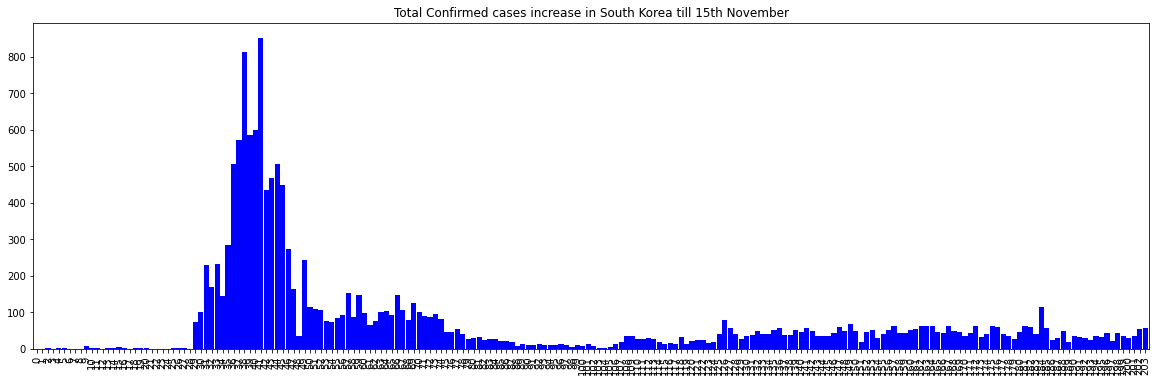

In [56]:
num_plot_skorea['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='bwr',title='Total Confirmed cases increase in South Korea till 15th November')
plt.show()

As we can see that the confirm cases are lowered to merely 100 per day which signifies the great work of South Korea to fought against the virus

### Death case increment in South Korea till 15th November, 2020

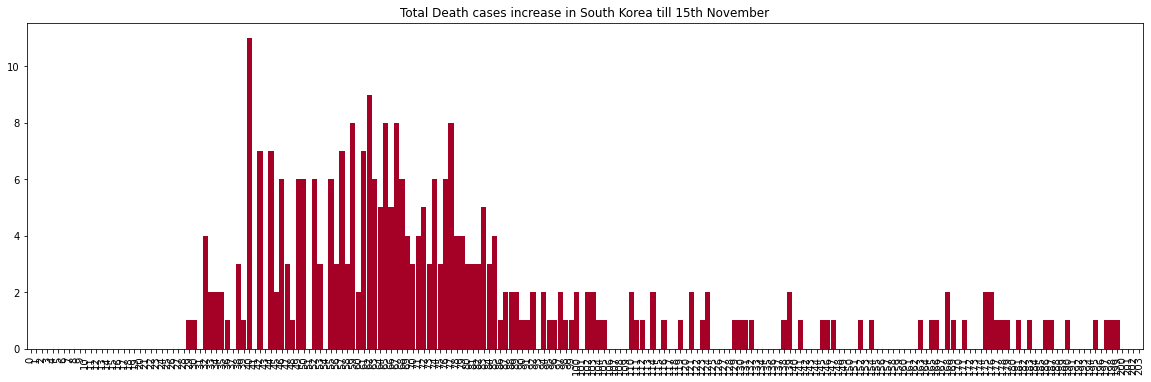

In [57]:
num_plot_skorea['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Total Death cases increase in South Korea till 15th November')
plt.show()

Also the Death Cases are lowered to 2 to 4 and from the recent few days it turns out to be 0

****************************

## D. United Kingdom - Recovered from Covid-19 or not?

First outbreak: The virus reached the country in late January 2020. The world's eighth-highest death rate per hundred thousand populations and the highest number overall in Europe.

Total affected: As of 2 November 2020 there have been 1,256,725 confirmed cases.Number of cases is highly increasing after September 6(2020). Number of daily affected cases is much higher than mid july-August.

Death rate: After March death rate was suddenly increased. Total death case is 56533 till 25 November. In November 21 new death was 341 in 22 it was 398. Only in 25 November number of death was 696.


### Per Day Statistics for United Kingdom till 15th November, 2020

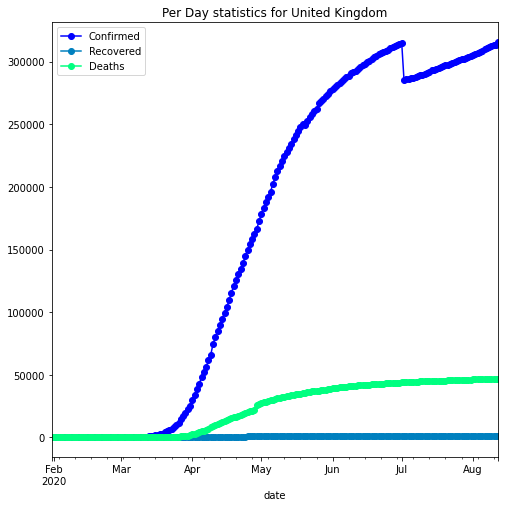

In [58]:
uk_cases_complete=df.loc[df['Country/Region']=='UK']
uk_cases_complete['date'] = uk_cases_complete['ObservationDate'].dt.date
uk_cases_complete['date']=pd.to_datetime(uk_cases_complete['date'])
uk_cases_complete = uk_cases_complete[uk_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = uk_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for United Kingdom',colormap='winter',marker='o')
plt.show()

### Cases reported in last few days in UK

In [59]:
num_plot_uk=num_plot.reset_index()
num_plot_uk['Death Case Increase']=0
num_plot_uk['Confirmed Case Increase']=0
num_plot_uk['Confirmed Case Increase'][0]=0
num_plot_uk['Death Case Increase'][0]=0
for i in range(1,num_plot_uk.shape[0]):
    num_plot_uk['Confirmed Case Increase'][i]=-(num_plot_uk.iloc[i-1][1]-num_plot_uk.iloc[i][1])
    num_plot_uk['Death Case Increase'][i]=-(num_plot_uk.iloc[i-1][3]-num_plot_uk.iloc[i][3])
    if (num_plot_uk['Death Case Increase'][i]<0):
        num_plot_uk['Death Case Increase'][i]=0
num_plot_uk.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
190,2020-08-08,311461,1449,46651,55,765
191,2020-08-09,312574,1451,46659,8,1113
192,2020-08-10,313392,1463,46611,0,818
193,2020-08-11,313394,1464,46611,0,2
194,2020-08-12,315581,1472,46791,180,2187


### Total Confirmed Cases in UK till 15th November, 2020

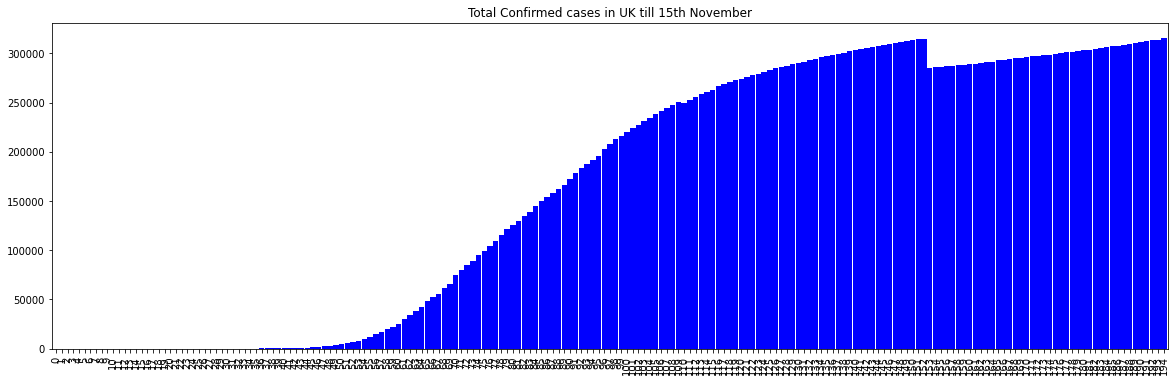

In [60]:
num_plot_uk['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in UK till 15th November')
plt.show()

### Total Recovered cases in UK till 15th November, 2020

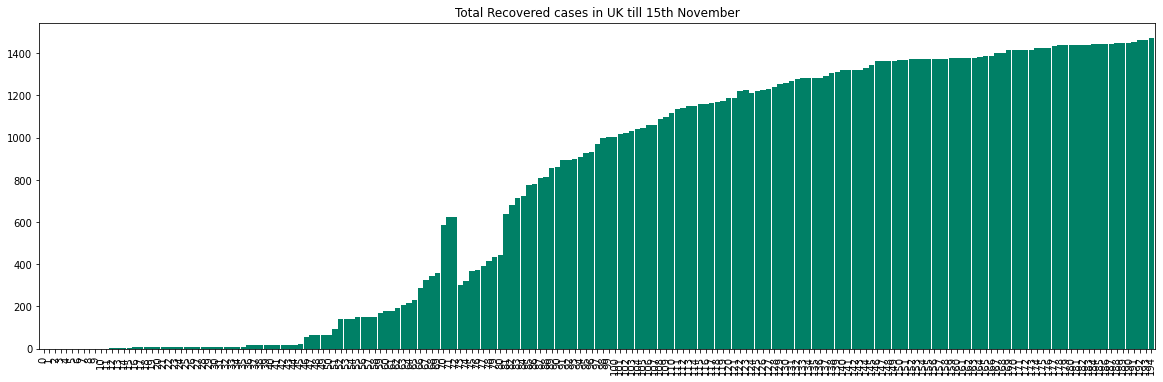

In [61]:
num_plot_uk['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in UK till 15th November')
plt.show()

### Total Casualties in UK till 15th November, 2020

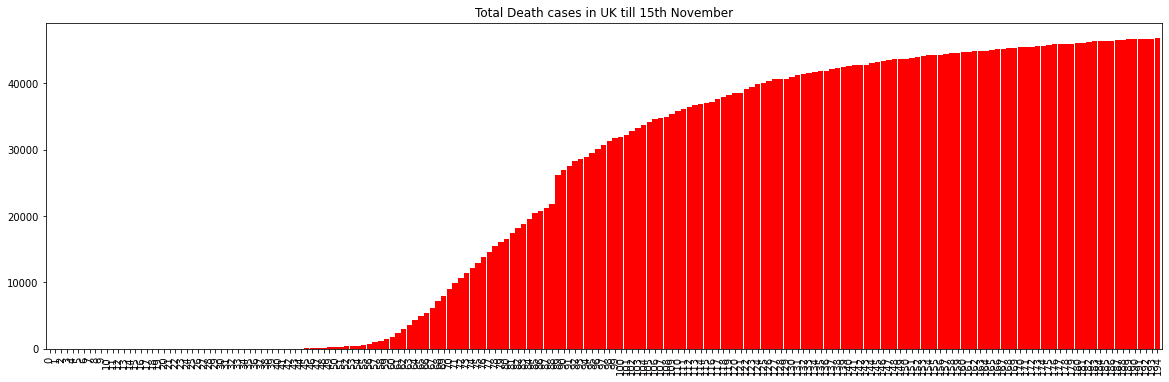

In [62]:
num_plot_uk['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in UK till 15th November')
plt.show()

**From the Plottings we can clearly observe that the confirmed, recovered and death tolls are flattened pretty much. Which signifies that UK is pretty much controlled the situation**

### Death Cases increased in UK till 15th November, 2020

**From the analysis we can observe that after the certain stage of the pandemic situation the number of confirmed cases are decreased and level up at a certain range. In the recent days the cases are reported near about 100**

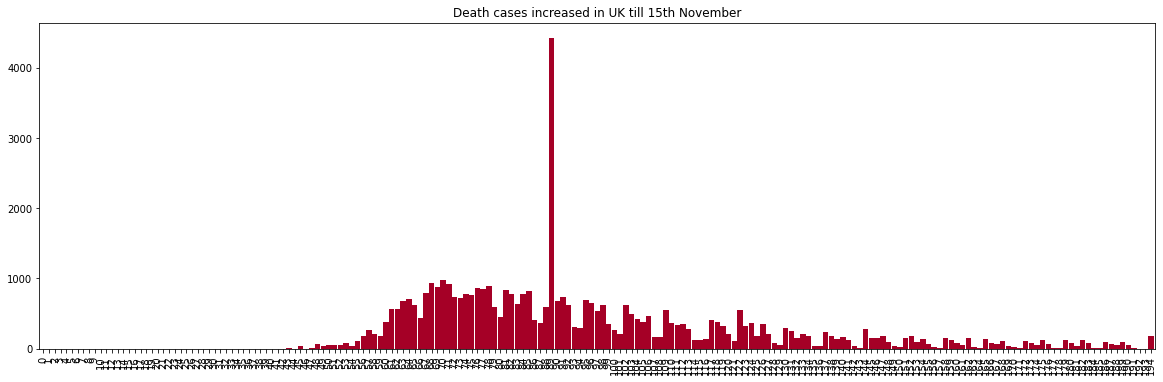

In [63]:
num_plot_uk['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in UK till 15th November')
plt.show()

**From the above observation we can also find out that the death cases are not reported in a huge manner in the recent times. The reported death cases are like under 10 per day, some days it is being reported as 0. From the above analysis it is clearly visible to us that the United Kingdom is fought against the pandemic situation quite brilliantly!**

### Conclusion : United Kingdom has fought well against the Covid-19!

*************************

## E. Does Germany defeat Covid-19 like UK did?

First outbreak:  On 27 January 2020, the first case in Germany was confirmed near Munich, Bavaria. By mid February, the arising cluster of cases had been fully contained. On 25 and 26 February, multiple cases related to the Italian outbreak were detected in Baden-Württemberg.

Total affected: Total positive cases are 983731 till now. Daily number of new cases is highly increasing after September 26.

Death rate: Death rate is very high after April 3. Total death till 25 November is 15381. But in Germany recovery rate is also high, till now total recovered number is 656400.


### Per Day Statistics for Germany till 15th November, 2020

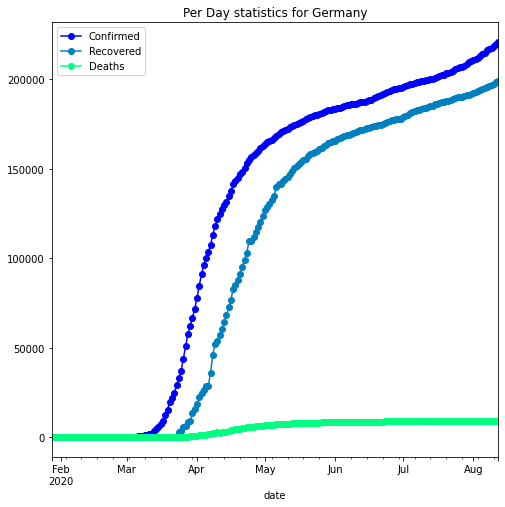

In [64]:
germany_cases_complete=df.loc[df['Country/Region']=='Germany']
germany_cases_complete['date'] = germany_cases_complete['ObservationDate'].dt.date
germany_cases_complete['date']=pd.to_datetime(germany_cases_complete['date'])
germany_cases_complete = germany_cases_complete[germany_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = germany_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Germany',colormap='winter',marker='o')
plt.show()

### Cases reported in the last few days in Germany

In [65]:
num_plot_germany=num_plot.reset_index()
num_plot_germany['Death Case Increase']=0
num_plot_germany['Confirmed Case Increase']=0
num_plot_germany['Confirmed Case Increase'][0]=0
num_plot_germany['Death Case Increase'][0]=0
for i in range(1,num_plot_germany.shape[0]):
    num_plot_germany['Confirmed Case Increase'][i]=-(num_plot_germany.iloc[i-1][1]-num_plot_germany.iloc[i][1])
    num_plot_germany['Death Case Increase'][i]=-(num_plot_germany.iloc[i-1][3]-num_plot_germany.iloc[i][3])
num_plot_germany.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
193,2020-08-08,216903,196550,9201,6,707
194,2020-08-09,217288,196783,9202,1,385
195,2020-08-10,218508,197382,9203,1,1220
196,2020-08-11,219540,198347,9208,5,1032
197,2020-08-12,220859,198991,9213,5,1319


### Total confirmed cases in Germany till 15th November, 2020

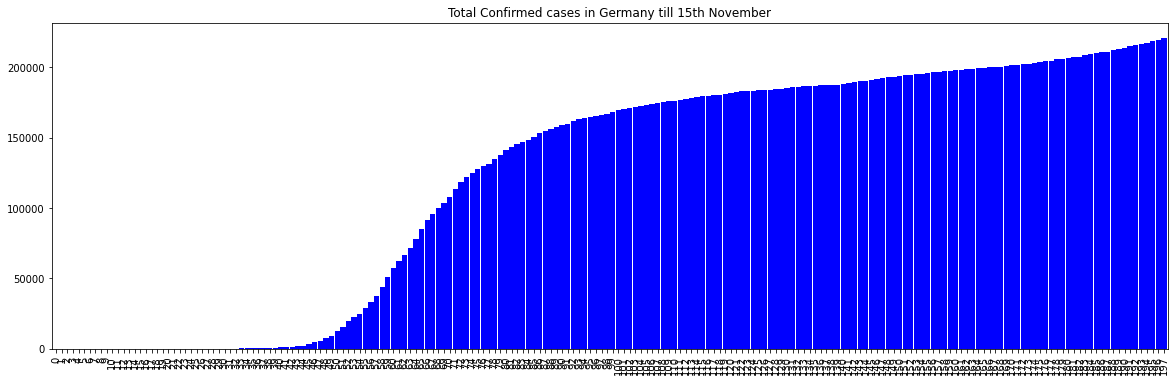

In [66]:
num_plot_germany['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Germany till 15th November')
plt.show() 

### Total Recovered cases in Germany till 15th November, 2020

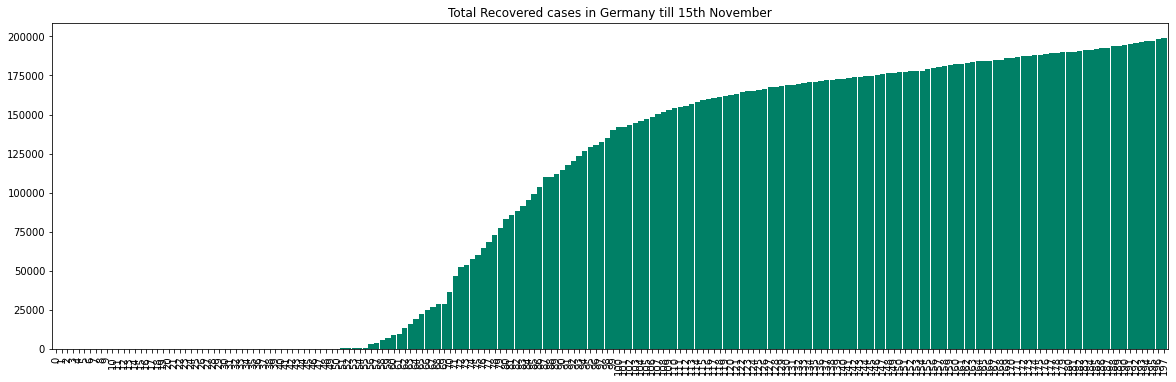

In [67]:
num_plot_germany['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Germany till 15th November')
plt.show()

### Total Death Cases in Germany till 15th November, 2020

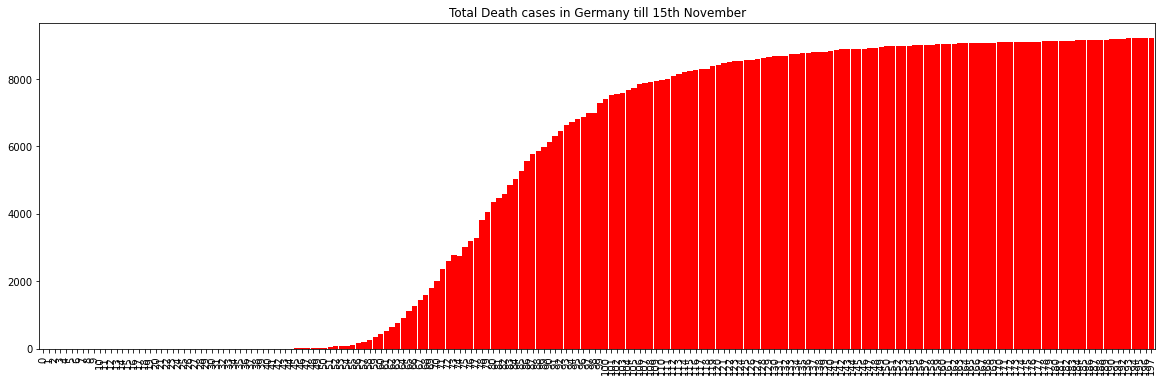

In [68]:
num_plot_germany['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Germany till 15th November')
plt.show()

**From the graphical analysis of the Total Confirmed cases, Recovered cases and death cases we have seen that the graph is flattened after the peak occured. Which shows that the country is doing quite great job to fight against the virus**

### Confirmed cases increased in Germany till 15th November, 2020

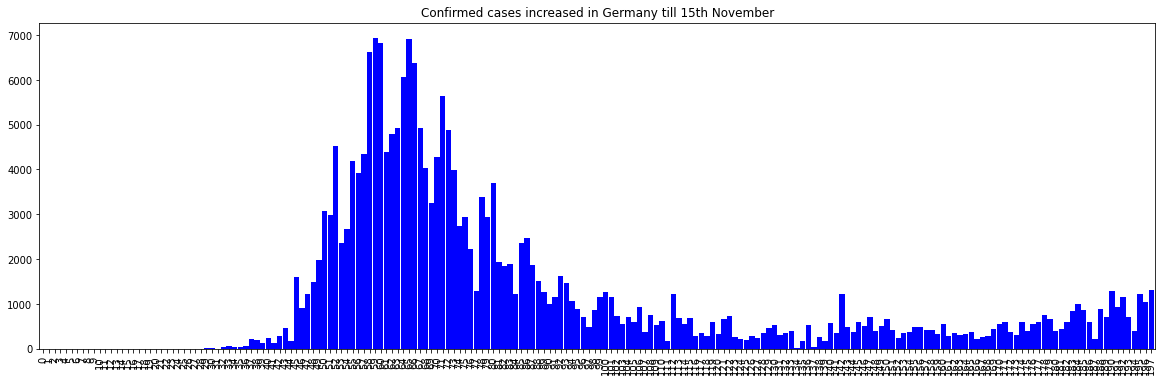

In [69]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Germany till 15th November')
plt.show()

**From the graph analysis we have got that the confirmed cases are now lowered to 1000 whereas the peak was at the 7000 mark a few months back. Which seems that the country is healing! But in the recent times unfortunately the condition is getting worser for the country as it saw per day 30000 rise suddenly**

### Death Cases Increased in Germany till 15th November, 2020

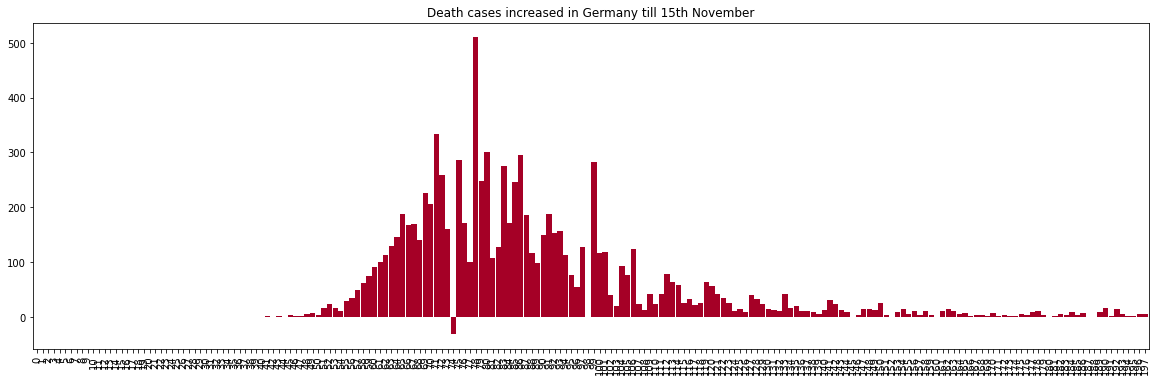

In [70]:
num_plot_germany['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Germany till 15th November')
plt.show()

**As per the analysis the Death tolls decreased to minimal numbers and it is clearly shows that Germany has fought against the virus pretty much**

### From the analysis we can say that, Germany has overcome the pandemic situation positively!

*********************

## F. Does the Tech-country, Japan overcome the situation?

First outbreak: On 15 January 2020, the Ministry of Health, Labour and Welfare, Japan (MHLW) reported an imported case of laboratory-confirmed 2019-novel coronavirus (2019-nCoV) from Wuhan, Hubei Province, China.
Total affected: Cases increasing rate is very high from February 15. Total affected is 31735. Number of daily new cases is lesser than number of cases in mid February but it was in level from September 12 to November 7.
Death Rate: Number of death rate is creasing but daily death cases are reduced from February-March time. Number of death is 2001 till 25 November.


### Per day statistics for Japan, till 15th November, 2020

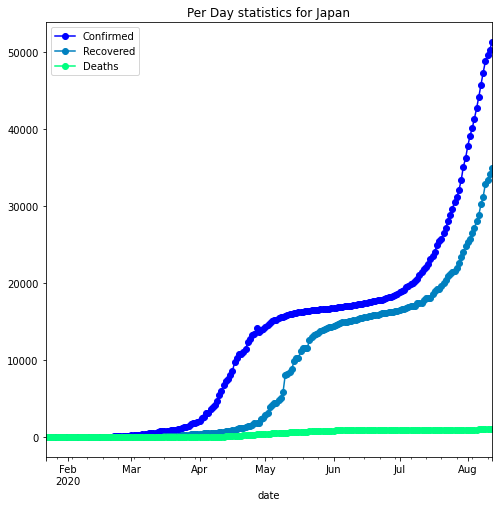

In [71]:
japan_cases_complete=df.loc[df['Country/Region']=='Japan']
japan_cases_complete['date'] = japan_cases_complete['ObservationDate'].dt.date
japan_cases_complete['date']=pd.to_datetime(japan_cases_complete['date'])
japan_cases_complete = japan_cases_complete[japan_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = japan_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Japan',colormap='winter',marker='o')
plt.show()

### Cases reported in recent times in Japan

In [72]:
num_plot_japan=num_plot.reset_index()
num_plot_japan['Death Case Increase']=0
num_plot_japan['Confirmed Case Increase']=0
num_plot_japan['Confirmed Case Increase'][0]=0
num_plot_japan['Death Case Increase'][0]=0
for i in range(1,num_plot_japan.shape[0]):
    num_plot_japan['Confirmed Case Increase'][i]=-(num_plot_japan.iloc[i-1][1]-num_plot_japan.iloc[i][1])
    num_plot_japan['Death Case Increase'][i]=-(num_plot_japan.iloc[i-1][3]-num_plot_japan.iloc[i][3])
    if (num_plot_japan['Confirmed Case Increase'][i]<0):
        num_plot_japan['Confirmed Case Increase'][i]=0
    if (num_plot_japan['Death Case Increase'][i]<0):
        num_plot_japan['Death Case Increase'][i]=0
num_plot_japan.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
199,2020-08-08,47342,31248,1042,0,1578
200,2020-08-09,48782,32867,1047,5,1440
201,2020-08-10,49617,33450,1052,5,835
202,2020-08-11,50302,34136,1058,6,685
203,2020-08-12,51288,34969,1066,8,986


**In the recent times the number of confirmed cases are increasing suddenly, and also it increases the death toll in the recent 5days as of 12th August, 2020**

### Total no. of Confirmed cases in Japan till 15th November, 2020

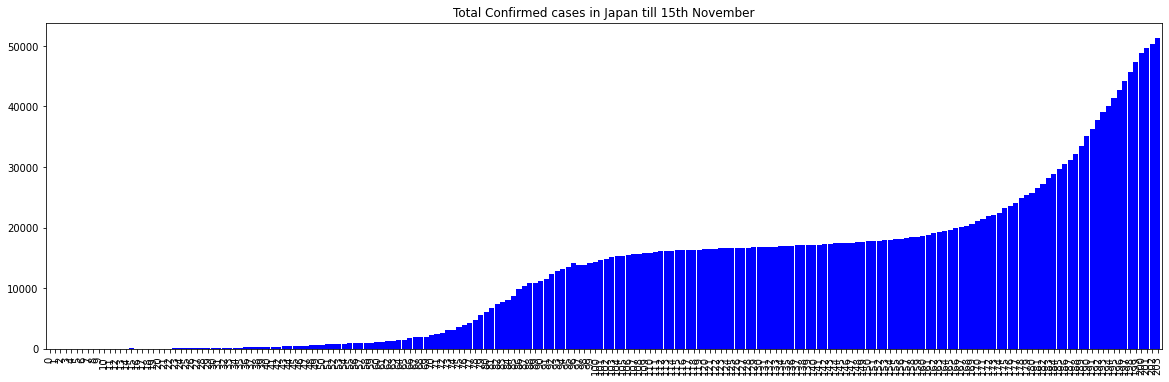

In [73]:
num_plot_japan['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Japan till 15th November')
plt.show()

**As per the graphical analysis of the data we can observe that the confirmed cases are flattened at the 20000 mark and at that period we all thought that Japan has fought against the virus very well. But unfortunately in the last 2 weeks there is suddenly an upswing with steep slope upwards has been shown in the curve. This cost Japan an increment in the Total no. of Confirmed cases from merely 20000 to a rapid 50000 in just two weeks. But the main part of the tension is the new slope in the curve is very much steep and it's upswinging day by day. It does not provide any kind of flatness in the curve which may cost Japan at a very high risk**

### Total no. of Recovered cases in Japan, till 15th November, 2020

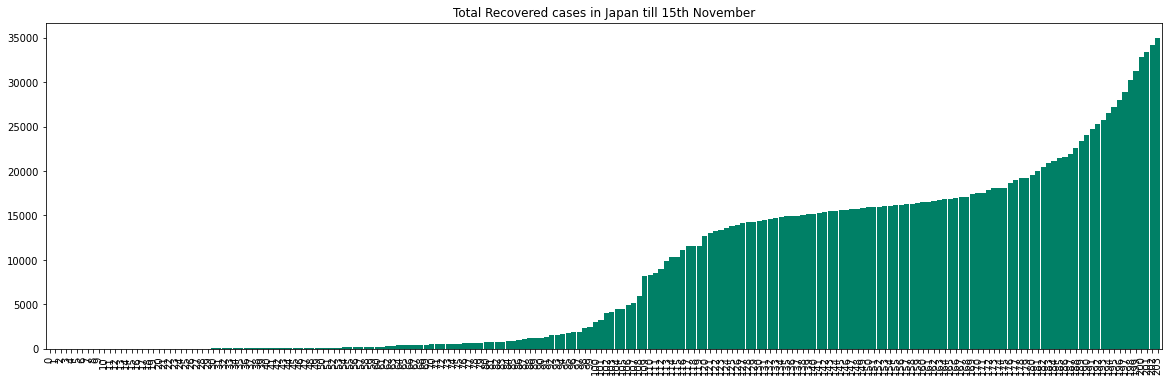

In [74]:
num_plot_japan['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Japan till 15th November')
plt.show()

**If we think about the curve of the confirmed cases the recovery rate is also upswinging manner. That will help Japan to get rid of this high situation**

### Total no. of Death cases in Japan till 15th November, 2020

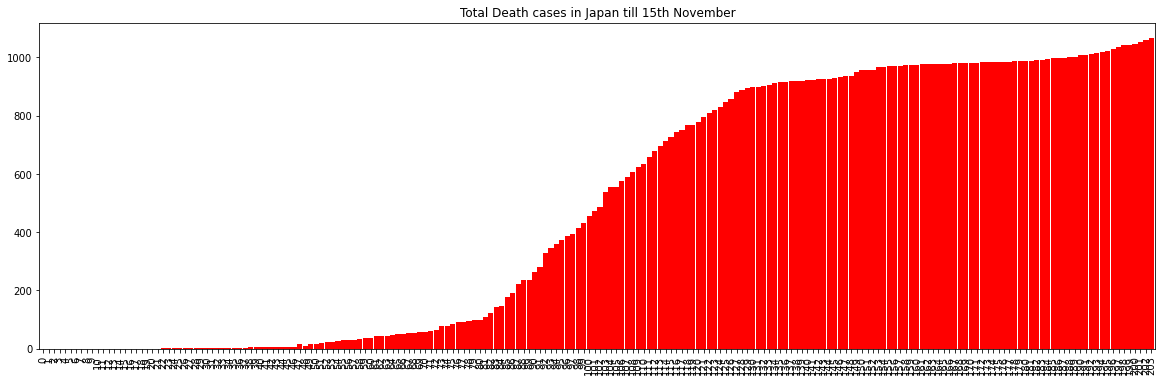

In [75]:
num_plot_japan['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Japan till 15th November')
plt.show()

**As per the curve of the Total confirmed cases and total recovered cases we can easily said that, Japan made a huge impact in the in earlier days as a result they saw a flattened curve for 1-2 months. But whwnever they thought that this could end the spread of the virus and re-opened everything, at the very moment thay have seen the upswinging curve suddenly. But a blessing for Japan is that they have controlled the Death cases, as we can see in the curve that it is flattened from last 3 months and there is no sudden increment in the curve. Which shows a good sign for the Japan Government. But still Japan have to be cautious about the upswinging curve of the confirmed cases though the Death toll is under control right now** 

### Confirmed cases increased in Japan till 15th November, 2020

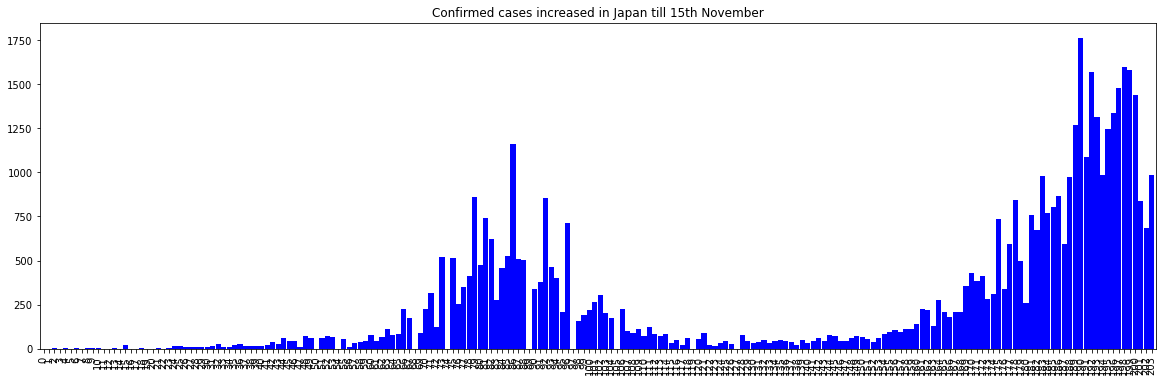

In [76]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Japan till 15th November')
plt.show()

**As you can clearly observe that the peaks are coming in the recent times though they are not coming in between of the two peaks in a gap of 2 - 3 months. In the month of May, Japan have shown a massive increment day to day confirmed cases and after that they have managed to bring the manhattans down. but unfortunately the day to day confirmed cases are increasing in a drastic manner from the previous one. The upswing is much more steeper than the previous manhattans. Which may cost Japan!** 

### Death Cases increase in Japan till 15th November, 2020

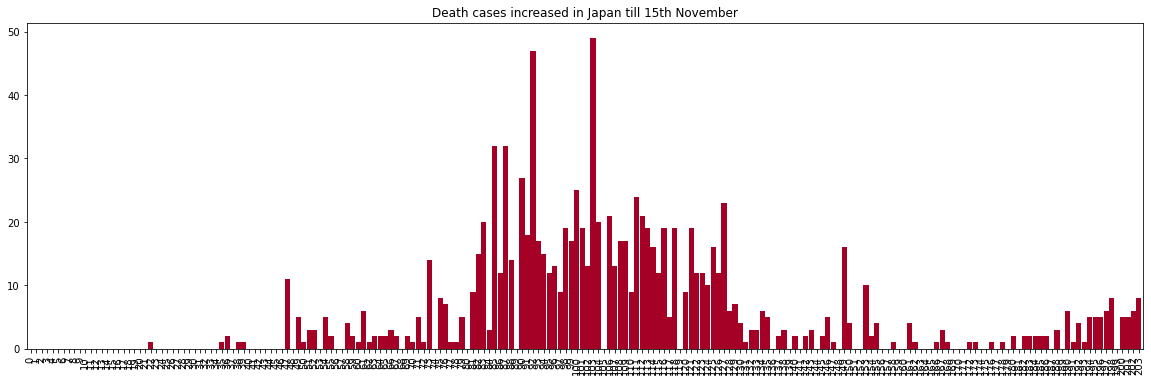

In [77]:
num_plot_japan['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Japan till 15th November')
plt.show()

**But it is really strange that in the recent times the day to day confirmed cases are increasing in an exponential manner but the death toll is flattened in the past 3 months. Which shows the dedications of the doctors and the management of Japan Government to prevent the death toll in this high time of spreading. Which is a great news and achievement for Japan**

### In the last 2-3 months Japan have flattened the curve of the confirmed cases, but unfortunately whenever they are all set to re-open everything at that very moment the confirmed cases are increasing drastically and higher than the previous upswings. Japan has controlled the situation but right now suddnly they are also facing the huge upswings and the steep slopes in the curve, though they have prevent the death tolls in the recent high time. 

**********************

## G. Australia - Did they defeat Covid-19 ?

The first confirmed case in Australia was identified on 25 January 2020, in Victoria, when a man who had returned from Wuhan, China, tested positive for the virus. Australian borders were closed to all non-residents on 20 March. Social distancing rules were imposed on 21 March, and state governments started to close 'non-essential' services.The number of new cases initially grew sharply, then levelled out at about 350 per day around 22 March, and started falling at the beginning of April to under 20 cases per day by the end of the month. A second wave of infections emerged in Victoria during May and June, which was attributed to an outbreak at a Melbourne hotel used for quarantining international arrivals. The second wave was much more widespread and deadlier than the first; at its peak, the state had over 7,000 active cases. The wave ended with zero new cases being recorded on 26 October, As of 25 November 2020, Australia has reported 27,854 cases, 25,355 recoveries, and 907 deaths, with Victoria accounting for nearly 75 percent of cases and 90 percent of fatalities.Compared to other Western countries, notably the United States and European countries, Australia's handling has been praised for its effectiveness and fast-forward reactions.

### Per Day statistics for Australia till 15th November, 2020

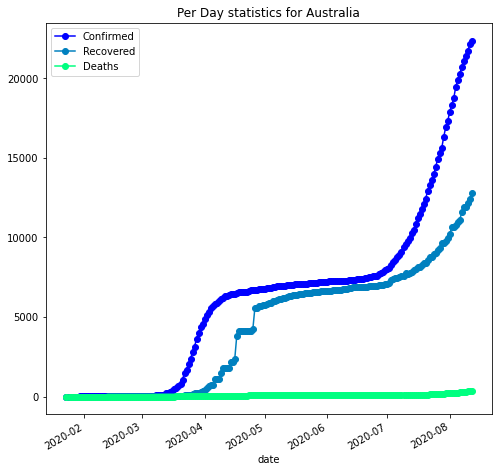

In [78]:
aus_cases_complete=df.loc[df['Country/Region']=='Australia']
aus_cases_complete['date'] = aus_cases_complete['ObservationDate'].dt.date
aus_cases_complete['date']=pd.to_datetime(aus_cases_complete['date'])
aus_cases_complete = aus_cases_complete[aus_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = aus_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Australia',colormap='winter',marker='o')
plt.show()

### Cases reported in the recent times in Australia

In [79]:
num_plot_aus=num_plot.reset_index()
num_plot_aus['Death Case Increase']=0
num_plot_aus['Confirmed Case Increase']=0
num_plot_aus['Confirmed Case Increase'][0]=0
num_plot_aus['Death Case Increase'][0]=0
for i in range(1,num_plot_aus.shape[0]):
    num_plot_aus['Confirmed Case Increase'][i]=-(num_plot_aus.iloc[i-1][1]-num_plot_aus.iloc[i][1])
    num_plot_aus['Death Case Increase'][i]=-(num_plot_aus.iloc[i-1][3]-num_plot_aus.iloc[i][3])
num_plot_aus.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
197,2020-08-08,21084,11874,295,17,386
198,2020-08-09,21397,11876,313,18,313
199,2020-08-10,21713,12144,331,18,316
200,2020-08-11,22127,12395,352,21,414
201,2020-08-12,22358,12779,361,9,231


### Total no. of confirmed cases in Australia till 15th November, 2020

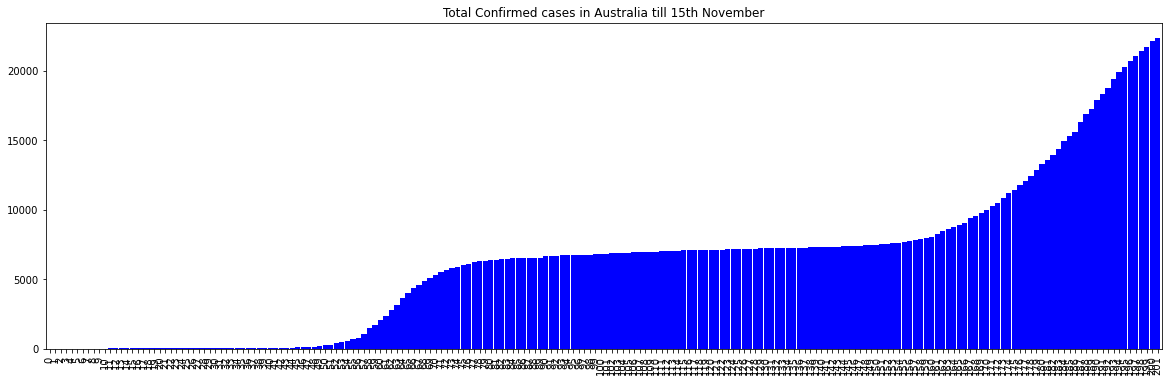

In [80]:
num_plot_aus['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Australia till 15th November')
plt.show()

**As we can see that the flattened curve is upswinging nowadays, which may cause some serious issues for the country in the recent times. The upswinging curve of total confirmed cases show that the no. of confirmed cases are increased in the recent times and it's happening suddenly like Japan is facing**

### Total no. of Recovered cases in Australia till 15th November, 2020

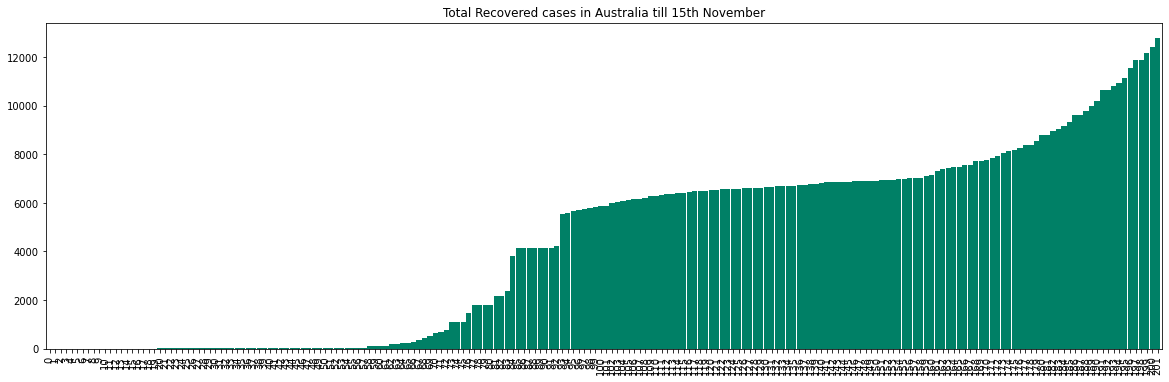

In [81]:
num_plot_aus['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Australia till 15th November')
plt.show()

**As we can observe that the curve of the confirmed cases are increasing day by day and beside that the recovered cases are also increasing which shows a pretty positive sign for the country**

### Total no. of Death Cases in Australia till 15th November, 2020

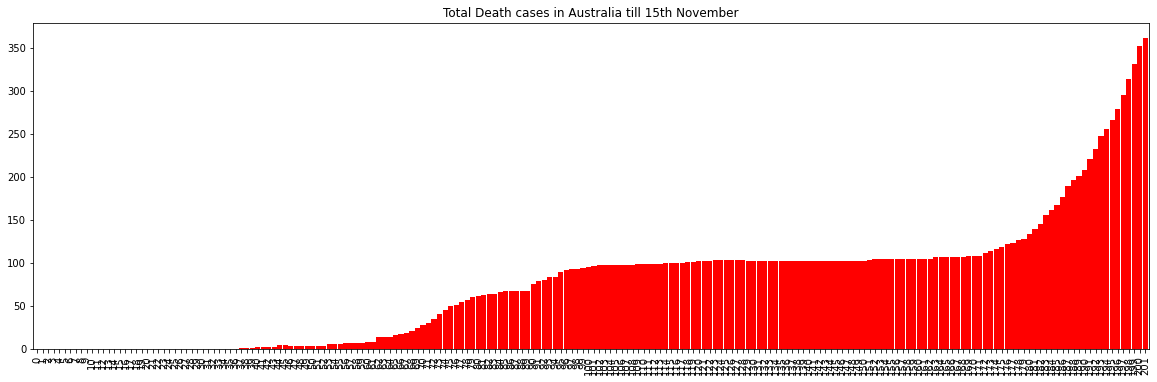

In [82]:
num_plot_aus['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Australia till 15th November')
plt.show()

**The Death toll is also increasing with the increment of the total confirmed cases. Which may cost the country after a certain relaxation period of flattened curve**

### Confirmed cases increased in Australia till 15th November, 2020

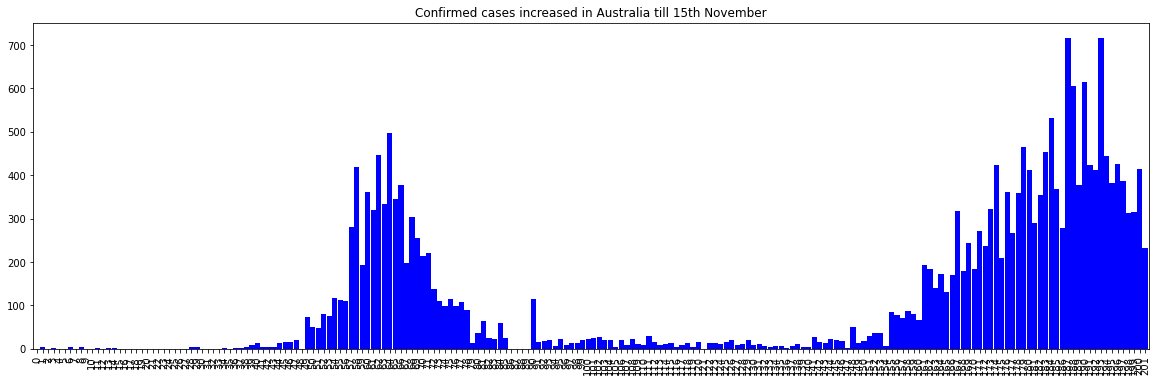

In [83]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Australia till 15th November')
plt.show()

**As the confirmed cases are increasing day by day in a huge manner it is very difficult to show composure for the Government of Australia. The confirmed cases were came down to 50 in the past 2-3 months after the drastic situation. But unfortuanately it's growing higher than the previous manhattans and showing a peak of 700 per day. But the good thing is that, in the recent times the confirmed cases per day are come down to 400 mark, which shows a good sign for Australia**

### Death cases increased in Australia till 15th November, 2020

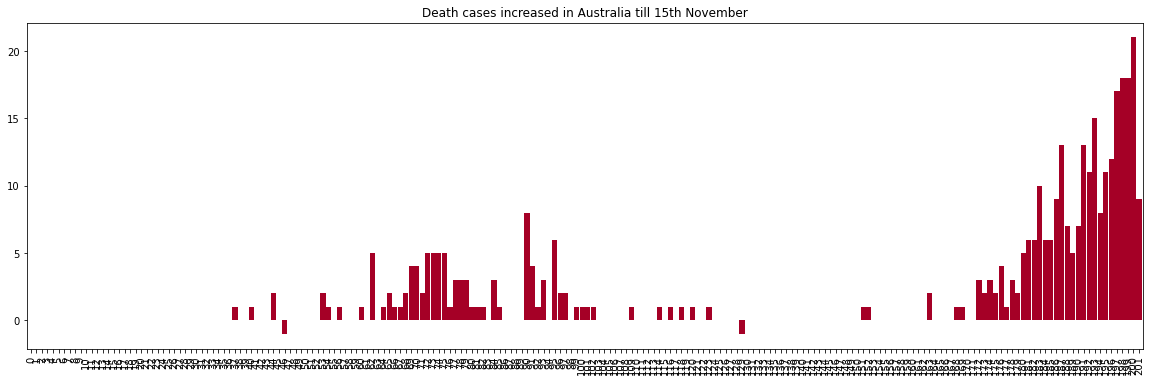

In [84]:
num_plot_aus['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Australia till 15th November')
plt.show()

**In the recent times the death toll is increasing in the day to day basis in a huge quantity, which may cost the Government of Australia in this pandemic situation. The death toll is increasing day by day very much in Australia. The highest death toll is shown in the day of 11th August, 2020 where the death toll rises to 21, the highest in the whole pandemic  situation**

### Australia had prevented the spreading of the virus but recently the country has shown the unconditional increase in the confirmed and death cases day to day

****************************
************************

# Chapter 4 :  LOCKDOWN - The Saviour or not ?

On March 24, Mr. Modi said: “I fold my hands to say — please stay where you are,” adding that “all leading experts say 21 days is the minimum we require to break the coronavirus transmission cycle. If we are not able to handle these 21 days, the country and your family will go back 21years and many families will be destroyed. I am saying this not as the Prime Minister but as your family member.” The night of his address, India recorded 536 cases — a six-fold jump in less than two weeks; there were 10 deaths. Government and health officials feel that a complete lockdown and cessation of travel will keep those who are infected isolated and restrict infections to contained clusters. This would avoid community transmission when it becomes impossible to trace the source of infections and quarantining is of no use 

The four months of lockdown delayed the peaking of cases, which significantly benefited us in the following ways
Improved health infrastructure
The lockdown gave the governments, both central and states, time to ramp up health infrastructure. 
Innovations in treatment
Since the development of specific anti-viral medicine for COVID-19 will take possibly years, the lockdown allowed doctors to come up with quick innovations in treatments by repurposing existing medicines for other diseases that have shown effectiveness against COVID-19.
Lowering the mortality rate
India has about 1.75 million total cases of COVID-19 currently. Imagine this happening in April, instead of July, when there was a shortage of beds, ventilators, basic PPE kits and absence of any treatment.

Lockdown delayed the peaking of cases allowing breathing time for other innovations also like no-touch treatment, using technology (mobile, video telephony, robots etc) to provide critically needed but scarce healthcare workers safe environment to treat patients.


#### RED LINE shows the date of IMPOSING LOCKDOWN

#### GREEN LINE shows the date of REVOKING LOCKDOWN

## A. China's Lockdown Period - SUCCESSFUL

**China impossed lockdown on 23rd January, 2020**

**China revoked lockdown on 8th April, 2020**

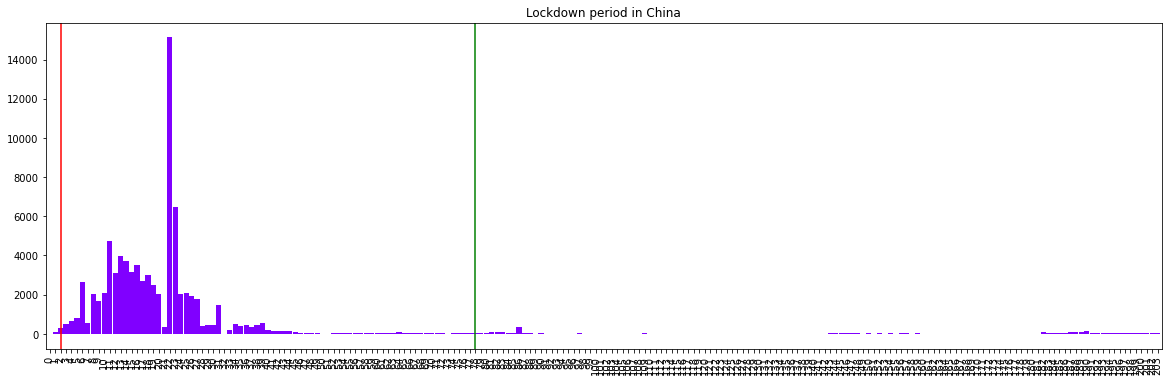

In [85]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Lockdown period in China',colormap='rainbow')
plt.axvline (x = 2, color = 'r')
plt.axvline (x = 78, color = 'g')
plt.show()

**China's Lockdown : China imposed lockdown of all total 76 days and as a result the confirmed cases incrementation is nullified and turned out at a negligible rate. So definitely we can say that China imposed the lockdown in a correct manner as a result they had prevented the coronavirus spread**



-----------

## B. Italy's lockdown Period - SUCCESSFUL

**Italy imposed lockdown on 9th March, 2020**

**Italy revoked lockdown on 18th May, 2020**

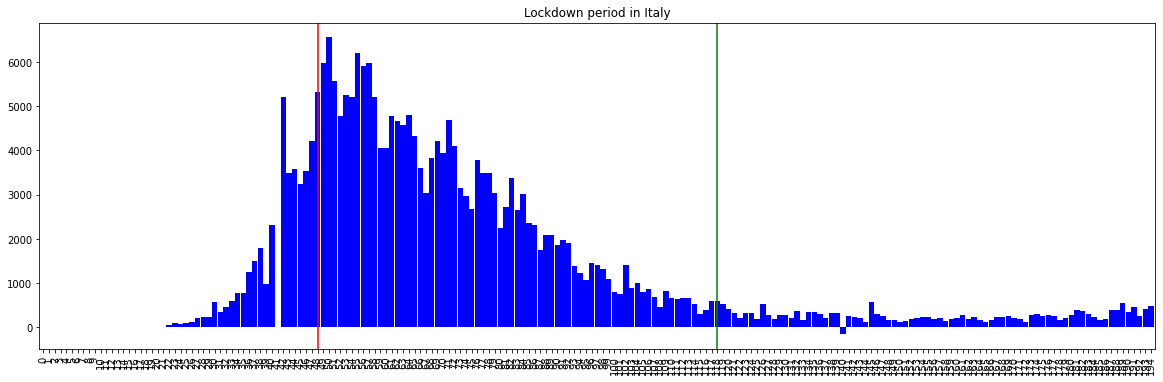

In [86]:
num_plot_italy['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Lockdown period in Italy',colormap = 'winter')
plt.axvline (x=48, color = 'r')
plt.axvline (x=118, color = 'g')
plt.show()

**Italy's Lockdown : Due to rapid increase of corona virus spread in Italy, the government imposed lockdown on 9th March, 2020 and the lockdown elongated to 70 days as a result the increment in the confirmed cases were decreased from 6000 per day to 500 per day (approx.). Which signifies that Italy has prevented the spread out of the virus by imposing the lockdown, and we can clearly observe that the LOCKDOWN IS SUCCESSFUL FOR ITALY!**

------------

## C. United States of America Lockdown Period - UNSUCCESSFUL

**USA imposed lockdown on 19th March, 2020**

**USA revoked lockdown on 13th June, 2020**

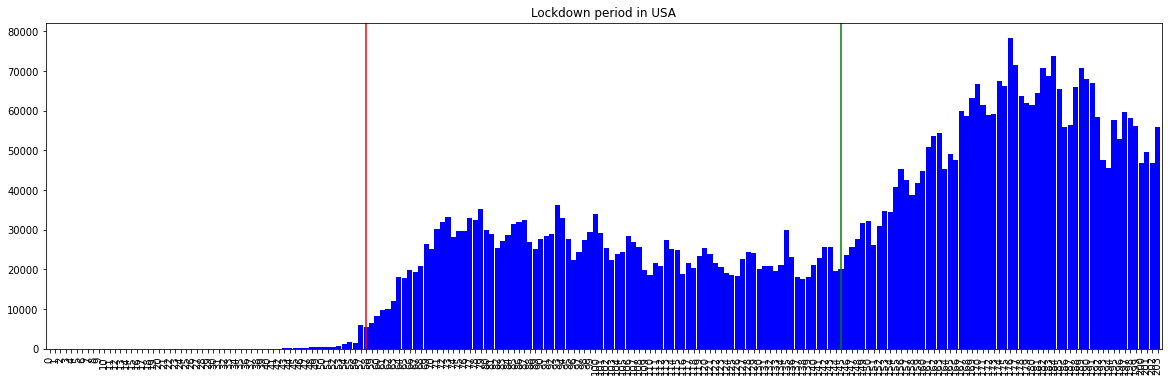

In [87]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period in USA')
plt.axvline (x = 58, color = 'r')
plt.axvline (x= 145, color = 'g')
plt.show()

**USA's Lockdown : United States of America imposed lockdown on 19th March, 2020 when they were at the initial stage and the cases were 10000. After the lockdown implementation the cases were raised to 40000 daily and it was continued 87 days but the daily cases were not increased beyond 40000. At this moment Donald Trump decided to open USA and re-open the economy as they faced a decrement of 4.5% GDP, and this will cost the country hugely if the economy is not opened yet. As the lockdown revoked on 13th June, 2020, the cases are drastically increasing and creating a new record every day. As we can see that after the revokation of lockdown the condition became worser for USA. They have seen 80000 cases daily, and the tally is still increasing. Unfortunately, for USA the lockdown period is successful to some extent and to prevent the daily exponential increment but on the same side, it did not make the curve downward or even flattened. The lockdown in case of USA IS UNSUCCESSFUL!**

-------------

## D. Germany Lockdown Period - SUCCESSFUL

#### Germany imposed lockdown on 23rd March, 2020

#### Germany revoked lockdown on 10th May, 2020

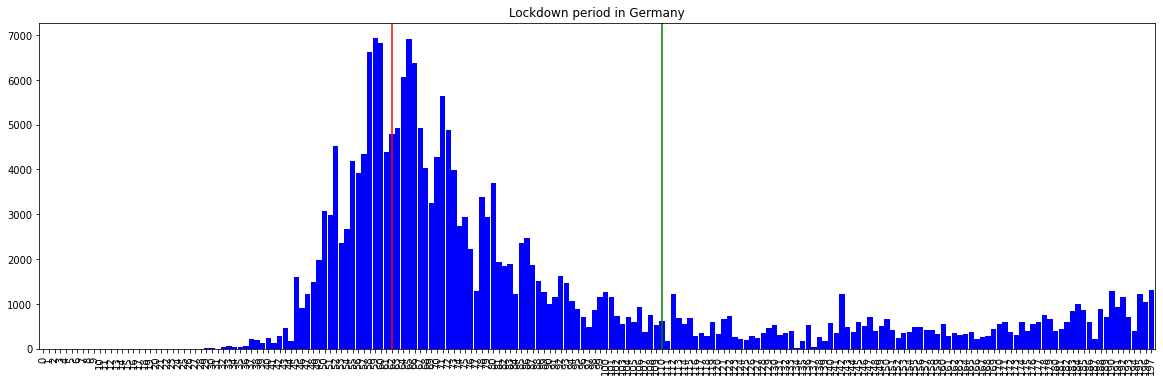

In [88]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period in Germany')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 110, color= 'g')
plt.show()

**Germany Lockdown : The government of Germany imposed lockdown from 23rd March, 2020 when the country is facing high rise in the per day confirmed case rate. They faced merely 7000 cases per day at the time of lockdown. After the lockdown was imposed, the daily new confirmed cases are slowly decreased within  a month to 2000 cases per day. Which shows that the lockdown action is successful for the country and the health sectors. At this on 10th May, 2020 they have revoked lockdown to re-open the country and economy. Still the cases are coming on a day to day basis but they are in a certain numbers around 1000. And also the death rate is also come down to 20 odd numbers. Which shows GERMANY SUCCESSFULLY IMPOSED LOCKDOWN AND PREVENTED THE BREAK THROUGH OF THE VIRUS**

---------------

## E. AUSTRALIA Lockdown - SUCCESSFUL to some extent

#### Australia imposed national lockdown on 23rd March, 2020

#### Australia eased the lockdown on 8th July, 2020

#### Australia again imposed the lockdown on 7th August, 2020 due to increment in the daily cases

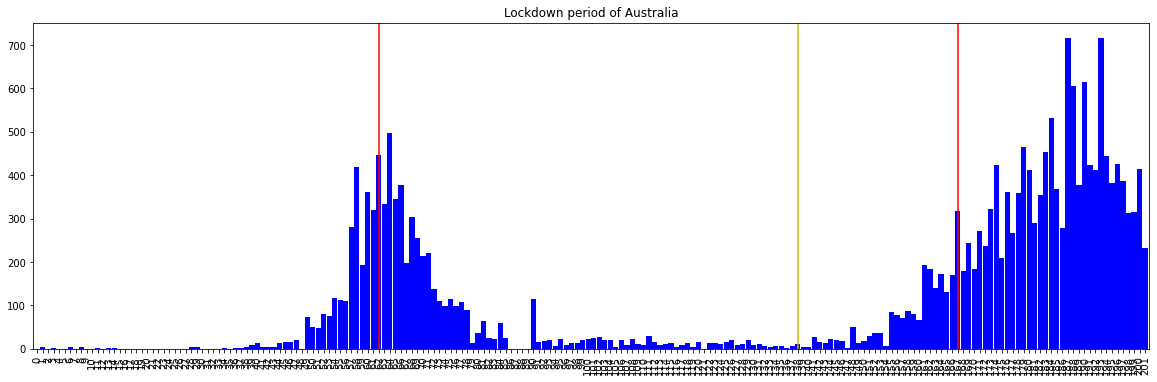

In [89]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Australia')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 138, color = 'y')
plt.axvline (x=167, color = 'r')
plt.axvline (x=227, color = 'g')
plt.show()

**Australia Lockdown : The government imposed lockdown on 23rd March, when the country was facing the high rise in the daily confirmed cases. After imposing the lockdown properly, the country stabilized the situation and the controlled the daily cases down to 100. At that moment the government declared that some areas will be eased from the lockdown and as a result they again saw the increment in the daily confirmed cases rapidly. At this the government imposed lockdown on 7th August, 2020 to prevent the cases. This time the cases were doubled up than the previous high rises. We can say that, AUSTRALIA SUCCESSFULLY CONTROLLED THE SPREAD OF THE VIRUS IN THE LOCKDOWN PERIOD, BUT WHENEVER THEY OPENED UP, IT BECAME WORSER FOR THEM** 

---------------

## F. JAPAN Lockdown Period - SUCCESSFUL to some extent

#### Japan imposed lockdown on 7th April, 2020

#### Japan revoked lockdown on 31st May, 2020

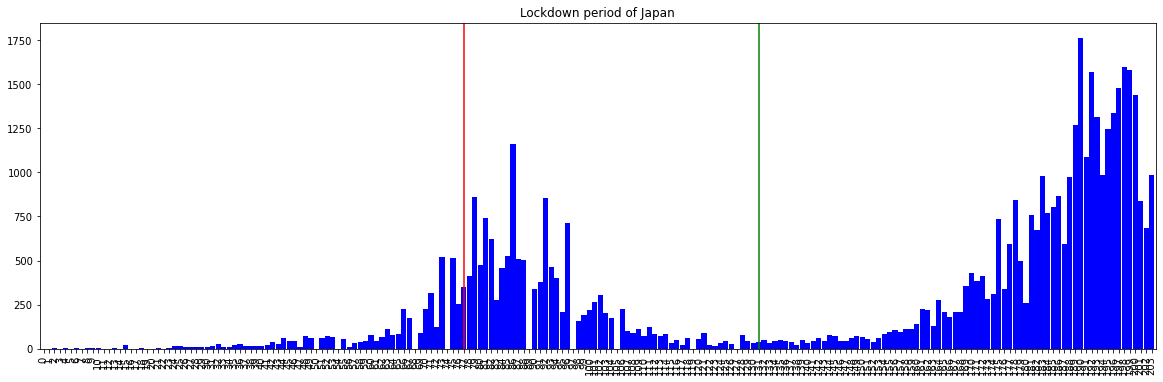

In [90]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Japan')
plt.axvline (x = 77, color = 'r')
plt.axvline (x = 131, color = 'g')
plt.show()

**Japan Lockdown : On the situation of increasing confirmed cases the Japan government imposed lockdown on 7th April, and they successfully controlled the cases. But the worser days were yet to come for Japan. As the lockdown was revoked the cases were slowly increasing and in a few days the cases were increasing exponentially. The daily confirmed cases are raised to 1500. And the tally is still growing. But Japan was not imposing lockdown, rather they had started rigorous testing to prevent the virus. we can say that, JAPAN IS SUCCESSFUL IN THE EARLY LOCKDOWN PERIOD AND RIGHT NOW THEY HAVE INCREASED THE TESTING TO PREVENT THE VIRUS**  

*****************************


*************************

# Chapter 5 : INDIA - The Fastest growing epicentre

The first case of coronavirus in India was identified on 30 January 2020. By 3 February, the number of cases increased to 3. On 4 March, 22 new cases were identified, of which 14 were from a group of tourists who had arrived from Italy (The Week 2020). In March, India also reported its first coronavirus-related death. The number of confirmed cases in India crossed 1000 on 29 March, 30,000 on 28 April, and 180,000 on 30 May. The death toll crossed 50 on 1 April, 1000 on 28 April, and 5000 on 30 May. As of 25th November 2020, the numbers of infected cases and deaths are 9,227,557 and 134,804, respectively (World meter 2020b).On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days, limiting movement of the entire 1.3 billion population of India as a preventive measure against the COVID-19 pandemic in India.It was ordered after a 14-hour voluntary public curfew on 22 March, followed by enforcement of a series of regulations in the country's COVID-19 affected regions.

**Observing the cases in India. Confirmed cases are increasing in India each day. There is a need to get a flatter curve for confirmed cases which currently is in upswing with a steep increase since past few days.**

### Per Day Statistics for India till 15th November, 2020

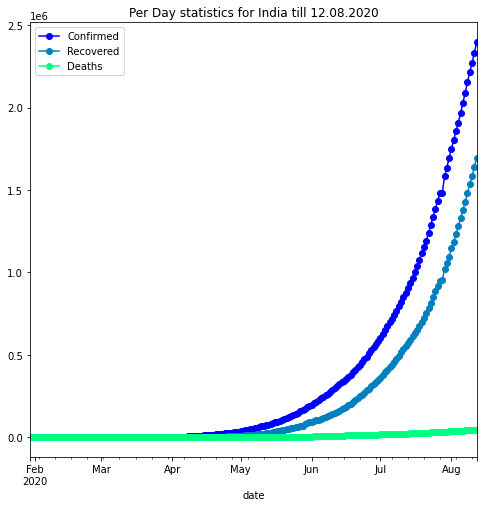

In [91]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot['Confirmed'][132]=287154
num_plot['Recovered'][132]=140928
num_plot['Deaths'][132]=8106
num_plot['Confirmed'][134]=309595
num_plot['Recovered'][134]=154235
num_plot['Deaths'][134]=8888
num_plot['Confirmed'][135]=321634
num_plot['Recovered'][135]=162327
num_plot['Deaths'][135]=9197
num_plot['Confirmed'][136]=333039
num_plot['Recovered'][136]=169684
num_plot['Deaths'][136]=9521
num_plot['Confirmed'][137]=343071
num_plot['Recovered'][137]=180324
num_plot['Deaths'][137]=9917
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India till 12.08.2020',marker='o')
num_plot_india=num_plot.reset_index()

### Cases reported in the recent times in India

In [92]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
#num_plot_india['Confirmed'][132]=287154
#num_plot_india['Recovered'][132]=140928
#num_plot_india['Deaths'][132]=8106
#num_plot_india['Confirmed'][134]=309595
#num_plot_india['Recovered'][134]=154235
#num_plot_india['Deaths'][134]=8888
#num_plot_india['Confirmed'][135]=321634
#num_plot_india['Recovered'][135]=162327
#num_plot_india['Deaths'][135]=9197
#num_plot_india['Confirmed'][136]=333039
#num_plot_india['Recovered'][136]=153792
#num_plot_india['Deaths'][136]=9521
#num_plot_india['Confirmed'][137]=343071
#num_plot_india['Recovered'][137]=180324
#num_plot_india['Deaths'][137]=9917
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase
186,2020-08-03,1855745,1230509,38938,52050,803
187,2020-08-04,1908254,1282215,39795,52509,857
188,2020-08-05,1964536,1328336,40699,56282,904
189,2020-08-06,2027074,1378105,41585,62538,886
190,2020-08-07,2088611,1427005,42518,61537,933
191,2020-08-08,2153010,1480884,43379,64399,861
192,2020-08-09,2215074,1535743,44386,62064,1007
193,2020-08-10,2268675,1583489,45257,53601,871
194,2020-08-11,2329638,1639599,46091,60963,834
195,2020-08-12,2396637,1695982,47033,66999,942


**8th August has recorded highest number of COVID19 confirmed cases in India in a day (64399). In the last few days the peak in cases have been increasing almost everyday. Note: We are not considering the stats on 28th and 29th July because it seems to be incorrect.**

### Confirmed cases increased in India till 15th November, 2020 

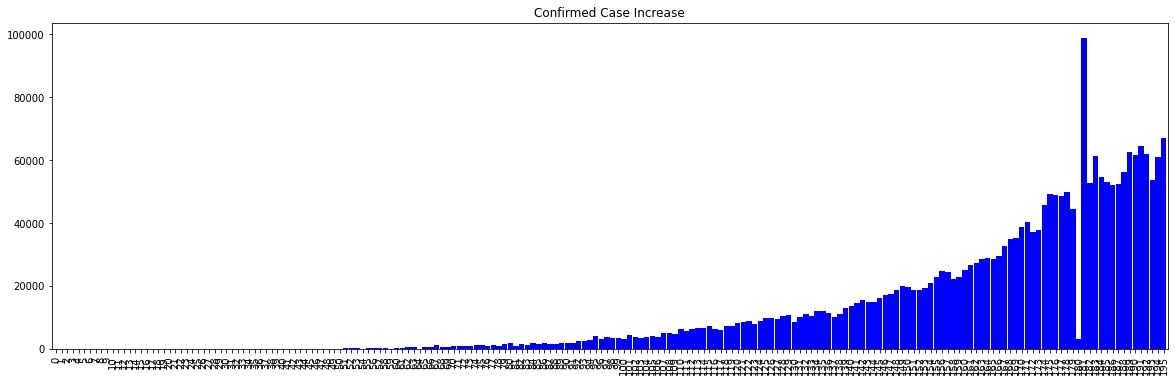

In [93]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()

**The day to day confirmed cases are increasing exponentially and everyday India is creating a new record on the per day confirmed cases**

### Death cases increased in India till 15th November, 2020

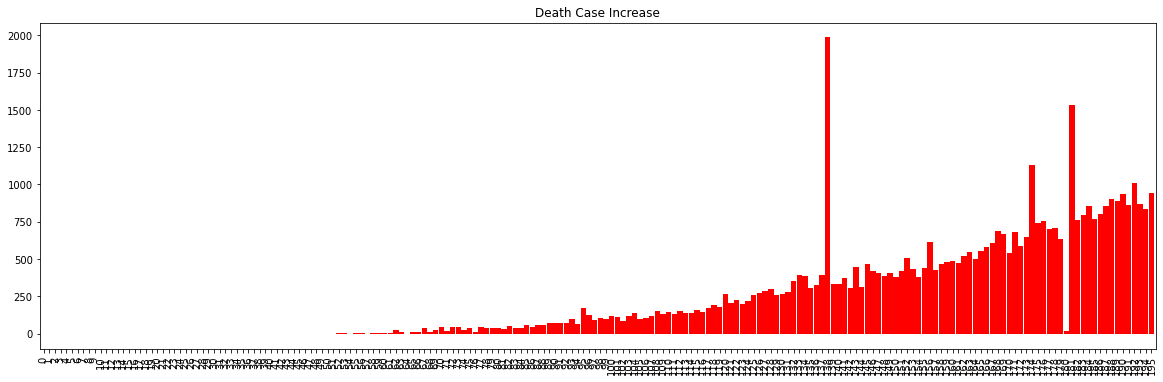

In [94]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Death Case Increase')
plt.show()

**As the day to day confirmed cases are increasing exponentially thedeath cases are also increasing in the exponential manner with a rate of min 1000 people per day. The highest peak have obtained of 2000 people have died in a day. And the number is increasing daily**

### Total no. of confimed cases in India till 15th November, 2020

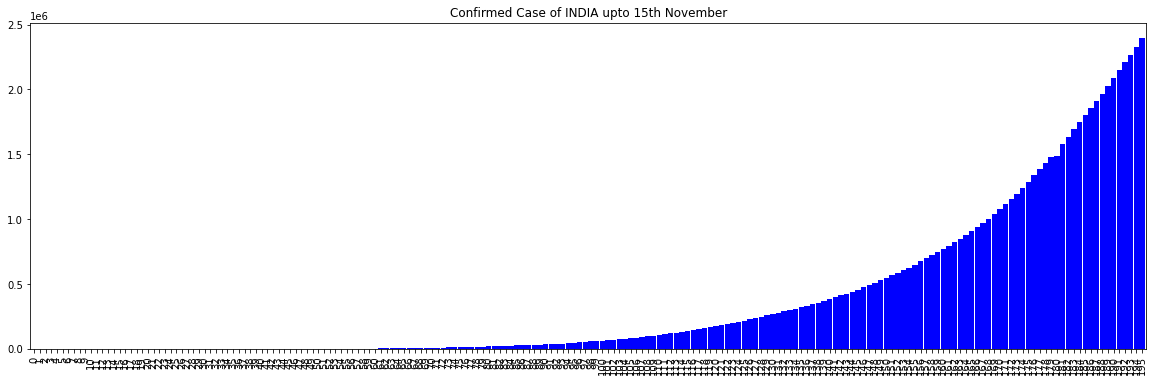

In [95]:
num_plot_india['Confirmed'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case of INDIA upto 15th November')
plt.show()

### Total no. of Recovered cases in India till 15th November, 2020

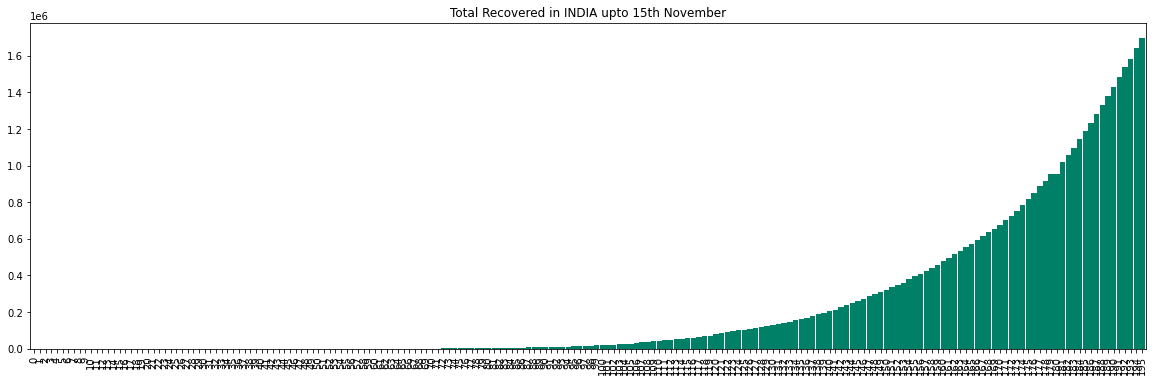

In [96]:
num_plot_india['Recovered'].plot(kind='bar',width=0.95,colormap='summer',figsize=(20,6),title='Total Recovered in INDIA upto 15th November')
plt.show()

### Total no. of Death cases in India till 15th November, 2020

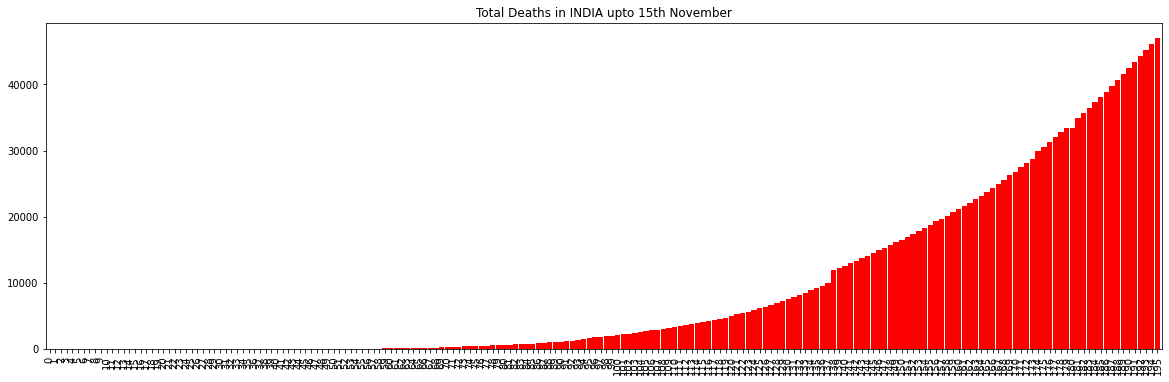

In [97]:
num_plot_india['Deaths'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Total Deaths in INDIA upto 15th November')
plt.show()

**In the current situation of pandemic the confirmed cases are creating new record daily as well as the death cases. The death toll rises upto 50000 still it is not flattening anymore. Not a single chance of flattening has seen in the curve rather the growth rate is exponentially. India is yet to have the worst situation like United States are having** 

## >> INDIA's LOCKDOWN PERIOD - UNSUCCESSFUL 

### India imposed lockdown on 23rd March, 2020

### India revoked lockdown on 30th June, 2020

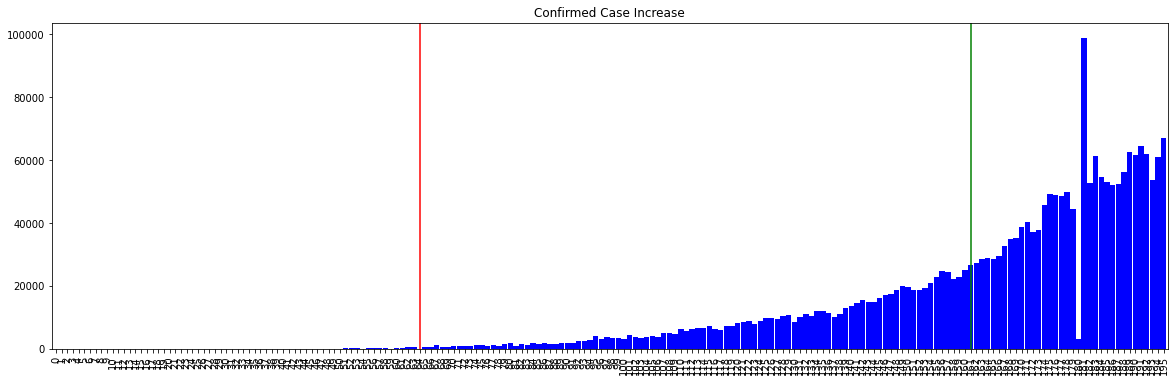

In [98]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.axvline (x=64, color = 'r')
plt.axvline (x= 161, color = 'g')
plt.show()

**India Lockdown : After watching the world suffering from the virus, India has take precaution earlier and imposed lockdown on 23rd march, 2020. After that the cases were increasing in a daily basis and exponentially, and the toll reached to 40000 mark. At that time the government decided to revoke the lockdown. As a result the cases were raised to 2500000 (As of the data of 12th August, 2020). India is having the worst condition in the world. The cases are increasing 60000 daily. There is no sign of flattening the curve rather it is exponentially increasing and the curve is obtaining more and more steep slope day by day. INDIA, IN THE PERSPECTIVE OF LOCKDOWN WAS TOTALLY UNSUCCESSFUL, AND BECAME 3RD HIGHEST INFECTED COUNTRY IN THE WORLD**  

********************

# Chapter 6 : STATE-WISE ANALYSIS OF INDIA

The COVID-19 pandemic in Uttar Pradesh, India was first confirmed on 4 March 2020, with the first positive case in Ghaziabad. As of 31 October 2020, the state has 4,81,863 confirmed cases, resulting in 7,025 deaths and 4,51,070 recoveries.
The first case of the COVID-19 pandemic in the Indian state of Maharashtra was confirmed on 9 March 2020.
Maharashtra is a hotspot that accounts for nearly one-third of the total cases in India as well as about 40% of all deaths. As of 7 July, the state's case fatality rate is nearly 4.3%, which is lower than the global average but significantly higher than other Indian states with large numbers of cases. Mumbai is the worst-affected city in India, with about 100,000 cases
Covid-19: Punjab govt to impose night curfew across the state from 1 Dec. Where as in West Bengal West Bengal registers 49 more Covid-19 deaths, 3,545 fresh cases.
The first case of the COVID-19 pandemic in the Indian state of Assam was reported on 31 March 2020. As of 24 November 2020, the Government of Assam has confirmed a total of 89,468positive cases of COVID-19 including 67,641 recoveries, three migrations and 234 deaths in the state.The state's as well as northeast's largest city, Guwahati, has been worst affected by coronavirus.


In [99]:
import requests

In [100]:
import io

In [102]:
age_group = pd.read_csv('/content/AgeGroupDetails.csv')
india_covid = pd.read_csv('/content/covid_19_india.csv')
india_covid.to_csv('/content/covid_19_india.csv',date_format='%Y-%m-%d')
india_covid_19=pd.read_csv('/content/covid_19_india.csv')
#india_covid_19 = pd.read_csv('../input/statewisetestingdetailsindiacsv/covid_19_india.csv',sep=',')
hospital_beds = pd.read_csv('/content/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/IndividualDetails.csv')
#ICMR_details = pd.read_csv('../input/covid19-in-india/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/content/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/statewise_tested_numbers_data.csv')

In [103]:
india_covid_19.tail()

,Unnamed: 0,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
5331,5331,5332,18/08/20,8:00 AM,Telengana,-,-,72202,711,93937
5332,5332,5333,18/08/20,8:00 AM,Tripura,-,-,5404,62,7409
5333,5333,5334,18/08/20,8:00 AM,Uttarakhand,-,-,8485,158,12493
5334,5334,5335,18/08/20,8:00 AM,Uttar Pradesh,-,-,104808,2515,158216
5335,5335,5336,18/08/20,8:00 AM,West Bengal,-,-,89703,2473,119578


In [104]:
india_covid_19.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)
unassigned=india_covid_19[india_covid_19['State']=='Unassigned'].index
india_covid_19.drop(unassigned,axis=0,inplace=True)
unassigned1=india_covid_19[india_covid_19['State']=='Nagaland#'].index
india_covid_19.drop(unassigned1,axis=0,inplace=True)
unassigned2=india_covid_19[india_covid_19['State']=='Jharkhand#'].index
india_covid_19.drop(unassigned2,axis=0,inplace=True)
unassigned3=india_covid_19[india_covid_19['State']=='Madhya Pradesh#'].index
india_covid_19.drop(unassigned3,axis=0,inplace=True)
unassigned4=india_covid_19[india_covid_19['State']=='Cases being reassigned to states'].index
india_covid_19.drop(unassigned4,axis=0,inplace=True)
unassigned5=india_covid_19[india_covid_19['State']=='Telengana***'].index
india_covid_19.drop(unassigned5,axis=0,inplace=True)
unassigned6=india_covid_19[india_covid_19['State']=='Telangana***'].index
india_covid_19.drop(unassigned6,axis=0,inplace=True)
unassigned7=india_covid_19[india_covid_19['State']=='Telangana'].index
india_covid_19.drop(unassigned7,axis=0,inplace=True)

## A. Visualizing the State-wise Confirmed Cases till 15th November, 2020

In [105]:
import plotly.express as px
statewise_cases = pd.DataFrame(india_covid_19.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" 
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',color='Confirmed', hover_data=['State'])
fig.show()

### Most affected state - MAHARASHTRA

## B. Male or, Female - Which community is more effected?

Older age and a high number of comorbidities were associated with higher severity and mortality in patients with both COVID-19 and SARS. Age was comparable between men and women in all data sets. In the case series, however, men's cases tended to be more serious than women's (P = 0.035). In the public data set, the number of men who died from COVID-19 is 2.4 times that of women (70.3 vs. 29.7%, P = 0.016).
While men and women have the same prevalence, men with COVID-19 are more at risk for worse outcomes and death, independent of age.


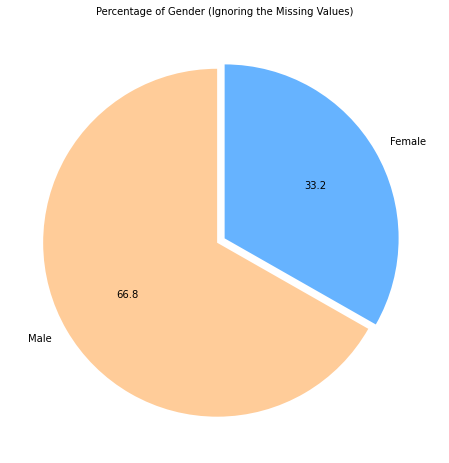

In [110]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode = (0.05, 0)
colors = ['#ffcc99','#66b3ff']
plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 10)
plt.show ()

#### We can see that out of total confirmed cases Males are more affected than the Females

## C. WHICH AGE GROUP IS MORE EFFECTED IN INDIA ?

The Union health ministry’s analysis has shown that nearly half the people who have died of COVID-19 are aged below 60 years. Health secretary Rajesh Bhushan said that 53% of the people who died due to the viral infection are aged above 60. Also, 35% of the deaths were recorded in the age group of 45-60 years, 10% in the age group of 26-44 years and 1% each in the age group of 18-25 years and below 17 years. Elderly people and those with comorbidities are at higher risk of mortality.The health ministry’s data once again confirms that people who have underlying health conditions such as cardiovascular disease, diabetes, kidney disease, high blood pressure or cancer are at greater risk of dying due to COVID-19 than patients these comorbidities.

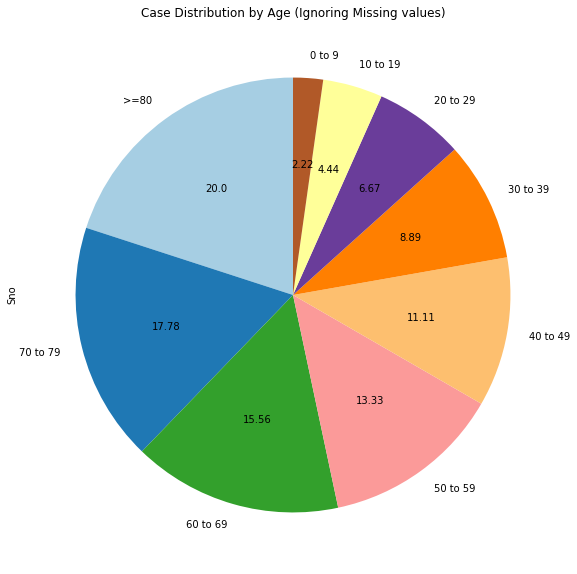

In [112]:
fig = plt.figure(figsize=(10,10))
age_group=age_group.iloc[0:9,:]
age_dist_india = age_group.groupby('AgeGroup')['Sno'].sum().sort_values(ascending=False)
def absolute_value(val):
    a  = val
    return (np.round(a,2))
age_dist_india.plot(kind="pie",title='Case Distribution by Age (Ignoring Missing values)',autopct=absolute_value,colormap='Paired',startangle=90)

plt.show ()

### The endangered Age-Groups are 60 to 69, 70 to 79 and the people having age greater than 80

## D. Statewise Table - Recovery rate and Death rate

The number of people who have recovered from the coronavirus disease (Covid-19) in India has crossed 2.7 million, pushing the country’s recovery rate to 76.61%. “Higher number of single-day recoveries is also reflected in the continuous increase in the national recovery rate, which is at present 91.34 per cent,” the ministry underscored. India’s COVID-19 fatality rate stands at 1.49%, with 21 States and UTs have deaths per million lower than the national average, the Ministry said.

80 per cent of the new recovered cases are observed to be concentrated in 10 States and Union Territories. Kerala is leading with more than 8,000 single day recoveries followed by Karnataka with more than 7,000 recoveries. Delhi has the highest recovery rate.


In [108]:
india_covid_19['Deaths']=india_covid_19['Deaths'].replace(['0#','NaN'],0)
india_covid_19['Deaths']=india_covid_19['Deaths'].astype('int')

In [109]:
state_details = pd.pivot_table(india_covid_19, values=['Confirmed','Deaths','Recovered'], index='State', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Recovered'] / state_details['Confirmed'],2)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Purples')

,Confirmed,Deaths,Recovered,Recovery Rate,Death Rate
State,,,,,
Maharashtra,604358,20265,428514,0.710000,0.030000
Tamil Nadu,343945,5886,283937,0.830000,0.020000
Andhra Pradesh,296609,2732,209100,0.700000,0.010000
Karnataka,233283,4062,148562,0.640000,0.020000
Uttar Pradesh,158216,2515,104808,0.660000,0.020000
Delhi,153367,4214,138301,0.900000,0.030000
West Bengal,119578,2473,89703,0.750000,0.020000
Bihar,106307,468,76452,0.720000,0.000000
Telengana,93937,711,72202,0.770000,0.010000


### MAHARASHTRA is having the most Confirmed cases, Recovery cases and Death cases

### DELHI is having the highest Recovery rate

### GUJARAT is having highest Death rate

## E. State-wise Testing done for Covid-19
Report shows that the state which has done maximum tests is Tamil Nadu. Tamil Nadu has conducted total 18,79,499 tests. Maharastra stands second with total 15,26,037 tests. The report shows that Tamil Nadu and Maharastra has the worst condition. On the other hand, report shows Himachal Pradesh, Goa, Tripura has lower number of testing done. More number of testing should be done to ensure the actual number of active cases and as the number of beds in hospital is running out it should be increased.

In [113]:
testing=state_testing.groupby('State')['Total Tested'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="Total Tested",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

----------------

## F. Total Tested v/s Positive Cases : State-wise Analysis
In Tamil Nadu total tests done is 18,70,499 and among them number of positive cases is 1,65,714. Likewise in Maharastra number of total tests 15,26,037 and positive cases 30,55,41. In Uttar Pradesh total tests done is 14,26,303 and number of positive cases is 47,036. In Andhra Pradesh 12,84,384 people were tested and among them 44,609 are tested positive. In Rajasthan 12,04,676 people were tested and among them 28,500 people tested positive. The positive test rate of Tamil Nadu, Maharastra, Uttar Pradesh, Andhra Pradesh and Rajasthan is respectively 0.0900, 0,2000, 0.03000, 0.03000 and 0.02000. These are the top five states for the testing done.

In [114]:
state_testing=state_testing.fillna(0)
state_test_details = pd.pivot_table(state_testing, values=['Total Tested','Positive','Negative'], index='State', aggfunc='max')
state_test_details['Positive Test Rate'] = round(state_test_details['Positive'] / state_test_details['Total Tested'],2)
#state_test_details['Negative Test Rate'] = round(state_test_details['Negative'] /state_test_details['Total Tested'])
state_test_details = state_test_details.sort_values(by='Total Tested', ascending= False)
state_test_details.style.background_gradient(cmap='Blues')

,Positive,Total Tested,Positive Test Rate
State,,,
Tamil Nadu,165714.000000,1879499.000000,0.090000
Maharashtra,305541.000000,1526037.000000,0.200000
Uttar Pradesh,47036.000000,1426303.000000,0.030000
Andhra Pradesh,44609.000000,1284384.000000,0.030000
Rajasthan,28500.000000,1204676.000000,0.020000
Karnataka,59652.000000,984996.000000,0.060000
Delhi,121582.000000,798783.000000,0.150000
West Bengal,40209.000000,689813.000000,0.060000
Assam,21864.000000,632372.000000,0.030000


-----------

## G. State v/s Testing Labs : State-wise Analysis
India has been calibrating its testing strategy as per the changing paradigm, and taking into account the scope, need and capacity to rapidly scale-up tests performed each day across the country. Over a period of five months, the number of laboratories in the country rose from 14 in February to more than 1596 in August. The testing rate has been ramped up significantly over the last few months with the introduction of the rapid antigen detection test in addition to the molecular tests, which remain the mainstay of diagnosis.The central government expanded the network of government laboratories designated to test samples of suspected coronavirus disease (Covid-19) cases to 1164 laboratories. Among 1164 government laboratories, 516 are approved to test for Real-Time PCR (RT PCR) tests, 609 for TrueNat screening tests, and 39 for CBNAAT testing. Also, additional 965 private laboratories were approved to conduct COVID-19 tests. Among 965 private laboratories, 634 are approved to test RT PCR tests, 242 to test for TrueNat tests and 89 to test for CBNAAT testing

Number of government and private testing centers for the coronavirus (COVID-19) across India as of November 22, 2020, by state


In [115]:
values = list(ICMR_labs['state'].value_counts())
states = list(ICMR_labs['state'].value_counts().index)
labs = pd.DataFrame(list(zip(values, states)), 
               columns =['values', 'states'])
fig = px.bar(labs, 
             x="values",
             y="states", 
             orientation='h',
             height=1000,
             title='Statewise Labs',
            color='states')
fig.show()

--------------
-------------

# Chapter 7 : Health Facility Condition wise Analysis

COVID-19 has led to a dramatic reduction in the numbers of patients seeking care. This is especially true of planned, non-urgent problems including procedures and surgeries. Many patients are scared to visit health facilities fearing COVID-19. While this has caused collateral damage, with the condition of some patients worsening or taking an unfortunate turn, there may indeed be those who have avoided interventions without any deleterious impact. In other words, they have been spared of procedures for debatable indications. For example, the large number of women who undergo an unnecessary hysterectomy has reduced. The incidence of Caesarean sections is reported to have gone down. Similarly, procedures such as coronary stents, knee replacements or cosmetic surgery which reflect supplier-induced demand have almost stopped. ‘Routine’ admissions for ‘observation’ or ‘insurance claims’ have got curtailed.

Strangely, even emergency medical cases have declined during the lockdown, with a decrease in the cases of heart attacks or strokes presenting to hospitals. While some of these may have been true emergencies involving those who suffered at home, perhaps the unpolluted air, decreased work stress, or home-cooked food has had a bigger impact on health than we assume. Or maybe we were over-diagnosing and over-treating certain emergencies. Investigating these important questions and critically analysing their answers may make future health care more beneficial to patients.

The cartelisation of health care has been naturally curbed during the pandemic. ‘Cut practice’, with doctors and hospitals prescribing tests, drugs, referrals and procedures in return for commissions, is entrenched in India. This leads to significant negative consequences, be it increased patient expenses, patients not reaching the right doctor or not getting the appropriate investigation, and also an erosion in the doctor-patient relationship and the image of the fraternity. It puts ethical doctors in a quandary, making them cynical about their profession. However, during the pandemic, the availability of doctors, beds and proximity are now the chief drivers for patient referrals, rather than the commission route. Most practices have had to take a forced ‘detox’ of sorts from this addiction.


## A. Health Center Analysis based on the states

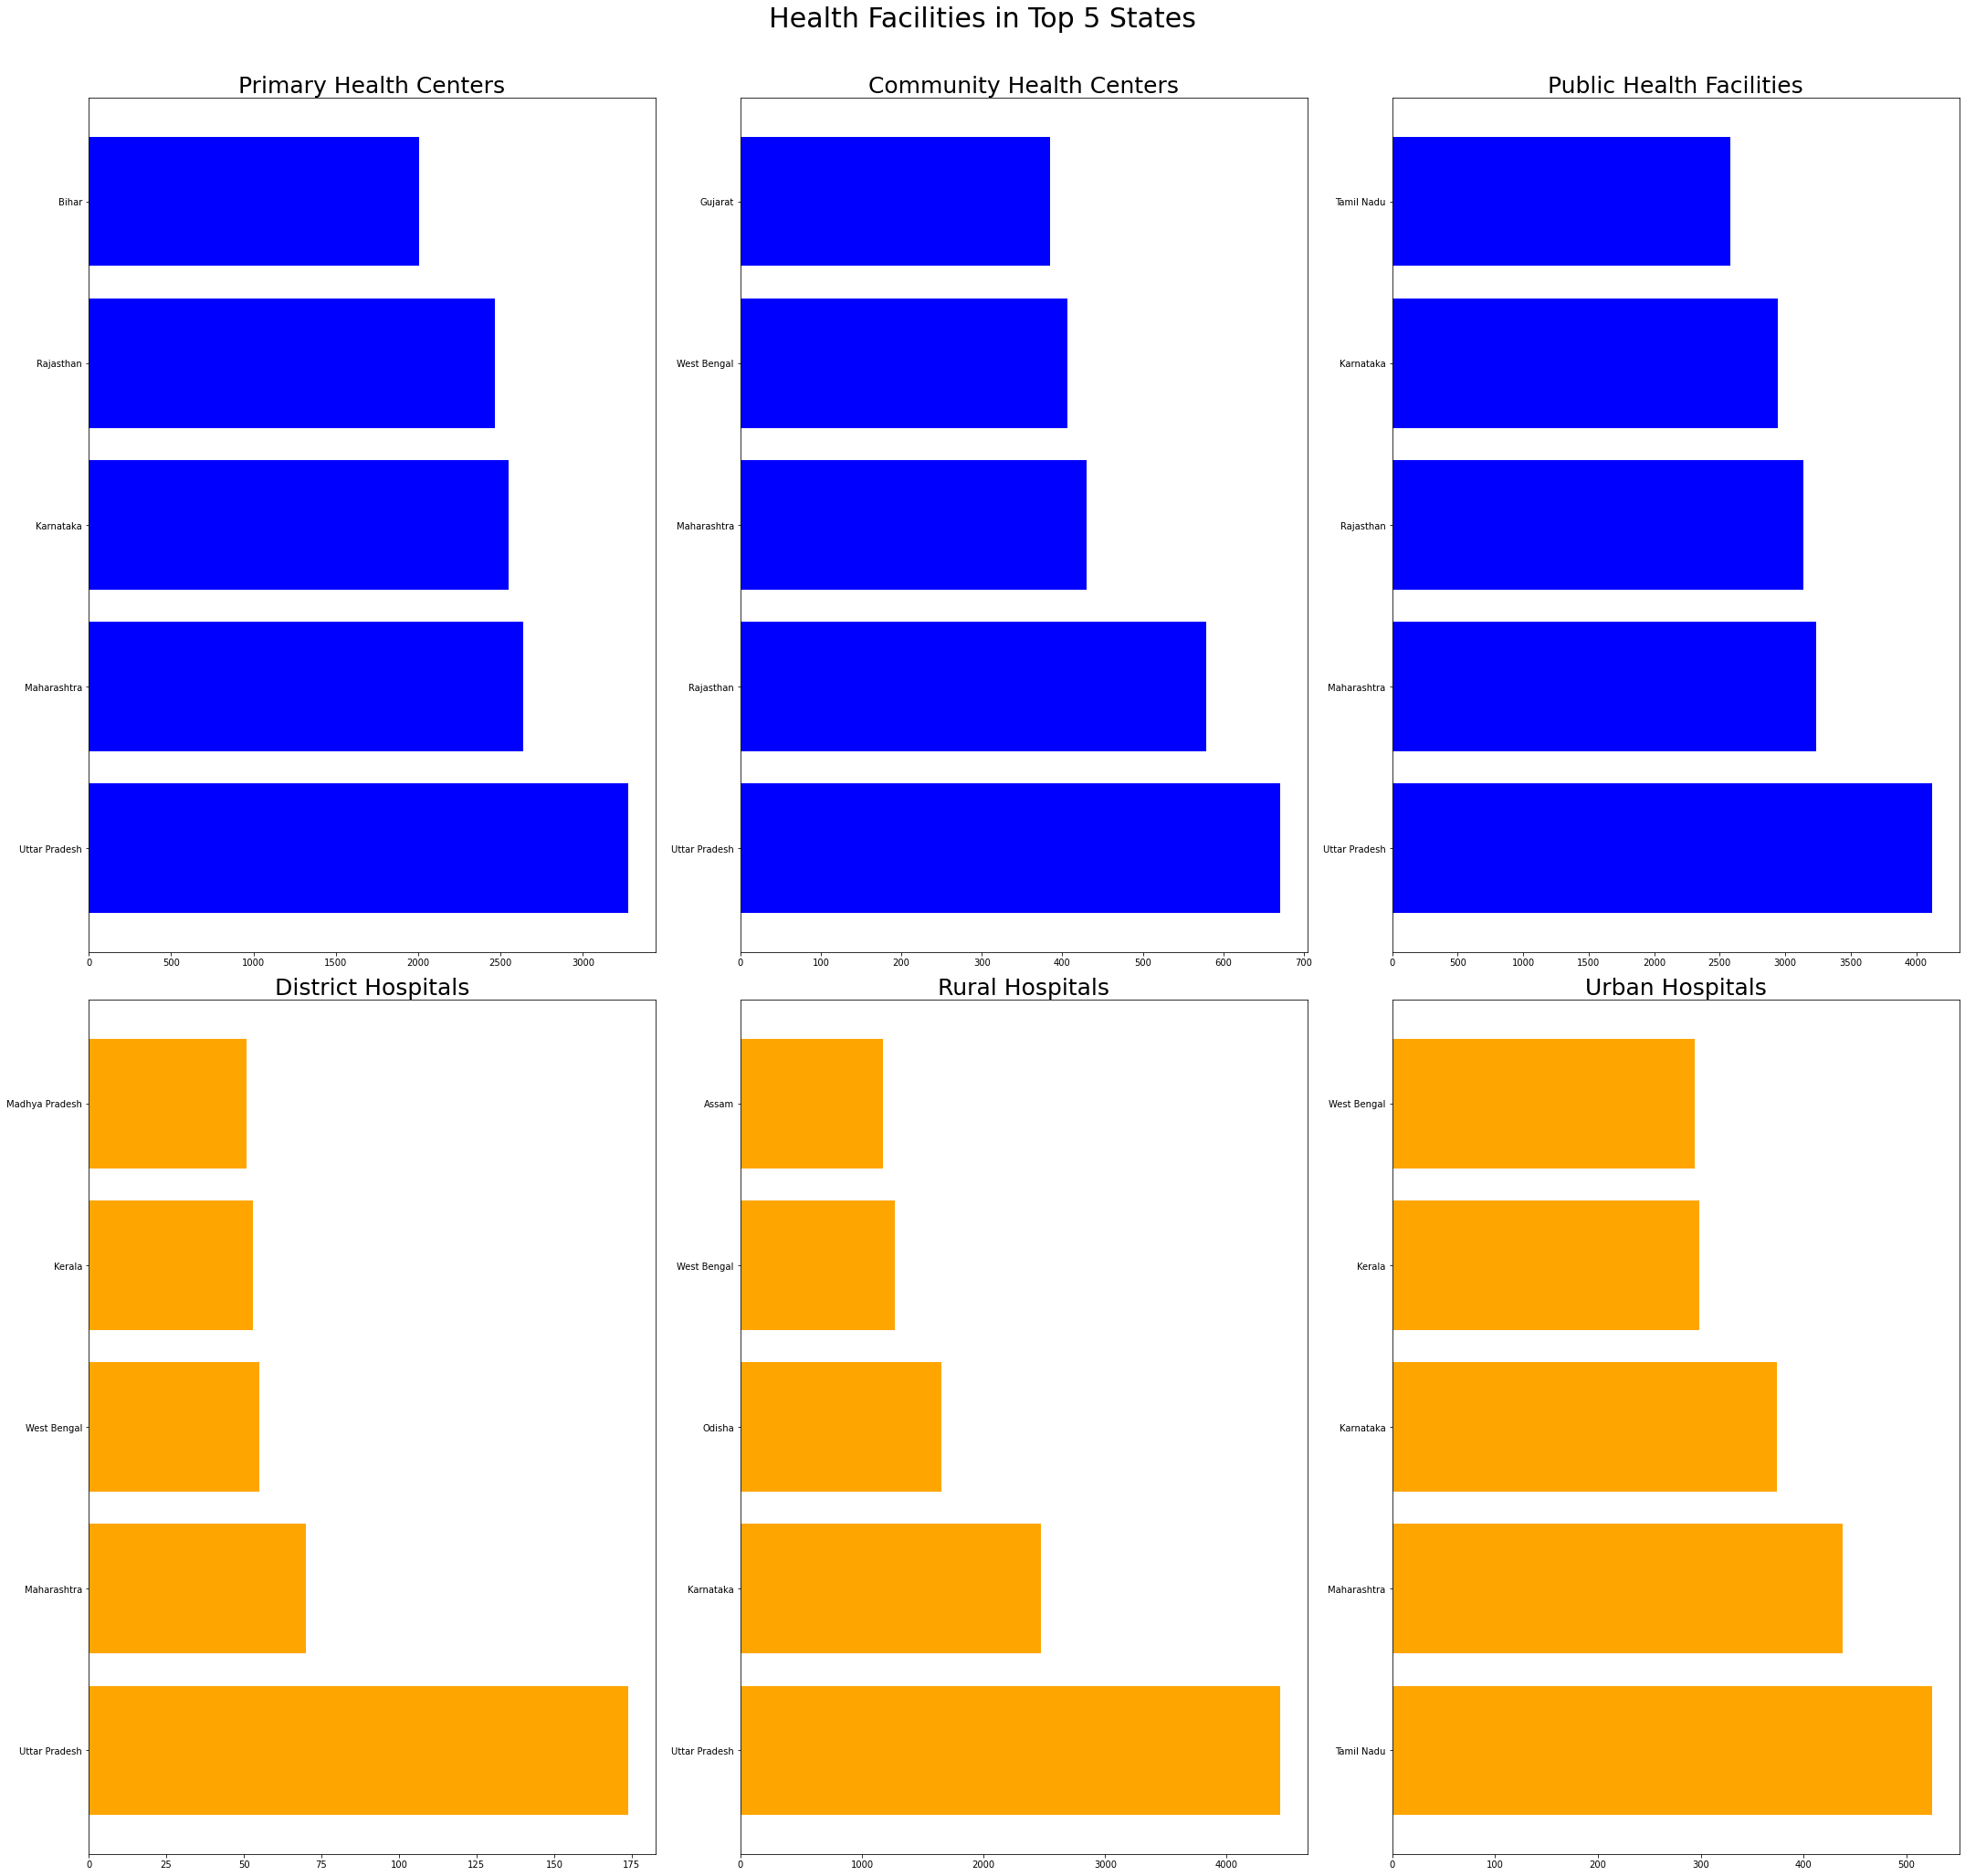

In [117]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
hospital_beds_states =hospital_beds.drop([36])
cols_object = list(hospital_beds_states.columns[2:8])
for cols in cols_object:
    hospital_beds_states[cols] = hospital_beds_states[cols].astype(int,errors = 'ignore')
top_5_primary = hospital_beds_states.nlargest(5,'NumPrimaryHealthCenters_HMIS')
top_5_community = hospital_beds_states.nlargest(5,'NumCommunityHealthCenters_HMIS')
top_5_district_hospitals = hospital_beds_states.nlargest(5,'NumDistrictHospitals_HMIS')
top_5_public_facility = hospital_beds_states.nlargest(5,'TotalPublicHealthFacilities_HMIS')
top_5_public_beds = hospital_beds_states.nlargest(5,'NumPublicBeds_HMIS')
top_rural_hos = hospital_beds_states.nlargest(5,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds_states.nlargest(5,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds_states.nlargest(5,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds_states.nlargest(5,'NumUrbanBeds_NHP18')

plt.figure(figsize=(30,30))
plt.suptitle('Health Facilities in Top 5 States',fontsize=30)
plt.subplot(231)
plt.title('Primary Health Centers',fontsize=25)
plt.barh(top_5_primary['State/UT'],top_5_primary['NumPrimaryHealthCenters_HMIS'],color ='blue');

plt.subplot(232)
plt.title('Community Health Centers',fontsize=25)
plt.barh(top_5_community['State/UT'],top_5_community['NumCommunityHealthCenters_HMIS'],color = 'blue');

plt.subplot(233)
plt.title('Public Health Facilities',fontsize=25)
plt.barh(top_5_public_facility['State/UT'],top_5_public_facility['TotalPublicHealthFacilities_HMIS'],color='blue');

plt.subplot(234)
plt.title('District Hospitals',fontsize=25)
plt.barh(top_5_district_hospitals['State/UT'],top_5_district_hospitals['NumDistrictHospitals_HMIS'],color = 'orange');

plt.subplot(235)
plt.title('Rural Hospitals',fontsize=25)
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = 'orange');
plt.subplot(236)
plt.title('Urban Hospitals',fontsize=25)
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = 'orange');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#1 Kerala: Niti Aayog ranked Kerala to be the healthiest state in India, in its recently published health index. The state recently underwent the scare of the spread of Nipah virus, but it was contained. Kerala health minister KK Shailaja said the scare of the second attack of the virus in the state was over, earlier this month. 

#2 Andhra Pradesh: The government think-tank ranked Andhra Pradesh second in its health index. In 2017-2018, the state has seen an outbreak of influenza and in 2018, the viral fever cases were on the rise. The state was also on high alert on the wake of the outbreak of Nipah virus in Kerala. 

#3 Maharashtra: According to Niti Aayog, Maharashtra is the third-healthiest state in India. According to a report by the Indian Express, 17,000 people in Maharashtra died in 2017 because of the persisting malnutrition crisis. In 2011, 77 babies died of hunger in Maharashtra, according to reports. This is, even though, the state is reportedly home to the most effective nutrition schemes. 

#4 Gujarat:  Gujarat is ranked fourth in the index released by Niti Aayog. The state is home to many cities affected by air pollution. According to Lancet’s Global Burden of Diseases latest report, around 30,000 people died in the state because of air pollution. The state, currently, is undergoing the fear of measles-rubella (MR) and cases of kidney and brain disorders have been reported. 


#5. Punjab: The state maintained the fifth spot as the Niti Aayog report said Punjab has not shown any improvement. Punjab has been witnessing a persistent drug problem which has cost more than 100 lives. According to a report by AIIMS released in 2015, the number of drug addicts was already as high as two lakh. 


## B. State v/s Hospital Beds : State-wise Analysis

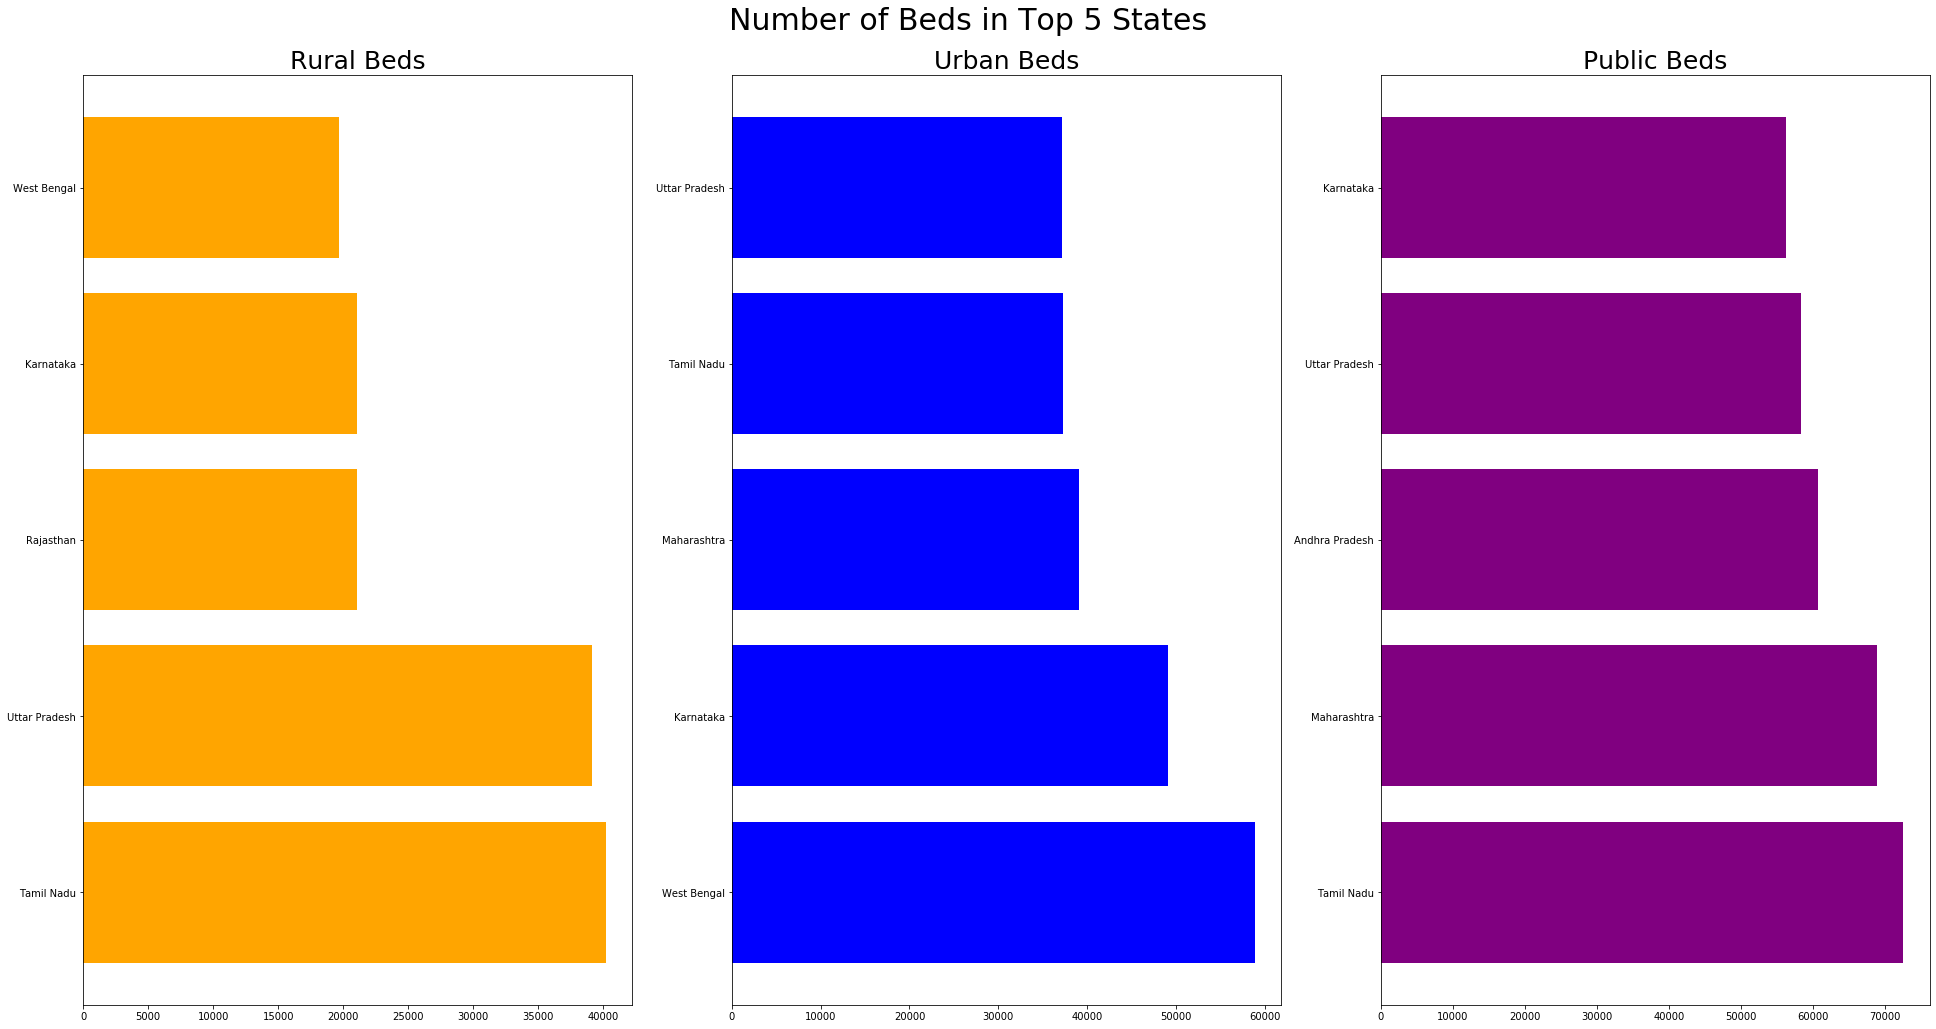

In [ ]:
plt.figure(figsize=(27,15))
plt.suptitle('Number of Beds in Top 5 States',fontsize=30);
plt.subplot(131)
plt.title('Rural Beds',fontsize=25)
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = 'orange');

plt.subplot(132)
plt.title('Urban Beds',fontsize=25)
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = 'blue');
plt.subplot(133)
plt.title('Public Beds',fontsize=25)
plt.barh(top_5_public_beds['State/UT'],top_5_public_beds['NumPublicBeds_HMIS'],color = 'purple');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

---------
------------

# Chapter 8 : The Prediction

While it is impossible to estimate the eventual number of cases for the novel coronavirus, there was an exercise carried out earlier this year, aimed at projecting the numbers for Wuhan in China. In a recent article on Cell Discovery in Nature, a group of Chinese scientists attempted to estimate the eventual number of infections and deaths due to the disease (COVID-19) in Wuhan. An infectious disease dynamics model called SEIR (Susceptible-Exposed-Infectious-Resistant) was used to model and predict the number of COVID-19 cases. The SEIR model proved to be predictive for a variety of acute infectious diseases like Ebola and SARS.

The model classifies the population into four mutually exclusive groups: susceptible (at risk of contracting the disease), exposed (infected but not yet infectious), infectious (capable of transmitting the disease), and removed (those who recover or die from the disease). A susceptible individual can become exposed only through contact with some infectious person. Susceptible individuals first enter the exposed stage, during which they may have a low level of infectivity; they become infectious thereafter. The infection rate represents the probability of transmission from an infectious person to a susceptible one. The incubation rate (the reciprocal of the average duration of incubation) is the rate at which latent individuals become infectious; and the removal rate is the reciprocal of the average duration of infection. The basic reproduction number (BRN) is the expected number of cases directly generated by one case. A BRN greater than one indicates that the outbreak is self-sustaining, while a BRN less than one indicates that the number of new cases decreases over time and eventually the outbreak will stop. Ideally, the BRN should be reduced in order to slow down an epidemic.


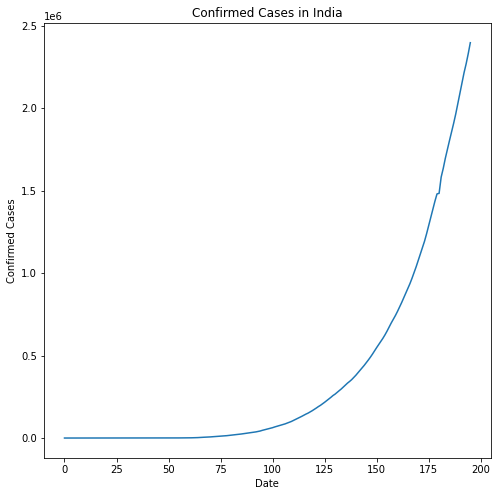

In [118]:
ax = num_plot_india['Confirmed'].plot(title="Confirmed Cases in India",figsize=(8,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [119]:
train = num_plot_india.iloc[:-3,:2]
test = num_plot_india.iloc[-3:,:2]

In [120]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [121]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.4, changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18','2020-07-08','2020-07-28'])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


------------

## A. Prediction for India in the upcoming days based on the current situation if Vaccination is not started

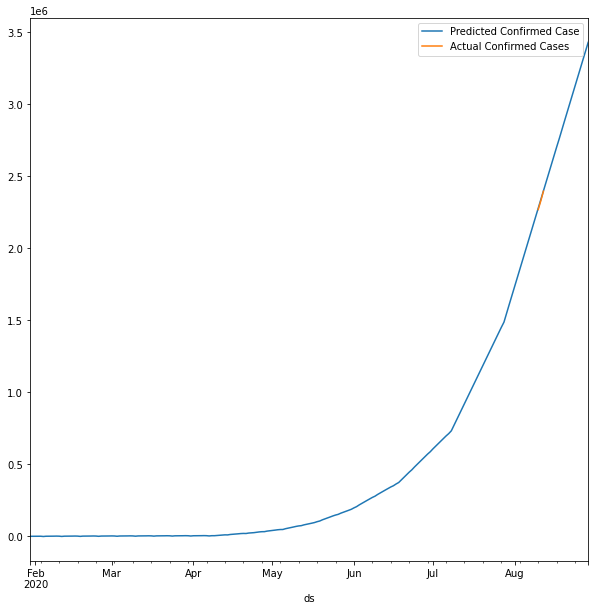

In [122]:
future_dates = model.make_future_dataframe(periods=20)
forecast =  model.predict(future_dates)
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

## B. Prediction of the Growth Rate of the Confirmed Cases

In [123]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='90 days', period='40 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-18 00:00:00 and 2020-08-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,6.241419e+07,7900.265063,7192.244617,0.017767,0.010957,0.333333
1,2 days,5.818096e+07,7627.644713,7504.100665,0.022816,0.014477,0.333333
2,3 days,7.793297e+07,8827.965249,8757.196416,0.028977,0.017616,0.333333


In [124]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
198,2020-08-15,2.580614e+06,2.565857e+06,2.595480e+06,2.575269e+06,2.582456e+06,416.481094,416.481094,416.481094,416.481094,416.481094,416.481094,0.0,0.0,0.0,2.581031e+06
199,2020-08-16,2.641300e+06,2.624826e+06,2.658010e+06,2.630948e+06,2.645315e+06,771.357795,771.357795,771.357795,771.357795,771.357795,771.357795,0.0,0.0,0.0,2.642072e+06
200,2020-08-17,2.701986e+06,2.682431e+06,2.720482e+06,2.687248e+06,2.709572e+06,261.514759,261.514759,261.514759,261.514759,261.514759,261.514759,0.0,0.0,0.0,2.702248e+06
201,2020-08-18,2.762672e+06,2.738892e+06,2.779816e+06,2.741826e+06,2.773201e+06,-1592.563989,-1592.563989,-1592.563989,-1592.563989,-1592.563989,-1592.563989,0.0,0.0,0.0,2.761080e+06
202,2020-08-19,2.823358e+06,2.795915e+06,2.846021e+06,2.796247e+06,2.840063e+06,72.411853,72.411853,72.411853,72.411853,72.411853,72.411853,0.0,0.0,0.0,2.823431e+06
203,2020-08-20,2.884044e+06,2.848838e+06,2.910303e+06,2.851133e+06,2.906087e+06,2.515731,2.515731,2.515731,2.515731,2.515731,2.515731,0.0,0.0,0.0,2.884047e+06
204,2020-08-21,2.944730e+06,2.905593e+06,2.972737e+06,2.904330e+06,2.974456e+06,68.282757,68.282757,68.282757,68.282757,68.282757,68.282757,0.0,0.0,0.0,2.944799e+06
205,2020-08-22,3.005416e+06,2.957049e+06,3.041689e+06,2.959407e+06,3.040104e+06,416.481094,416.481094,416.481094,416.481094,416.481094,416.481094,0.0,0.0,0.0,3.005833e+06
206,2020-08-23,3.066102e+06,3.011584e+06,3.106368e+06,3.014125e+06,3.107432e+06,771.357795,771.357795,771.357795,771.357795,771.357795,771.357795,0.0,0.0,0.0,3.066874e+06
207,2020-08-24,3.126789e+06,3.067417e+06,3.178777e+06,3.067677e+06,3.174869e+06,261.514759,261.514759,261.514759,261.514759,261.514759,261.514759,0.0,0.0,0.0,3.127050e+06


## C. Prediction for India in the upcoming months based on the current situation

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


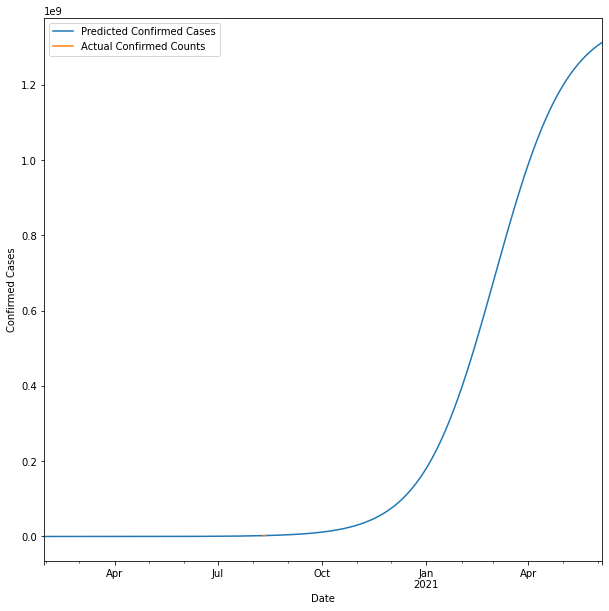

In [125]:
from fbprophet import Prophet
model_india = Prophet(growth="logistic",changepoint_prior_scale=0.4,changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18','2020-07-08','2020-07-28'])
pop = 1380004385 #from worldometers
train['cap'] = pop
model_india.fit(train)
# Future Prediction
future_dates = model_india.make_future_dataframe(periods=300)
future_dates['cap'] = pop
forecast =  model_india.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Cases',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Confirmed Cases");

## D. Forecast Model

In [126]:
forecast.iloc[170:200]

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
170,2020-07-18,1.082654e+06,1380004385,1.077291e+06,1.089508e+06,1.082654e+06,1.082654e+06,795.707027,795.707027,795.707027,795.707027,795.707027,795.707027,0.0,0.0,0.0,1.083450e+06
171,2020-07-19,1.120752e+06,1380004385,1.115203e+06,1.127576e+06,1.120752e+06,1.120752e+06,703.092712,703.092712,703.092712,703.092712,703.092712,703.092712,0.0,0.0,0.0,1.121455e+06
172,2020-07-20,1.160190e+06,1380004385,1.154150e+06,1.167248e+06,1.160190e+06,1.160190e+06,374.492221,374.492221,374.492221,374.492221,374.492221,374.492221,0.0,0.0,0.0,1.160565e+06
173,2020-07-21,1.201015e+06,1380004385,1.192277e+06,1.205051e+06,1.201015e+06,1.201015e+06,-2063.288654,-2063.288654,-2063.288654,-2063.288654,-2063.288654,-2063.288654,0.0,0.0,0.0,1.198951e+06
174,2020-07-22,1.243274e+06,1380004385,1.236966e+06,1.249076e+06,1.243274e+06,1.243274e+06,-288.372886,-288.372886,-288.372886,-288.372886,-288.372886,-288.372886,0.0,0.0,0.0,1.242986e+06
175,2020-07-23,1.287019e+06,1380004385,1.280731e+06,1.293391e+06,1.287019e+06,1.287019e+06,19.102422,19.102422,19.102422,19.102422,19.102422,19.102422,0.0,0.0,0.0,1.287038e+06
176,2020-07-24,1.332302e+06,1380004385,1.326837e+06,1.339244e+06,1.332302e+06,1.332302e+06,459.267158,459.267158,459.267158,459.267158,459.267158,459.267158,0.0,0.0,0.0,1.332761e+06
177,2020-07-25,1.379177e+06,1380004385,1.373378e+06,1.385925e+06,1.379177e+06,1.379177e+06,795.707027,795.707027,795.707027,795.707027,795.707027,795.707027,0.0,0.0,0.0,1.379972e+06
178,2020-07-26,1.427699e+06,1380004385,1.422016e+06,1.434621e+06,1.427699e+06,1.427699e+06,703.092712,703.092712,703.092712,703.092712,703.092712,703.092712,0.0,0.0,0.0,1.428402e+06
179,2020-07-27,1.477926e+06,1380004385,1.472088e+06,1.484273e+06,1.477926e+06,1.477926e+06,374.492221,374.492221,374.492221,374.492221,374.492221,374.492221,0.0,0.0,0.0,1.478300e+06


## E. Predicting the condition in the upcoming 25 days : ARIMA Model

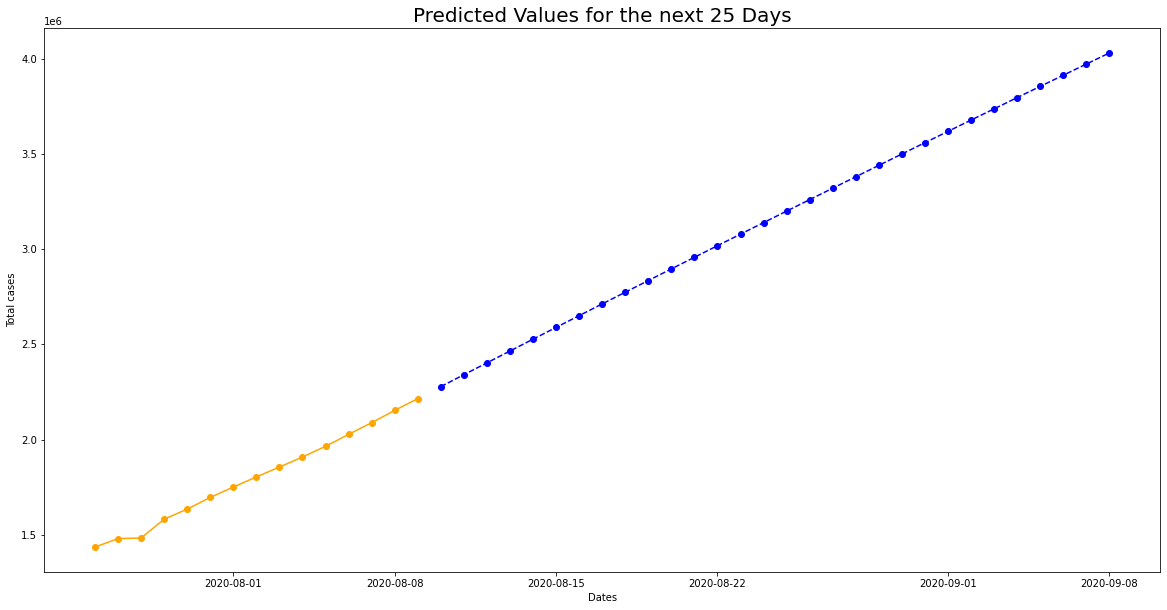

In [127]:
from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(train['y'], order=(3, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])
start_date = train['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 25 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

## F. Predicted Dataset for the upcoming 25 days : ARIMA Model

In [128]:
pred=pd.DataFrame(forecast[0],columns=['Predicted'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df=pd.merge(dates,pred,right_index=True,left_index=True)
arima_df.tail(30)

,Date,Predicted
0,2020-08-10,2.277763e+06
1,2020-08-11,2.340436e+06
2,2020-08-12,2.402552e+06
3,2020-08-13,2.464820e+06
4,2020-08-14,2.526825e+06
5,2020-08-15,2.588665e+06
6,2020-08-16,2.650410e+06
7,2020-08-17,2.711963e+06
8,2020-08-18,2.773384e+06
9,2020-08-19,2.834658e+06


In [129]:
test=test.reset_index()

In [130]:
df1=pd.DataFrame(forecast[0],columns=['yhat'])
df2=pd.DataFrame(prediction_dates,columns=['ds'])
df3=test['y']
df4=pd.merge(df2,df3,right_index=True,left_index=True)
df5=pd.merge(df4,df1,right_index=True,left_index=True)

In [131]:
df5['mse'],df5['rmse'],df5['mae'],df5['mape'],df5['mdape']=[0,0,0,0,0]

In [132]:
for t in range(len(test)):
    mape =  np.mean(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mape'][t]="{:.5f}".format(mape)
    mdape =  np.median(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mdape'][t]="{:.5f}".format(mdape)
    mae = np.mean(np.abs(df5['yhat'][t] - df5['y'][t]))
    df5['mae'][t]=mae
    mse = np.mean((df5['yhat'][t] - df5['y'][t])**2)
    df5['mse'][t]=mse
    rmse = np.mean((df5['yhat'][t] - df5['y'][t])**2)**.5
    df5['rmse'][t]=rmse

In [133]:
df5

,ds,y,yhat,mse,rmse,mae,mape,mdape
0,2020-08-10,2268675,2.277763e+06,82598242,9088,9088,0.00401,0.00401
1,2020-08-11,2329638,2.340436e+06,116598935,10798,10798,0.00464,0.00464
2,2020-08-12,2396637,2.402552e+06,34988228,5915,5915,0.00247,0.00247


In [134]:
num_plot_india['Active']=0
for i in range(len(num_plot_india)):
    num_plot_india['Active'][i]=num_plot_india['Confirmed'][i]-num_plot_india['Recovered'][i]-num_plot_india['Deaths'][i]
num_plot_india

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase,Active
0,2020-01-30,1,0,0,0,0,1
1,2020-01-31,1,0,0,0,0,1
2,2020-02-01,1,0,0,0,0,1
3,2020-02-02,2,0,0,1,0,2
4,2020-02-03,3,0,0,1,0,3
...,...,...,...,...,...,...,...
191,2020-08-08,2153010,1480884,43379,64399,861,628747
192,2020-08-09,2215074,1535743,44386,62064,1007,634945
193,2020-08-10,2268675,1583489,45257,53601,871,639929
194,2020-08-11,2329638,1639599,46091,60963,834,643948


## G. Real Time and Final Prediction Model

In [135]:
train_bed=pd.DataFrame(columns=['ds','y'])
test_bed=pd.DataFrame(columns=['ds','y'])
train_bed_y= num_plot_india.iloc[:-3,-1:]
train_bed_ds = num_plot_india.iloc[:-3,:1]
train_bed=pd.merge(train_bed_ds,train_bed_y,right_index=True,left_index=True)
train_bed.rename(columns={'date': 'ds', 'Active': 'y'}, inplace=True)
test_bed_y = num_plot_india.iloc[-3:,-1:]
test_bed_ds = num_plot_india.iloc[-3:,:1]
test_bed=pd.merge(test_bed_ds,test_bed_y,right_index=True,left_index=True)
test_bed.rename(columns={'date': 'ds', 'Active': 'y'}, inplace=True)

In [136]:
test_bed = test_bed.set_index("ds")
test_bed = test_bed['y']

**Considering current number of active cases, between mid May and October we will see a drastic increase in the number of active cases and by end January all the available hospital beds in India will be occupied
if we donot lower the increase of cases or increase the number of beds**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


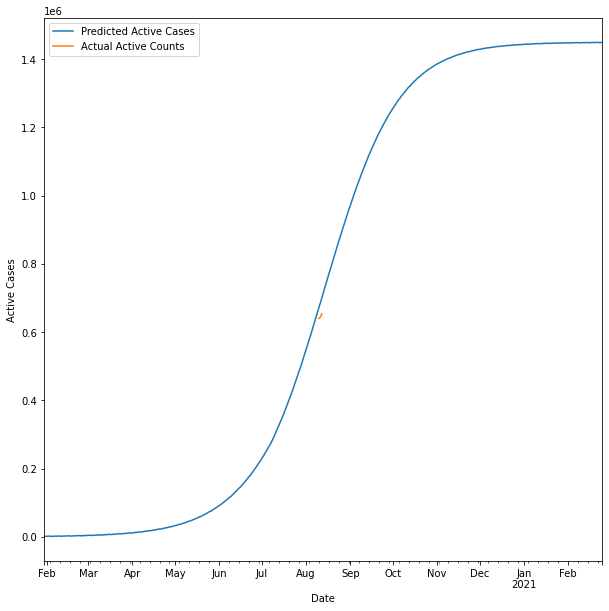

In [137]:
num_bed=hospital_beds.iloc[36][7]+hospital_beds.iloc[36][9]+hospital_beds.iloc[36][11]
model_bed = Prophet(growth = "logistic",changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18','2020-07-08','2020-07-28'])
bed_cap = num_bed 
train_bed['cap'] = bed_cap
model_bed.fit(train_bed)
# Future Prediction
future_dates = model_bed.make_future_dataframe(periods=200)
future_dates['cap'] = bed_cap
forecast =  model_bed.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Active Cases',legend=True,figsize=(10,10))
test_bed.plot(y='y',label='Actual Active Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Active Cases");

## H. Predicted Forecast

In [138]:
forecast.iloc[230:250]

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
230,2020-09-16,1.136761e+06,1449785,1.122799e+06,1.149645e+06,1.130590e+06,1.142584e+06,-15.256988,-15.256988,-15.256988,-15.256988,-15.256988,-15.256988,0.0,0.0,0.0,1.136746e+06
231,2020-09-17,1.146178e+06,1449785,1.133473e+06,1.159030e+06,1.139914e+06,1.152184e+06,-188.084718,-188.084718,-188.084718,-188.084718,-188.084718,-188.084718,0.0,0.0,0.0,1.145990e+06
232,2020-09-18,1.155385e+06,1449785,1.142398e+06,1.168070e+06,1.149039e+06,1.161542e+06,272.524024,272.524024,272.524024,272.524024,272.524024,272.524024,0.0,0.0,0.0,1.155658e+06
233,2020-09-19,1.164383e+06,1449785,1.151018e+06,1.176649e+06,1.157972e+06,1.170707e+06,-118.300941,-118.300941,-118.300941,-118.300941,-118.300941,-118.300941,0.0,0.0,0.0,1.164264e+06
234,2020-09-20,1.173171e+06,1449785,1.160270e+06,1.186371e+06,1.166713e+06,1.179659e+06,203.258532,203.258532,203.258532,203.258532,203.258532,203.258532,0.0,0.0,0.0,1.173374e+06
235,2020-09-21,1.181751e+06,1449785,1.168736e+06,1.195373e+06,1.175215e+06,1.188391e+06,543.305715,543.305715,543.305715,543.305715,543.305715,543.305715,0.0,0.0,0.0,1.182294e+06
236,2020-09-22,1.190124e+06,1449785,1.176495e+06,1.203259e+06,1.183548e+06,1.196923e+06,-697.445624,-697.445624,-697.445624,-697.445624,-697.445624,-697.445624,0.0,0.0,0.0,1.189426e+06
237,2020-09-23,1.198291e+06,1449785,1.184795e+06,1.211113e+06,1.191684e+06,1.205224e+06,-15.256988,-15.256988,-15.256988,-15.256988,-15.256988,-15.256988,0.0,0.0,0.0,1.198275e+06
238,2020-09-24,1.206253e+06,1449785,1.192250e+06,1.219850e+06,1.199625e+06,1.213217e+06,-188.084718,-188.084718,-188.084718,-188.084718,-188.084718,-188.084718,0.0,0.0,0.0,1.206065e+06
239,2020-09-25,1.214013e+06,1449785,1.200547e+06,1.227391e+06,1.207371e+06,1.221076e+06,272.524024,272.524024,272.524024,272.524024,272.524024,272.524024,0.0,0.0,0.0,1.214286e+06


In [139]:
hospital_beds_active=hospital_beds
hospital_beds_active['Total_Beds']=0

In [140]:
for i in range(len(hospital_beds_active)):
    hospital_beds_active['Total_Beds'][i]=hospital_beds.iloc[i][7]+hospital_beds.iloc[i][9]+hospital_beds.iloc[i][11]

-------------
-------------

# Chapter 9 : Hospital Beds v/s Active Cases - State-wise Analysis

In [141]:
india_covid_19['Active'] = india_covid_19['Confirmed'] - india_covid_19['Deaths']- india_covid_19['Recovered']
india_state_cases=pd.DataFrame()
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],errors='coerce')
states =list(india_covid_19['State'].unique())
for state in states:
    mah_cases_complete=india_covid_19.loc[india_covid_19['State']==state]
    mah_cases_complete['Date'] = mah_cases_complete['Date'].dt.strftime("%Y-%m-%d")
    mah_cases_complete['Date']=pd.to_datetime(mah_cases_complete['Date'])
    mah_cases_complete = mah_cases_complete[(pd.Timestamp(datetime.date(2020,3,21)) < mah_cases_complete['Date']) & ( mah_cases_complete['Date']< pd.Timestamp(datetime.date(2020,8,12)))]
    india_state_cases=india_state_cases.append(mah_cases_complete)

india_state_cases.sample(10)

,Unnamed: 0,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed,Active
3023,3023,3024,2020-06-14,8:00 AM,Uttarakhand,-,-,1077,23,1785,685
4114,4114,4115,2020-07-15,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,310,1,520,209
1713,1713,1714,2020-08-05,8:00 AM,Goa,-,-,7,0,7,0
1898,1898,1899,2020-05-13,8:00 AM,Tripura,-,-,2,0,154,152
4500,4500,4501,2020-07-26,8:00 AM,Bihar,-,-,24053,234,36604,12317
1365,1365,1366,2020-04-27,5:00 PM,Kerala,-,-,342,4,469,123
381,381,382,2020-03-26,6:00 PM,Manipur,1,0,0,0,1,1
2347,2347,2348,2020-05-27,8:00 AM,Chandigarh,-,-,187,4,266,75
1585,1585,1586,2020-04-05,5:00 PM,Himachal Pradesh,-,-,34,1,40,5
391,391,392,2020-03-26,6:00 PM,West Bengal,10,0,0,1,10,9


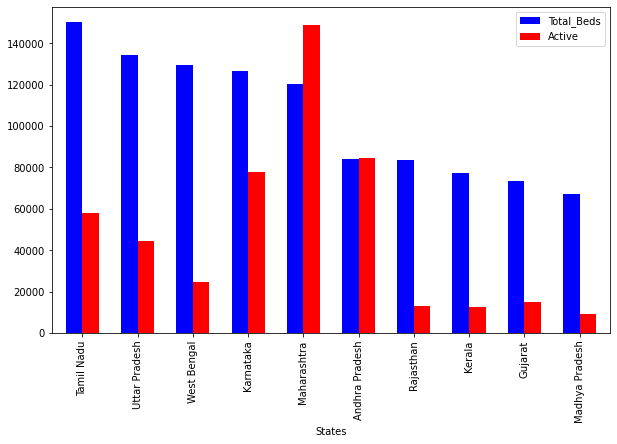

In [142]:
for state in states:
    beds_vs_active=india_state_cases.loc[india_state_cases['State']==state]
    active=india_state_cases.groupby(['State'])['Active'].max()
    beds=hospital_beds_active.groupby(['State/UT'])['Total_Beds'].max()
    beds_vs_active=pd.merge(active,beds,right_index=True,left_index=True)
beds_vs_active=beds_vs_active.reset_index()
bva=beds_vs_active[['Total_Beds','Active','index']].groupby('index').max().sort_values('Total_Beds',ascending=False).head(10)
bva.plot(kind='bar',width=0.6,colormap='bwr',figsize=(10,6))
plt.xlabel('States')
plt.show()

### The state of Maharashtra is facing lacking of beds in this time period

**As per logistic growth,Maharashtra was expected to reach the bed capacity in the first week of August, however there has been rapid growth in cases and the bed capacity was reached in last week of July itself.
We are now checking if 50k beds are added in Maharashtra when will that capacity be reached**

--------------

# Chapter 10 : Conclusion :

**For the countries like India, USA, Brazil, they are the worst candidates of this pandemic, and the had suffered the most and still sufferring. If we have to fought against the virus, we have test the samples in a huge number. Testing is the only without lockdown the country, as Japan is doing. Testing is the most essential thing, without which we cannot trace the curve and it will increase with a high slope.**

**According to the prediction, India will be seeing the flattened curve of daily confirmed cases in the month of March and April, 2021. And at that moment the country will have all total 50000000 confirmed cases, which will be the nightmare for the country. If the vaccine is available then it will be another thing, but if the confirmed cases are increasing at the rate of 60k to 70k, and eventually it will increase to 90k to 100k, 1/3 of the total population of India will be effected**

COVID-19 health crisis has exacerbated violence against doctors and healthcare workers. They have become unforeseen targets in the fight against the current pandemic. For a sustainable protection of the healthcare workers, the current Ordinance needs to be further extended and incorporated into existing laws in the form of a strict, permanent legislation that is strictly enforced. It would improve the safety of the very individuals who carry out their duties fearlessly for the benefit of sick patients, either during a health crisis such as the current pandemic or during traditional times.

### Bibliography 

The datas are of the First Wave of Covid epedemic.

Chinese Data :
http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm

Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html

Macau Government: https://www.ssm.gov.mo/portal/

Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0

US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html

Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html

Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance

European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases

Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19

Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus

Picture courtesy : Johns Hopkins University dashboard


### Stay Home! Stay Safe!

### Thank You!